# 1. Preparación de los Datos

## 1.1. Configuración del Entorno

In [1]:
# Importación de librerías necesarias
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

# Configuraciones iniciales
warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_rows', None) # Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_columns', None) # Configurar Pandas para mostrar todas las columnas

# Añadir directorios superiores para importaciones
sys.path.append('..')

# Importación de utilidades personalizadas
from src.utils.utils import *
from src.utils.preprocess import *

## 1.2. Carga de Datos

In [2]:
df = pd.read_excel('../data/raw/BBDD_gen.xlsx')
print("Dimensiones del DataFrame:", df.shape)
print("\nPrimeras filas del DataFrame:")
df.head()

Dimensiones del DataFrame: (898, 329)

Primeras filas del DataFrame:


Perfil Perfil.1             Perfil.2              Perfil.3 Perfil.4  \
0     Codigo   Sujeto     Fecha Nacimiento  Fecha de exploración     Edad   
1  R00001MVE        1  1985-08-23 00:00:00   2021-11-04 16:58:00       36   
2  R00002JVM        2  1986-07-06 00:00:00   2021-11-04 17:41:00       35   
3  R00004EPC        4  1976-03-01 00:00:00   2021-11-15 13:40:00       45   
4  R00005DCM        5  1978-12-23 00:00:00   2021-11-15 12:33:00       43   

  Perfil.5 Perfil.6 Perfil.7       Perfil.8            Perfil.9  Patologia 1  \
0     Sexo   Altura     Peso  Nº de calzado  Motivo de consulta  NºPatologia   
1        F      173       65             40                 NaN            1   
2        M      181       78             44                 NaN            0   
3        M      189       88             46                 NaN            0   
4        M      182       70             44                 NaN            1   

    Patologia 1.1   Patologia 1.2 Patologia 1.3 Patologia 1.4  \
0    Articulación    Localizacion          Lado     Patologia   
1         Rodilla          Medial    Bilateral            NaN   
2  Sin afectacion  Sin afectacion       Ninguno           NaN   
3  Sin afectacion  Sin afectacion       Ninguno           NaN   
4             Pie          Medial       Derecho           NaN   

         iB_Resport               iB_Resport.1  \
0  Enf Sistemicas 1  Enfermedades Sistemicas 2   
1               NaN                        NaN   
2               NaN                        NaN   
3               NaN                        NaN   
4               NaN                        NaN   

                                        iB_Resport.2   iB_Resport.3  \
0                                  Sintomas narrados  Diagnóstico 1   
1  El último tto ortopodologíco era por dolor de ...            NaN   
2  Bunion dorsal bilateral \nLunge 16º bilateral ...            NaN   
3                                                NaN            NaN   
4  Año - año y medio con dolor en la cadera con d...            NaN   

   iB_Resport.4 iB_Resport.5 iB_Resport.6  iB_Resport.7 iB_Resport.8  \
0  Dagnóstico 2           IQ     Fecha IQ  Resultado IQ       Tabaco   
1           NaN          NaN          NaN           NaN          NaN   
2           NaN          NaN          NaN           NaN          NaN   
3           NaN          NaN          NaN           NaN          NaN   
4           NaN          NaN          NaN           NaN          NaN   

  iB_Resport.9 iB_Resport.10      iB_Resport.11 iB_Resport.12  \
0      Alcohol    Medicación           Fármacos      Alergias   
1          NaN           NaN                NaN           NaN   
2          NaN            Si  Antihistamínicos             Si   
3          NaN           NaN                NaN           NaN   
4          NaN           NaN                NaN           NaN   

                    iB_Resport.13        iB_Resport.14 iB_Resport.15  \
0                       Alergenos  Actividad principal     Marca 10K   
1                             NaN                  NaN           NaN   
2  Polen, ácaros del polvo, gato        Run, ciclismo             45   
3                             NaN                  NaN           NaN   
4                             NaN                  NaN           NaN   

  iB_Resport.16 iB_Resport.17 iB_Resport.18 iB_Resport.19 RUNSCRIBE_WALK  \
0  Especialidad        km/sem     Calzado 1     Calzado 2           Pace   
1           NaN           NaN           NaN           NaN         1.2916   
2           NaN           NaN    Nike kiger           NaN       1.370079   
3           NaN           NaN           NaN           NaN       1.371909   
4           NaN           NaN      Saucony            NaN       1.318286   

  RUNSCRIBE_WALK.1 RUNSCRIBE_WALK.2 RUNSCRIBE_WALK.3 RUNSCRIBE_WALK.4  \
0        Velocidad        Step Rate    Stride Length     Contact Time   
1                5       108.456898           1.4267       705.166667   
2         

In [3]:
# print("Nombres de columnas:", df.columns.tolist())

## 1.3. Adaptación Nombres de Columnas

In [4]:
# Establecer la primera fila como el nuevo encabezado
new_header = df.iloc[0]   # La primera fila será el encabezado
df = df[1:]               # Seleccionar los datos a partir de la segunda fila
df.columns = new_header   # Establecer los nuevos nombres de columnas
df.reset_index(drop=True, inplace=True)  # Restablecer el índice del DataFrame

df.head()

0     Codigo Sujeto     Fecha Nacimiento Fecha de exploración Edad Sexo  \
0  R00001MVE      1  1985-08-23 00:00:00  2021-11-04 16:58:00   36    F   
1  R00002JVM      2  1986-07-06 00:00:00  2021-11-04 17:41:00   35    M   
2  R00004EPC      4  1976-03-01 00:00:00  2021-11-15 13:40:00   45    M   
3  R00005DCM      5  1978-12-23 00:00:00  2021-11-15 12:33:00   43    M   
4  R00006FAG      3  1980-01-24 00:00:00  2021-11-15 16:10:00   41    M   

0 Altura Peso Nº de calzado Motivo de consulta NºPatologia    Articulación  \
0    173   65            40                NaN           1         Rodilla   
1    181   78            44                NaN           0  Sin afectacion   
2    189   88            46                NaN           0  Sin afectacion   
3    182   70            44                NaN           1             Pie   
4    184   90            43                NaN           1         Pierna    

0    Localizacion        Lado                                   Patologia  \
0          Medial  Bilateral                                          NaN   
1  Sin afectacion     Ninguno                                         NaN   
2  Sin afectacion     Ninguno                                         NaN   
3          Medial     Derecho                                         NaN   
4       Posterior  Bilateral   Rotura bilateral del ligamento lateral TPA   

0 Enf Sistemicas 1 Enfermedades Sistemicas 2  \
0              NaN                       NaN   
1              NaN                       NaN   
2              NaN                       NaN   
3              NaN                       NaN   
4              NaN                       NaN   

0                                  Sintomas narrados Diagnóstico 1  \
0  El último tto ortopodologíco era por dolor de ...           NaN   
1  Bunion dorsal bilateral \nLunge 16º bilateral ...           NaN   
2                                                NaN           NaN   
3  Año - año y medio con dolor en la cadera con d...           NaN   
4  Sensación de TVP en ambos gemelos y se puso pl...           NaN   

0 Dagnóstico 2                                         IQ Fecha IQ  \
0          NaN                                        NaN      NaN   
1          NaN                                        NaN      NaN   
2          NaN                                        NaN      NaN   
3          NaN                                        NaN      NaN   
4          NaN  Tornillo en la espina tibia derecha 2005       NaN   

0 Resultado IQ Tabaco Alcohol Medicación           Fármacos Alergias  \
0          NaN    NaN     NaN        NaN                NaN      NaN   
1          NaN    NaN     NaN         Si  Antihistamínicos        Si   
2          NaN    NaN     NaN        NaN                NaN      NaN   
3          NaN    NaN     NaN        NaN                NaN      NaN   
4          NaN    NaN     NaN         Si           Proscar       NaN   

0                       Alergenos Actividad principal Marca 10K Especialidad  \
0                             NaN                 NaN       NaN          NaN   
1  Polen, ácaros del polvo, gato       Run, ciclismo         45          NaN   
2                             NaN                 NaN       NaN          NaN   
3                             NaN                 NaN       NaN          NaN   
4                             NaN                 NaN       NaN          NaN   

0 km/sem   Calzado 1 Calzado 2      Pace Velocidad   Step Rate  Stride Length  \
0    NaN         NaN       NaN    1.2916         5  108.456898         1.4267   
1    NaN  Nike kiger       NaN  1.370079         5  114.767847         1.4312   
2    NaN         NaN       NaN  1.371909         5  100.149777         1.6437   
3    NaN    Saucony        NaN  1.318286         5  103.976334         1.5381   
4    NaN         NaN       NaN  1.362836         5    99.06266         1.6541   

0  Contact Time  Flight Ratio       Power     Shock  Impact Gs  Braking Gs  \
0    70

# 2. Análisis Exploratorio de Datos (EDA)

## 2.1. Inspección Inicial de los Datos

### Comprobación de Tipos de Datos

In [5]:
#df.dtypes # Observamos que todas las columnas son de tipo object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Columns: 329 entries, Codigo to entrega y revisiones
dtypes: object(329)
memory usage: 2.3+ MB


### Identificación de Columnas con Mayor Número de Datos Faltantes

In [7]:
#df.isnull().sum()

In [8]:
missing_values = df.isna().sum()
more_than_800 = missing_values[missing_values > 800]
between_600_and_800 = missing_values[(missing_values > 600) & (missing_values <= 800)]
between_400_and_600 = missing_values[(missing_values > 400) & (missing_values <= 600)]
between_200_and_400 = missing_values[(missing_values > 200) & (missing_values <= 400)]
between_100_and_200 = missing_values[(missing_values > 100) & (missing_values <= 200)]
less_than_100 = missing_values[missing_values < 100]

In [9]:
print("Columnas con más de 800 valores faltantes:", more_than_800.index.tolist())

Columnas con más de 800 valores faltantes: ['Motivo de consulta', 'Enfermedades Sistemicas 2', 'Dagnóstico 2', 'Fecha IQ', 'Resultado IQ', 'Alcohol', 'Especialidad', 'Rot Ext Cadera Izquierda', 'Rot Ext Cadera Derecha', 'Rot Int Cadera Derecha', 'Rot Int Cadera Izquierda', 'Dismetría', 'POPLITEO CL Neutra', 'Valgo-Varo_I', 'Pelvis AV', 'Rot_Pelvis_Izda', 'EIAS_Down_Izda', 'Hiperlordosis cervical', 'Hipercifosis torácica', 'Hiperlordosis lumbar', 'Antepulsión torax', 'Antepulsión pelvis', 'Retropulsion Pelvis', 'Rectificación lumbar', 'Retropulsion Torax', 'Dorso plano', 'Rectificación Cervical', 'GAZE Elevada', 'GAZE Disminuida', 'Retrognatismo', 'Prognatismo', 'Inclinación izquierda cabeza', 'Escoliosis Cervical Izquierda', 'Escoliosis Cervical Derecha', 'Escoliosis Dorsal Derecha', 'Escoliosis Dorsal Izquierda', 'Escoliosis Lumbar Izquierda', 'Escoliosis Lumbar Derecha', 'Escoliosis Rotación toracica derecha', 'Escoliosis Rotación toracica izquierda', 'Rotación izquierda cabeza', 'Ro

In [10]:
print("Columnas entre 600-800 valores faltantes:", between_600_and_800.index.tolist())

Columnas entre 600-800 valores faltantes: ['Enf Sistemicas 1', 'Tabaco', 'Medicación', 'Fármacos', 'Alergias', 'Alergenos', 'Actividad principal', 'Marca 10K', 'km/sem', 'Calzado 1', 'Calzado 2', ' Elevation Gain', ' Medio Lateral Gs2', 'Iliaco Izquierdo AV', 'Iliaco Izquierdo RV', 'Iliaco Dcho AV', 'Iliaco Dcho RV', 'EIAS_Up_Izda', 'EIAS_Up_Dcha', 'EIPS_Up_I', 'EIPS_Up_Dcha', 'Calzado', 'Escaneo 0%', 'Elementos en taller', 'Fisioterapia y ejercicios', 'Llamar cuando lleguen plantillas', 'Elementos en Diseño']


In [11]:
print("Columnas entre 400-600 valores faltantes:", between_400_and_600.index.tolist())

Columnas entre 400-600 valores faltantes: ['IQ', ' Pace', 'Velocidad', ' Step Rate', ' Stride Length', ' Contact Time', ' Flight Ratio', ' Power', ' Shock', ' Impact Gs', ' Braking Gs', ' Footstrike Type', ' Pronation Excursion', ' Max Pronation Velocity', ' Peak Vertical GRF', ' Contact Ratio', ' Flight Time', ' Stride Angle', ' Leg Spring Stiffness', ' Vertical Spring Stiffness', ' Vertical GRF Rate', ' Horizontal GRF Rate', ' Swing Force Rate', ' VO<sub>2</sub>', ' Total Force Rate', ' Time (Max Swing->FS)', ' Time (FS->MPV)', ' Time (MPV->MP)', ' Time (MP->TO)', ' Time (Min Swing->Max Swing)', ' Time (TO->Min Swing)', ' Medio Lateral Gs', ' Braking Gs (Amplitude)', ' Impact Gs (Amplitude)', ' Vertical Speed', ' Yaw Excursion', ' Swing Excursion', ' Yaw Excursion (MP->TO)', ' Yaw Excursion (Swing)', ' Max Stance Velocity (FS->MP)', ' Max Stance Velocity (MP->TO)', ' Step Length', ' Pronation Excursion (MP->TO)', ' Stance Excursion (FS->MP)', ' Stance Excursion (MP->TO)', ' Min Tilt'

In [12]:
print("Columnas entre 200-400 valores faltantes:", between_200_and_400.index.tolist())

Columnas entre 200-400 valores faltantes: [' Min Tilt', ' Max Tilt', ' Min Obliquity', ' Max Obliquity', ' Min Rotation', ' Max Rotation', ' Max Tilt Rate', ' Max Obliquity Rate', ' Max Rotation Rate', ' Vertical Oscillation', ' Medio Lateral Gs2']


In [13]:
print("Columnas entre 100-200 valores faltantes:", between_100_and_200.index.tolist())

Columnas entre 100-200 valores faltantes: ['Diagnóstico 1', ' Pace', 'Velocidad', ' Step Rate', ' Stride Length', ' Contact Time', ' Flight Ratio', ' Power', ' Shock', ' Impact Gs', ' Braking Gs', ' Footstrike Type', ' Pronation Excursion', ' Max Pronation Velocity', ' Peak Vertical GRF', ' Contact Ratio', ' Flight Time', ' Stride Angle', ' Leg Spring Stiffness', ' Vertical Spring Stiffness', ' Vertical GRF Rate', ' Horizontal GRF Rate', ' Swing Force Rate', ' VO<sub>2</sub>', ' Total Force Rate', ' Time (Max Swing->FS)', ' Time (FS->MPV)', ' Time (MPV->MP)', ' Time (MP->TO)', ' Time (Min Swing->Max Swing)', ' Time (TO->Min Swing)', ' Medio Lateral Gs', ' Braking Gs (Amplitude)', ' Impact Gs (Amplitude)', ' Vertical Speed', ' Elevation Gain', ' Yaw Excursion', ' Swing Excursion', ' Yaw Excursion (MP->TO)', ' Yaw Excursion (Swing)', ' Max Stance Velocity (FS->MP)', ' Max Stance Velocity (MP->TO)', ' Step Length', ' Pronation Excursion (MP->TO)', ' Stance Excursion (FS->MP)', ' Stance Ex

In [14]:
print("Columnas con menos de 100 valores faltantes:", less_than_100.index.tolist())

Columnas con menos de 100 valores faltantes: ['Codigo', 'Sujeto', 'Fecha Nacimiento', 'Fecha de exploración', 'Edad', 'Sexo', 'Altura', 'Peso', 'Nº de calzado', 'NºPatologia', 'Articulación', 'Localizacion', 'Lado', 'Patologia', 'Sintomas narrados', 'M1 Hipermovil', 'TF Normal', 'TT Normal', 'AP Adducto', 'Thomas Psoas', 'Thomas RF', 'Thomas TFL', 'Ober', 'AP_Varo', 'AP_Neutro', 'AP_Valgo', 'RP_Varo', 'RP_Neutro', 'RP_Valgo', 'Arco normal', 'Arco Aplanado', 'Arco elevado', 'PIe cavo posterior', 'PIe cavo anterior', 'M1 DFx', 'M5 Hipermovil', 'M5 Dfx', 'Arco transverso disminuido', 'M1 PFx', 'Cavo Col medial', 'M5 PFx', 'Cavo col Lateral', 'Arco transverso aumentado', 'MTF1 Normal', 'HLF', 'HL', 'HR', 'HAV', 'Index Minus', 'Index plus-minus', 'Index Plus', 'Col lat corta', 'Col lat larga', 'Pie griego', 'Pie cuadrado', 'Pie egipcio', 'TFI', 'TFE', 'TTI', 'TTE', 'AP Normal ABD-AD', 'AP Abducto', 'Pierna Corta', 'Ober Friccion', 'Popliteo', 'PNCA AP Varo', 'PNCA AP Neutro', 'PNCA AP Valgo

### Verificación de Filas Duplicadas

In [15]:
df.duplicated().sum()

0

## 2.2. Diferenciación de los Nombres de Columnas para los Datos de Runscribe

In [16]:
# Añadir sufijos "_walk" a las columnas del grupo 4
df.columns.values[35:93] = [str(col) + '_walk' for col in df.columns[35:93]]

# Añadir sufijos "_run" a las columnas del grupo 5
df.columns.values[93:151] = [str(col) + '_run' for col in df.columns[93:151]]

In [17]:
df.head()

0     Codigo Sujeto     Fecha Nacimiento Fecha de exploración Edad Sexo  \
0  R00001MVE      1  1985-08-23 00:00:00  2021-11-04 16:58:00   36    F   
1  R00002JVM      2  1986-07-06 00:00:00  2021-11-04 17:41:00   35    M   
2  R00004EPC      4  1976-03-01 00:00:00  2021-11-15 13:40:00   45    M   
3  R00005DCM      5  1978-12-23 00:00:00  2021-11-15 12:33:00   43    M   
4  R00006FAG      3  1980-01-24 00:00:00  2021-11-15 16:10:00   41    M   

0 Altura Peso Nº de calzado Motivo de consulta NºPatologia    Articulación  \
0    173   65            40                NaN           1         Rodilla   
1    181   78            44                NaN           0  Sin afectacion   
2    189   88            46                NaN           0  Sin afectacion   
3    182   70            44                NaN           1             Pie   
4    184   90            43                NaN           1         Pierna    

0    Localizacion        Lado                                   Patologia  \
0          Medial  Bilateral                                          NaN   
1  Sin afectacion     Ninguno                                         NaN   
2  Sin afectacion     Ninguno                                         NaN   
3          Medial     Derecho                                         NaN   
4       Posterior  Bilateral   Rotura bilateral del ligamento lateral TPA   

0 Enf Sistemicas 1 Enfermedades Sistemicas 2  \
0              NaN                       NaN   
1              NaN                       NaN   
2              NaN                       NaN   
3              NaN                       NaN   
4              NaN                       NaN   

0                                  Sintomas narrados Diagnóstico 1  \
0  El último tto ortopodologíco era por dolor de ...           NaN   
1  Bunion dorsal bilateral \nLunge 16º bilateral ...           NaN   
2                                                NaN           NaN   
3  Año - año y medio con dolor en la cadera con d...           NaN   
4  Sensación de TVP en ambos gemelos y se puso pl...           NaN   

0 Dagnóstico 2                                         IQ Fecha IQ  \
0          NaN                                        NaN      NaN   
1          NaN                                        NaN      NaN   
2          NaN                                        NaN      NaN   
3          NaN                                        NaN      NaN   
4          NaN  Tornillo en la espina tibia derecha 2005       NaN   

0 Resultado IQ Tabaco Alcohol Medicación           Fármacos Alergias  \
0          NaN    NaN     NaN        NaN                NaN      NaN   
1          NaN    NaN     NaN         Si  Antihistamínicos        Si   
2          NaN    NaN     NaN        NaN                NaN      NaN   
3          NaN    NaN     NaN        NaN                NaN      NaN   
4          NaN    NaN     NaN         Si           Proscar       NaN   

0                       Alergenos Actividad principal Marca 10K Especialidad  \
0                             NaN                 NaN       NaN          NaN   
1  Polen, ácaros del polvo, gato       Run, ciclismo         45          NaN   
2                             NaN                 NaN       NaN          NaN   
3                             NaN                 NaN       NaN          NaN   
4                             NaN                 NaN       NaN          NaN   

0 km/sem   Calzado 1 Calzado 2  Pace_walk Velocidad_walk  Step Rate_walk  \
0    NaN         NaN       NaN     1.2916              5      108.456898   
1    NaN  Nike kiger       NaN   1.370079              5      114.767847   
2    NaN         NaN       NaN   1.371909              5      100.149777   
3    NaN    Saucony        NaN   1.318286              5      103.976334   
4    NaN         NaN       NaN   1.362836              5        99.06266   

0  Stride Length_walk  Contact Time_walk  Flight Ratio_walk  Power_walk  \
0              1.4267         705.166667

## 2.3. Agrupación Provisional de Columnas por Categoría

1. Demográficas y de perfil
2. Datos relacionados con "Patología"
3. IB_Resport (Historia Clínica)
4. Runscribe_walk (Datos Biomecánicos de marcha)
5. Runscribe_run (Datos Biomecánicos de carrera)
6. IB_Resport 2 (Resultados de Evaluación y Test Clínicos)

In [18]:
perfil_df = df.iloc[:, 0:10].copy()           # Grupo 1: Datos demográficos y de perfil
patologia_df = df.iloc[:, 10:15].copy()       # Grupo 2: Patología
ib_resport_df = df.iloc[:, 15:35].copy()      # Grupo 3: IB_Resport
runscribe_walk_df = df.iloc[:, 35:93].copy()  # Grupo 4: Runscribe_walk
runscribe_run_df = df.iloc[:, 93:151].copy()  # Grupo 5: Runscribe_run
ib_resport2_df = df.iloc[:, 151:].copy()      # Grupo 6: IB_Resport 2

## 2.4. Análisis de Datos Faltantes

Calculamos la cantidad de datos faltantes por columna y contamos cuántas columnas tienen la misma cantidad de datos faltantes:

In [19]:
results = {
    'Perfil': missing_data_analysis(perfil_df),
    'Patologia': missing_data_analysis(patologia_df),
    'IB_Resport': missing_data_analysis(ib_resport_df),
    'Runscribe_walk': missing_data_analysis(runscribe_walk_df),
    'Runscribe_run': missing_data_analysis(runscribe_run_df),
    'IB_Resport2': missing_data_analysis(ib_resport2_df)
}

for group, result in results.items():
    print(f"Resultados para {group}:")
    print(result, "\n")

Resultados para Perfil:
0      7
9      1
17     1
897    1
Name: count, dtype: int64 

Resultados para Patologia:
0     4
25    1
Name: count, dtype: int64 

Resultados para IB_Resport:
658    1
894    1
635    1
768    1
825    1
770    1
687    1
723    1
735    1
644    1
666    1
849    1
793    1
888    1
873    1
562    1
895    1
189    1
39     1
695    1
Name: count, dtype: int64 

Resultados para Runscribe_walk:
142    40
245    10
148     4
143     2
179     1
361     1
Name: count, dtype: int64 

Resultados para Runscribe_run:
534    35
596    10
535     9
538     2
608     1
670     1
Name: count, dtype: int64 

Resultados para IB_Resport2:
35     88
897     8
889     7
896     6
891     5
36      4
870     3
878     2
893     2
864     2
882     2
894     2
883     2
874     2
679     1
881     1
846     1
886     1
808     1
839     1
763     1
739     1
855     1
817     1
812     1
885     1
835     1
728     1
788     1
752     1
599     1
596     1
821     1
832    

### Conclusiones Generales

- Existe una notable **disparidad en la cantidad de datos faltantes** entre los distintos subgrupos del DataFrame. Esto sugiere que diferentes secciones del dataset pueden haber sido sujetas a distintos niveles de rigor en la recopilación de datos o pueden haber enfrentado desafíos únicos relacionados con la naturaleza de la información recogida.
- **Necesidad de Procesos Estandarizados:** La variabilidad en los datos faltantes indica una posible falta de estandarización en los procesos de recopilación de datos. Implementar procedimientos más uniformes podría ayudar a mejorar la consistencia y fiabilidad de los datos en investigaciones futuras.
- Los **datos faltantes** en el DataFrame necesitan ser **tratados cuidadosamente para evitar sesgos** en el análisis estadístico y en la modelización. Dependiendo del método de tratamiento de datos faltantes (eliminación, imputación, etc.), los resultados del análisis podrían variar significativamente.
- Este análisis puede servir **como base para mejorar el diseño de futuras recolecciones de datos** en estudios similares, asegurando que se recolecte información completa y de alta calidad, lo cual es esencial para el éxito de cualquier estudio científico o médico.


### Conclusiones de cada Subgrupo

- **Subgrupo `Perfil`**: La recopilación de datos demográficos y de perfil es sobresaliente, evidenciada por el hecho de que **la gran mayoría de las columnas están completas**. Sin embargo, se identifica una columna, **'Motivo de consulta'**, que está **totalmente vacía**. Este hallazgo indica que la columna es prescindible para el análisis y podría ser excluida sin pérdida de información relevante.

- **Subgrupo `Patología`**: Se hace evidente la **necesidad de estandarizar procedimientos** de recopilación para mejorar la coherencia de la información clínica.

- **Subgrupo `IB_Resport`**: La **heterogeneidad** en el número de datos faltantes por columna refleja un posible **reto** en la normalización del proceso de recogida de datos de este conjunto particular, lo que podría impactar en la interpretación de los análisis y en la toma de decisiones clínicas.

- **Subgrupo `Runscribe_walk`**: La consistencia en el número de datos faltantes observada en ciertas columnas de este subgrupo plantea la hipótesis de que podría haber protocolos específicos o inconvenientes sistemáticos durante la medición que necesitan ser investigados y abordados para garantizar la calidad de los datos.

- **Subgrupo `Runscribe_run`**: Un fenómeno similar al observado en el grupo anterior se presenta aquí, con múltiples columnas compartiendo una cantidad idéntica de datos faltantes. Este patrón conduce a la suposición de la existencia de **factores comunes en la recolección de datos** durante la actividad de correr que deben ser explorados para su optimización.

- **Subgrupo `IB_Resport2`**: La notable **dispersión en los datos faltantes** de este subgrupo hace pensar en una variabilidad significativa en la adquisición de datos. A destacar, un conjunto significativo de columnas reporta la misma cantidad de datos faltantes, sugiriendo la existencia de un factor común en la recolección de datos que merece una investigación adicional.

## 2.5. Estadísticas Descriptivas Básicas (media, mediana, desviación estándar...)

In [20]:
perfil_df.describe()

0          Codigo  Sujeto     Fecha Nacimiento Fecha de exploración  Edad  \
count         897     897                  888                  897   880   
unique        730     479                  703                  729    79   
top     R00027YPH     217  1966-08-05 00:00:00  2021-12-02 17:03:00    42   
freq            4       6                    4                    4    31   

0      Sexo  Altura  Peso  Nº de calzado Motivo de consulta  
count   897     897   897            897                  0  
unique    2      69    92             34                  0  
top       M     170    80             42                NaN  
freq    573      62    48            121                NaN

In [21]:
patologia_df.describe()

0       NºPatologia Articulación Localizacion Lado Patologia
count           897          897          897  897       872
unique            5           13           28   60       474
top               1          Pie    Posterior    D  Talalgia
freq            698          266          152  154        37

In [22]:
ib_resport_df.describe()

0       Enf Sistemicas 1                          Enfermedades Sistemicas 2  \
count                239                                                  3   
unique               164                                                  2   
top                    0  Pielonefritis infecciosa 2017 controlada en Pu...   
freq                   8                                                  2   

0                                       Sintomas narrados     Diagnóstico 1  \
count                                                 858               708   
unique                                                696               521   
top     Tras IQ de PI con 13 años no vuelve a tener pr...  Rodilla derecha    
freq                                                    4                10   

0             Dagnóstico 2   IQ  Fecha IQ    Resultado IQ Tabaco Alcohol  \
count                    2  335        24               9    104      48   
unique                   2  247        12               9      2       2   
top     Tobillo izquierdo.    0         0  sigue doliendo     Si      Si   
freq                     1    7        12               1     92      39   

0      Medicación         Fármacos Alergias     Alergenos Actividad principal  \
count         231              253      162           174                 210   
unique          3              194        3           123                 159   
top            Si  Anticonceptivas       Si  Ambientales            Triatlón    
freq          226                6      158            11                   8   

0       Marca 10K Especialidad km/sem     Calzado 1 Calzado 2  
count         127           72    129           262       202  
unique         40           45     62           198        83  
top            50      Amateur  40-50  Nike pegasus        38  
freq           13           12      9             6        15

In [23]:
runscribe_walk_df.describe()

0        Pace_walk  Velocidad_walk   Step Rate_walk   Stride Length_walk  \
count   755.000000             755        755.00000             755.0000   
unique  600.000000               6        600.00000             579.0000   
top       1.215793               5        115.80159               1.4895   
freq      4.000000             727          4.00000               6.0000   

0        Contact Time_walk   Flight Ratio_walk   Power_walk   Shock_walk  \
count           755.000000                 755   755.000000   755.000000   
unique          599.000000                  15   596.000000   600.000000   
top             667.677966                   0   131.611111     5.316822   
freq              4.000000                 738     4.000000     4.000000   

0        Impact Gs_walk   Braking Gs_walk   Footstrike Type_walk  \
count        755.000000        755.000000             755.000000   
unique       600.000000        600.000000             575.000000   
top            3.911285          3.549592               9.666667   
freq           4.000000          4.000000               4.000000   

0        Pronation Excursion_walk   Max Pronation Velocity_walk  \
count                  755.000000                    755.000000   
unique                 600.000000                    600.000000   
top                     -8.276234                    168.049441   
freq                     4.000000                      4.000000   

0        Peak Vertical GRF_walk   Contact Ratio_walk   Flight Time_walk  \
count                755.000000           755.000000         755.000000   
unique               600.000000           600.000000         592.000000   
top                    1.104522           128.850058        -149.181818   
freq                   4.000000             4.000000           4.000000   

0        Stride Angle_walk   Leg Spring Stiffness_walk  \
count           755.000000                         755   
unique          600.000000                         447   
top               9.919939                           0   
freq              4.000000                         216   

0        Vertical Spring Stiffness_walk   Vertical GRF Rate_walk  \
count                               755               755.000000   
unique                               32               600.000000   
top                                   0                14.695046   
freq                                718                 4.000000   

0        Horizontal GRF Rate_walk   Swing Force Rate_walk  \
count                   749.00000               749.00000   
unique                  595.00000               595.00000   
top                       2.83972                 0.12123   
freq                      4.00000                 4.00000   

0        VO<sub>2</sub>_walk   Total Force Rate_walk  \
count             749.000000              749.000000   
unique            595.000000              595.000000   
top                 8.495488               29.526575   
freq                4.000000                4.000000   

0        Time (Max Swing->FS)_walk   Time (FS->MPV)_walk  \
count                   755.000000             755.00000   
unique                  599.000000             599.00000   
top                      81.210526              10.59322   
freq                      4.000000               4.00000   

0        Time (MPV->MP)_walk   Time (MP->TO)_walk  \
count             755.000000           755.000000   
unique            599.000000           599.000000   
top                70.237288           586.847458   
freq                4.000000             4.000000   

0        Time (Min Swing->Max Swing)_walk   Time (TO->Min Swing)_walk  \
count                          755.000000                  755.000000   
unique                         592.000000                  589.000000   
top                            326.836364                   40.109091   
freq                             4.000000                    4.000000   

0        Medio Lateral Gs_walk   

In [24]:
runscribe_run_df.describe()

0         Pace_run  Velocidad_run   Step Rate_run   Stride Length_run  \
count   363.000000            363      363.000000          362.000000   
unique  301.000000             12      302.000000          301.000000   
top       2.452213             10      179.609895            2.205985   
freq      4.000000            127        4.000000            4.000000   

0        Contact Time_run   Flight Ratio_run   Power_run   Shock_run  \
count          363.000000          363.00000  363.000000  363.000000   
unique         302.000000          300.00000  299.000000  302.000000   
top            281.890244           15.50348  144.764706    9.865884   
freq             4.000000            4.00000    4.000000    4.000000   

0        Impact Gs_run   Braking Gs_run   Footstrike Type_run  \
count       363.000000       363.000000                   363   
unique      302.000000       302.000000                   297   
top           7.105654         6.774828                    16   
freq          4.000000         4.000000                     7   

0        Pronation Excursion_run   Max Pronation Velocity_run  \
count                 363.000000                   363.000000   
unique                302.000000                   302.000000   
top                   -16.660265                   734.121932   
freq                    4.000000                     4.000000   

0        Peak Vertical GRF_run   Contact Ratio_run   Flight Time_run  \
count               363.000000          363.000000        363.000000   
unique              302.000000          302.000000        302.000000   
top                   2.740939           84.383898         51.743902   
freq                  4.000000            4.000000          4.000000   

0        Stride Angle_run   Leg Spring Stiffness_run  \
count          362.000000                 362.000000   
unique         301.000000                 301.000000   
top              0.685637                   9.013265   
freq             4.000000                   4.000000   

0        Vertical Spring Stiffness_run   Vertical GRF Rate_run  \
count                       362.000000              363.000000   
unique                      301.000000              302.000000   
top                          23.887005               34.803549   
freq                          4.000000                4.000000   

0        Horizontal GRF Rate_run   Swing Force Rate_run   VO<sub>2</sub>_run  \
count                 362.000000             362.000000           362.000000   
unique                301.000000             301.000000           301.000000   
top                     6.494644               1.622743            40.847963   
freq                    4.000000               4.000000             4.000000   

0        Total Force Rate_run   Time (Max Swing->FS)_run   Time (FS->MPV)_run  \
count              362.000000                 363.000000           363.000000   
unique             301.000000                 300.000000           300.000000   
top                109.464473                 125.768293            23.941176   
freq                 4.000000                   4.000000             4.000000   

0        Time (MPV->MP)_run   Time (MP->TO)_run  \
count            363.000000          363.000000   
unique           302.000000          302.000000   
top               49.914634          215.804878   
freq               4.000000            4.000000   

0        Time (Min Swing->Max Swing)_run   Time (TO->Min Swing)_run  \
count                         363.000000                 363.000000   
unique                        302.000000                 302.000000   
top                           248.378049                 111.963415   
freq                            4.000000                   4.000000   

0        Medio Lateral Gs_run   Braking Gs (Amplitude)_run  \
count              363.000000                    363.00000   
unique             302.000000                    302.00000   
top                  0.287637              

In [25]:
ib_resport2_df.describe()

0      M1 Hipermovil  TF Normal  TT Normal AP Adducto Thomas Psoas Thomas RF  \
count            862        862        862        862          862       862   
unique             4          4          4          4            4         4   
top               No  Bilateral  Bilateral         No     Negativo  Negativo   
freq             655        422        633        645          716       598   

0      Thomas TFL      Ober AP_Varo  AP_Neutro AP_Valgo RP_Varo  RP_Neutro  \
count         862       862     862        862      862     862        862   
unique          4         3       4          4        4       4          4   
top      Negativo  Negativo      No  Bilateral       No      No  Bilateral   
freq          604       838     685        666      815     641        638   

0      RP_Valgo Arco normal Arco Aplanado Arco elevado PIe cavo posterior  \
count       862         862           862          862                862   
unique        2           4             4            4                  2   
top          No   Bilateral            No           No                 No   
freq        847         433           665          643                859   

0      PIe cavo anterior M1 DFx M5 Hipermovil M5 Dfx  \
count                862    862           862    862   
unique                 4      4             4      2   
top            Bilateral     No            No     No   
freq                 442    703           839    847   

0      Arco transverso disminuido M1 PFx Cavo Col medial M5 PFx  \
count                         862    862             862    862   
unique                          4      4               1      4   
top                            No     No              No     No   
freq                          843    562             862    840   

0      Cavo col Lateral Arco transverso aumentado MTF1 Normal  HLF   HL   HR  \
count               862                       862         862  862  862  862   
unique                4                         4           4    4    4    4   
top                  No                        No   Bilateral   No   No   No   
freq                760                       767         595  811  641  834   

0       HAV Index Minus Index plus-minus Index Plus Col lat corta  \
count   862         862              862        862           862   
unique    4           4                3          2             2   
top      No   Bilateral               No         No            No   
freq    677         823              832        853           861   

0      Col lat larga Pie griego Pie cuadrado Pie egipcio  TFI  TFE  TTI  TTE  \
count            862        862          862         862  862  862  862  862   
unique             2          2            3           2    4    4    4    4   
top               No         No           No   Bilateral   No   No   No   No   
freq             861        737          747         639  692  560  847  643   

0      AP Normal ABD-AD AP Abducto Pierna Corta  Rot Ext Cadera Izquierda  \
count               862        862          862                        14   
unique                4          3            4                         6   
top           Bilateral         No           No                        45   
freq                615        826          508                         9   

0       Rot Ext Cadera Derecha  Rot Int Cadera Derecha  \
count                        8                       8   
unique                       6                       7   
top                         50                      20   
freq                         2                       2   

0       Rot Int Cadera Izquierda  Dismetría Ober Friccion  Popliteo  \
count                          8         51           862       862   
unique                         6         21             4         4   
top                           20          0      Negativo  Negativo   
freq                           2         11           851       624   

0       POPLITEO CL Neut

## 2.6. Análisis por Grupos

### 2.6.1. `Grupo 1 - Perfil / Demográficos`

In [26]:
perfil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Codigo                897 non-null    object
 1   Sujeto                897 non-null    object
 2   Fecha Nacimiento      888 non-null    object
 3   Fecha de exploración  897 non-null    object
 4   Edad                  880 non-null    object
 5   Sexo                  897 non-null    object
 6   Altura                897 non-null    object
 7   Peso                  897 non-null    object
 8   Nº de calzado         897 non-null    object
 9   Motivo de consulta    0 non-null      object
dtypes: object(10)
memory usage: 70.2+ KB


In [27]:
perfil_df.isna().sum()

0
Codigo                    0
Sujeto                    0
Fecha Nacimiento          9
Fecha de exploración      0
Edad                     17
Sexo                      0
Altura                    0
Peso                      0
Nº de calzado             0
Motivo de consulta      897
dtype: int64

Porcentaje de datos faltantes por columna:
Motivo de consulta: 100.00%
Edad: 1.90%
Fecha Nacimiento: 1.00%


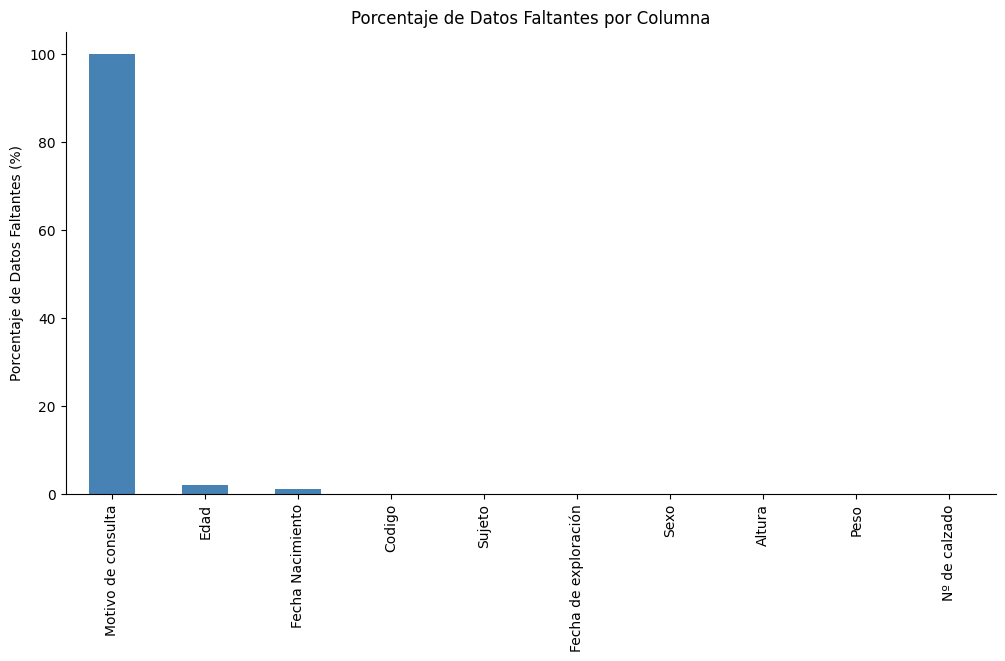

In [28]:
missing_percentage = calculate_missing_percentage(perfil_df, perfil_df.columns, visualize=True, figsize=(12,6))

In [29]:
perfil_df.head()

0     Codigo Sujeto     Fecha Nacimiento Fecha de exploración Edad Sexo  \
0  R00001MVE      1  1985-08-23 00:00:00  2021-11-04 16:58:00   36    F   
1  R00002JVM      2  1986-07-06 00:00:00  2021-11-04 17:41:00   35    M   
2  R00004EPC      4  1976-03-01 00:00:00  2021-11-15 13:40:00   45    M   
3  R00005DCM      5  1978-12-23 00:00:00  2021-11-15 12:33:00   43    M   
4  R00006FAG      3  1980-01-24 00:00:00  2021-11-15 16:10:00   41    M   

0 Altura Peso Nº de calzado Motivo de consulta  
0    173   65            40                NaN  
1    181   78            44                NaN  
2    189   88            46                NaN  
3    182   70            44                NaN  
4    184   90            43                NaN

### Conversión de Tipos de Datos

1. **Columnas con Fechas:** 'Fecha Nacimiento' y 'Fecha de exploración' deben convertirse a datetime.
2. **Columnas con Datos Numéricos:** 'Edad', 'Altura', 'Peso', y 'Nº de calzado' deben convertirse a tipos numéricos.
3. **Columnas con Datos Categóricos:** 'Sexo' y 'Motivo de consulta' pueden permanecer como objetos.

In [30]:
# Convertir las columnas de fecha
df['Fecha Nacimiento'] = pd.to_datetime(df['Fecha Nacimiento'], errors='coerce')
df['Fecha de exploración'] = pd.to_datetime(df['Fecha de exploración'], errors='coerce')

# Convertir las columnas numéricas
df['Sujeto'] = pd.to_numeric(df['Sujeto'], errors='coerce').astype('Int64')
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce').astype('Int64')
df['Altura'] = pd.to_numeric(df['Altura'], errors='coerce')
df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
df['Nº de calzado'] = pd.to_numeric(df['Nº de calzado'], errors='coerce')

print(df[perfil_df.columns].dtypes) # Verificar los cambios

0
Codigo                          object
Sujeto                           Int64
Fecha Nacimiento        datetime64[ns]
Fecha de exploración    datetime64[ns]
Edad                             Int64
Sexo                            object
Altura                         float64
Peso                           float64
Nº de calzado                  float64
Motivo de consulta              object
dtype: object


### Distribución - Análisis de Outliers

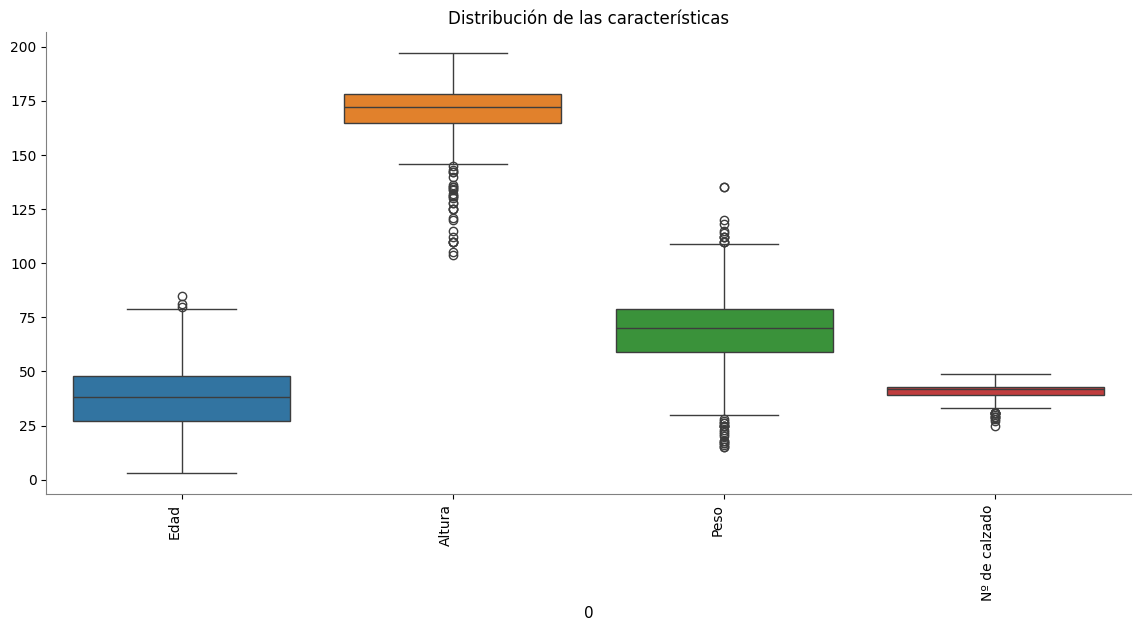

In [31]:
plot_boxplot(df[['Edad','Altura','Peso','Nº de calzado']])

### Z-Score

In [32]:
df, outliers_peso = calculate_zscore(df, 'Peso')
print(outliers_peso[['Edad', 'Sexo', 'Altura', 'Peso', 'Nº de calzado']])

0    Edad Sexo  Altura   Peso  Nº de calzado
90     38    M   190.0  118.0           48.9
364    55    M   185.0  135.0           49.0
466     3    M   110.0   17.0           28.0
475     4    M   110.0   18.0           29.0
524     6    M   110.0   21.0           31.0
536     5    M   104.0   15.0           27.0
554     5    F   105.0   17.0           25.0
590     5    M   112.0   16.0           30.0
592     5    F   110.0   15.0           29.0
785     7    M   120.0   20.0           31.0
800    29    M   188.0  120.0           44.5
816    43    M   180.0  135.0           43.0
896     4    M   115.0   18.0           29.0


In [33]:
df, outliers_peso = calculate_zscore(df, 'Altura')
print(outliers_peso[['Edad', 'Sexo', 'Altura', 'Peso', 'Nº de calzado']])

0    Edad Sexo  Altura  Peso  Nº de calzado
447     9    F   128.0  25.0           34.0
451     7    F   131.0  25.0           31.0
466     3    M   110.0  17.0           28.0
474     6    M   121.0  25.0           31.0
475     4    M   110.0  18.0           29.0
524     6    M   110.0  21.0           31.0
536     5    M   104.0  15.0           27.0
554     5    F   105.0  17.0           25.0
568     6    M   125.0  22.0           31.0
574     9    M   132.0  32.0           34.0
590     5    M   112.0  16.0           30.0
592     5    F   110.0  15.0           29.0
785     7    M   120.0  20.0           31.0
805     8    M   125.0  27.0           34.0
824     8    F   130.0  23.0           33.0
838     8    M   125.0  26.0           33.0
848     9    M   131.0  30.0           33.0
885     7    M   128.0  25.0           33.0
896     4    M   115.0  18.0           29.0


La gráfica de caja (boxplot) muestra la distribución de las características `Edad`, `Altura`, `Peso` y `Número de calzado` en el dataset y se observa lo siguiente:

- **Edad**: La mediana se encuentra alrededor de 39 años, con un rango intercuartil (IQR) que va desde aproximadamente 29 hasta 48 años. Existen algunos valores atípicos por encima de 75 años.
- **Altura**: La mediana está cerca de 173 cm. El IQR va de aproximadamente 168 cm a 179 cm, con varios valores atípicos por debajo de 150 cm.
- **Peso**: La mediana está cerca de 70 kg. El IQR se extiende de alrededor de 62 kg a 80 kg, con valores atípicos tanto por debajo de 50 kg como por encima de 100 kg.
- **Número de calzado**: La mediana está cerca de 42, con un IQR que va de aproximadamente 39.5 a 44. Se observan algunos valores atípicos por debajo de 36.

En general, las distribuciones de `Altura` y `Peso` muestran una mayor cantidad de valores atípicos, lo que sugiere variabilidad significativa en estas características dentro de la población del estudio.

### Análisis de 'Codigo' y 'Sujeto'

In [34]:
print(f"Total registros: {len(perfil_df)}")
print(f"Códigos únicos: {df['Codigo'].nunique()}")
print(f"Nº Sujetos únicos: {df['Sujeto'].nunique()}")

Total registros: 897
Códigos únicos: 730
Nº Sujetos únicos: 479


### Análisis de Registros con Códigos Repetidos

In [35]:
# Contar cuántas veces aparece cada código en el dataset
codigo_counts = df['Codigo'].value_counts()

# Crear un DataFrame a partir del conteo de frecuencias
frec_df = pd.DataFrame(codigo_counts).reset_index()
frec_df.columns = ['Codigo', 'Frecuencia']

# Contar cuántos códigos aparecen 1, 2, 3, o más de 3 veces
print(f"Códigos que aparecen 1 vez: {frec_df[frec_df['Frecuencia'] == 1].shape[0]}")
print(f"Códigos que aparecen 2 veces: {frec_df[frec_df['Frecuencia'] == 2].shape[0]}")
print(f"Códigos que aparecen 3 veces: {frec_df[frec_df['Frecuencia'] == 3].shape[0]}")
print(f"Códigos que aparecen más de 3 veces: {frec_df[frec_df['Frecuencia'] > 3].shape[0]}")

Códigos que aparecen 1 vez: 604
Códigos que aparecen 2 veces: 91
Códigos que aparecen 3 veces: 29
Códigos que aparecen más de 3 veces: 6


In [36]:
# Filtrar los códigos que aparecen más de una vez
codigo_repetido = df['Codigo'].value_counts()
codigo_repetido = codigo_repetido[codigo_repetido > 1].index

# Extraer registros con códigos repetidos
registros_repetidos = df[df['Codigo'].isin(codigo_repetido)]
registros_ordenados = registros_repetidos.sort_values(by=['Codigo', 'Fecha de exploración'])
print(registros_ordenados[['Codigo','Fecha de exploración','Articulación']].head(10))

0       Codigo Fecha de exploración Articulación
431  00048JMRC  2020-09-09 12:37:00       Lumbar
432  00048JMRC  2020-09-09 12:37:00      Pierna 
433  00048JMRC  2020-09-09 12:37:00          Pie
443   00058MPR  2020-10-02 17:43:00          Pie
444   00058MPR  2020-10-02 17:43:00      Pierna 
539   00154DBC  2021-05-26 00:00:00      Pierna 
540   00154DBC  2021-05-26 00:00:00          Pie
545   00159MLS  2021-06-02 20:36:00      Tobillo
546   00159MLS  2021-06-02 20:36:00      Pierna 
548   00161LGS  2021-06-09 13:11:00          Pie


#### Conclusión sobre los Datos de Códigos Repetidos

El análisis de los datos muestra que algunos códigos están asociados con múltiples registros. Esto indica que **un mismo código puede representar varias visitas o exploraciones del mismo sujeto en la misma fecha pero relacionadas con diferentes articulaciones.** La repetición de códigos en el mismo momento temporal sugiere que cada entrada podría representar un aspecto diferente de una visita médica más amplia, donde se evalúan múltiples áreas del cuerpo del paciente. Esto es común en registros médicos donde un paciente puede presentar quejas sobre diferentes partes del cuerpo durante la misma visita.

### Análisis de 'Fecha de Nacimiento' vs 'Edad'

Revisamos valores faltantes en 'Edad' y mostramos los valores de 'Fecha Nacimiento' para los registros con 'Edad' faltantes:

In [37]:
missing_ages = df[df['Edad'].isnull()]
missing_ages_info = missing_ages[['Fecha Nacimiento', 'Edad']]
print(missing_ages_info)

0   Fecha Nacimiento  Edad
15        2021-09-17  <NA>
72               NaT  <NA>
73               NaT  <NA>
74               NaT  <NA>
75               NaT  <NA>
274              NaT  <NA>
304       2022-03-22  <NA>
420       2020-05-30  <NA>
460       2020-11-15  <NA>
510              NaT  <NA>
511              NaT  <NA>
533       2021-04-17  <NA>
541              NaT  <NA>
582       2021-04-05  <NA>
784       2022-12-28  <NA>
810              NaT  <NA>
831       2023-09-10  <NA>


#### Conclusión sobre el Uso de la Columna 'Fecha de Nacimiento'

Tras analizar la columna 'Fecha de Nacimiento' en relación con los datos faltantes en 'Edad', se decide **no utilizar 'Fecha de Nacimiento' para el análisis** adicional. La razón principal es que la columna 'Fecha de Nacimiento' contiene varios errores y valores faltantes (NaT), lo que reduce su fiabilidad y precisión como fuente para imputar o verificar las edades faltantes. Además, algunos registros tienen fechas que sugieren un error en la captura de datos, mostrando años recientes que podrían confundirse con fechas de exploración en lugar de nacimiento. Por lo tanto, su valor añadido es limitado y podría llevar a conclusiones incorrectas si se usa para calcular la 'Edad'.

### Medidas de Asociación - Matriz de Correlación

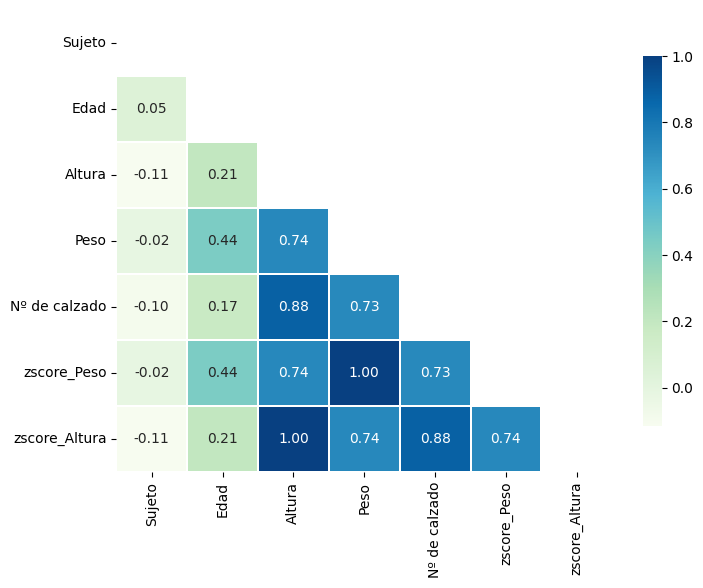

In [38]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Filtrar por alta correlación con 'Edad'
high_corr = corr_matrix.loc[corr_matrix['Edad'].abs() > 0.5]
high_corr_with_age = high_corr['Edad']

# Crear un DataFrame solo con las columnas altamente correlacionadas
cols_high_corr = high_corr_with_age.index.tolist()
corr_high = df[cols_high_corr].corr()

plot_heatmap(corr_matrix=corr_matrix, figsize=(8, 6), cmap='GnBu', title='')
#plot_heatmap(corr_matrix=corr_high, figsize=(8, 6), cmap='GnBu', title='Mapa de Calor de Correlaciones Altas con Edad')

#### Conclusión sobre el Análisis de Correlación con la Edad

Actualmente, **no se han encontrado variables altamente correlacionadas con la 'Edad'** en el análisis, lo que limita la aplicación de imputaciones basadas en modelos predictivos. Posiblemente optaremos por la **imputación por la media** para manejar los valores faltantes en 'Edad', con el objetivo de mantener la integridad del conjunto de datos sin eliminar registros.

Continuaremos evaluando la posibilidad de imputar utilizando variables relacionadas conforme avancemos en el análisis de los subgrupos. Esta estrategia se ajustará según sea necesario para mejorar la calidad y precisión del análisis.

### Análisis Específico de las Columnas 'Edad', 'Altura', 'Peso', 'Nº calzado'

In [39]:
df[['Edad','Altura','Peso','Nº de calzado']].describe()

0           Edad      Altura        Peso  Nº de calzado
count      880.0  897.000000  897.000000     897.000000
mean   38.164773  170.663545   69.091416      41.178149
std    15.993994   12.514888   15.884787       3.123148
min          3.0  104.000000   15.000000      25.000000
25%         27.0  165.000000   59.000000      39.000000
50%         38.0  172.000000   70.000000      42.000000
75%         48.0  178.000000   79.000000      43.000000
max         85.0  197.000000  135.000000      49.000000

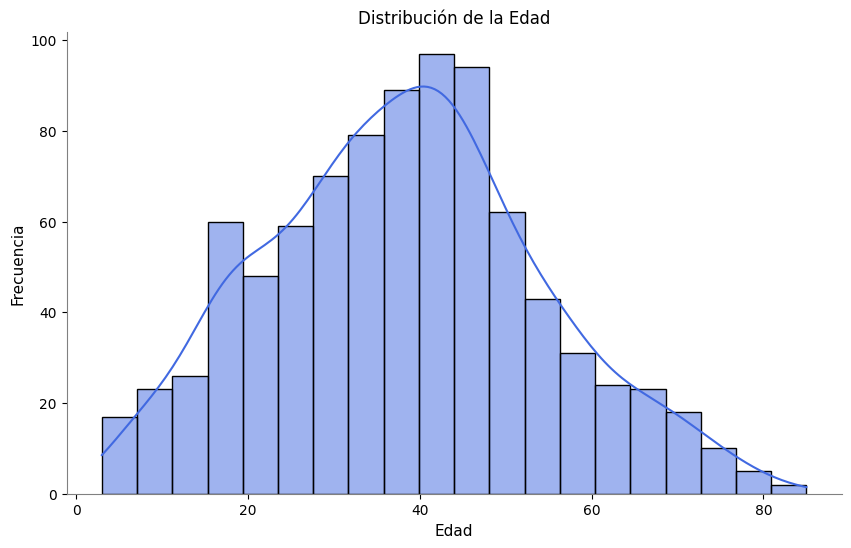

In [40]:
plot_histogram(df[perfil_df.columns], 'Edad', bins=20, title="Distribución de la Edad", xlabel="Edad", ylabel="Frecuencia")

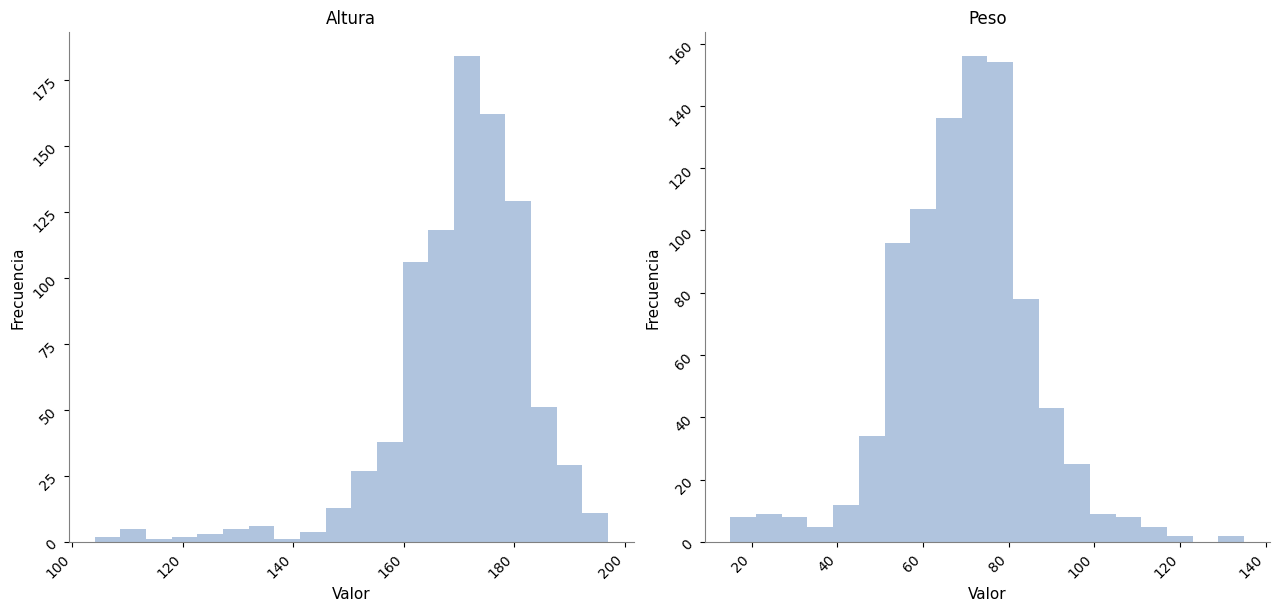

In [41]:
plot_data_histogram(df[['Altura','Peso']], 20, (24, 6), 'lightsteelblue')

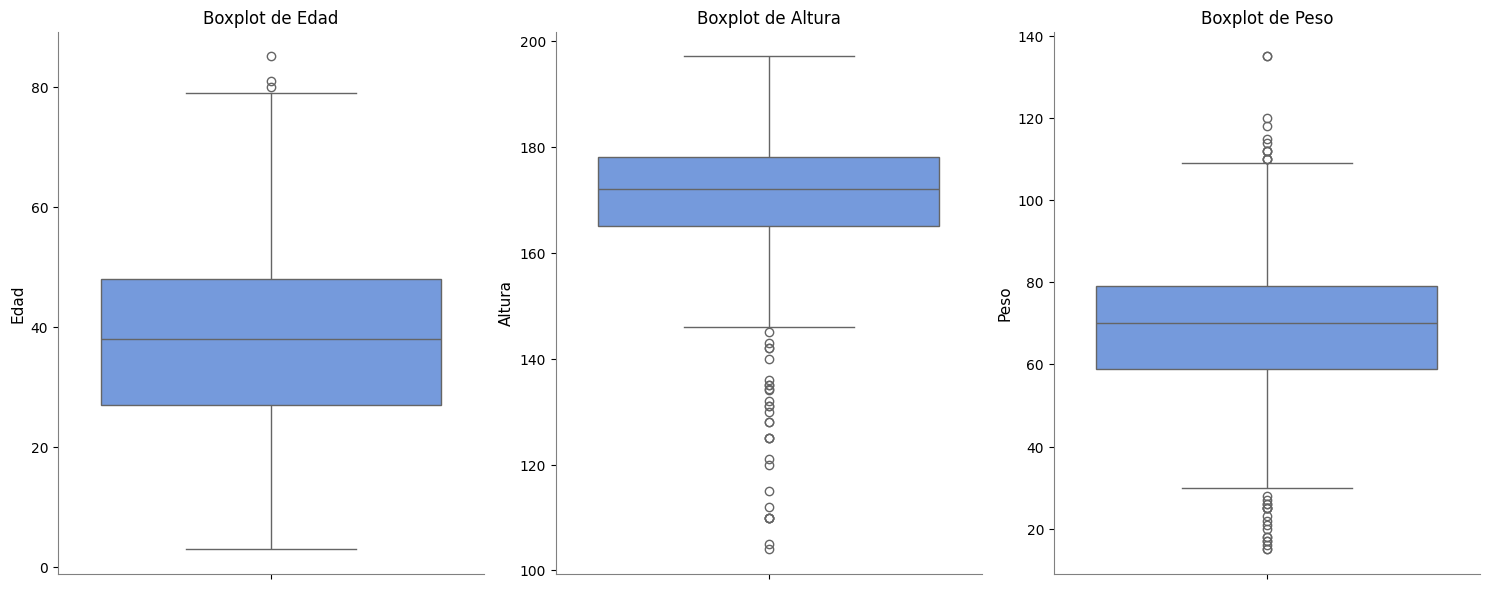

In [42]:
plot_grid_boxplots(df, ['Edad','Altura', 'Peso'], 3, (5, 6))

### Análisis de la Columna 'Sexo'

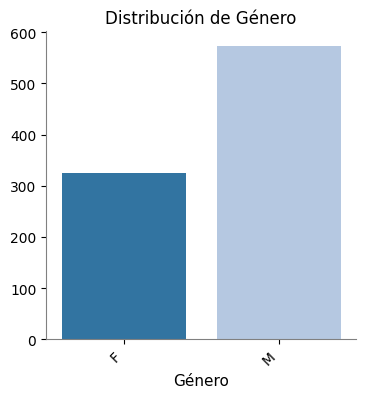

In [43]:
plot_count(df[perfil_df.columns], 'Sexo', title="Distribución de Género", xlabel="Género", ylabel="", figsize=(4, 4), palette="tab20")

### ANOVA (Análisis de Varianza)  y Prueba T de Student

In [44]:
anova_result = perform_anova(df, 'Peso', 'Sexo')
print(anova_result)

                 sum_sq     df           F        PR(>F)
C(Sexo)    39828.606816    1.0  191.385098  1.376473e-39
Residual  186255.897086  895.0         NaN           NaN


In [45]:
anova_result = perform_anova(df, 'Altura', 'Sexo')
print(anova_result)

                 sum_sq     df           F        PR(>F)
C(Sexo)    29879.309475    1.0  242.108823  1.696022e-48
Residual  110454.388451  895.0         NaN           NaN


In [46]:
# T-test para comparar 'peso' entre hombres y mujeres
t_stat, p_value = perform_ttest(df, 'Peso', 'Sexo')
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -13.834200298985959, P-value: 1.3764725542053524e-39


In [47]:
# T-test para comparar 'altura' entre hombres y mujeres
t_stat, p_value = perform_ttest(df, 'Altura', 'Sexo')
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -15.55984649583114, P-value: 1.6960215444426716e-48


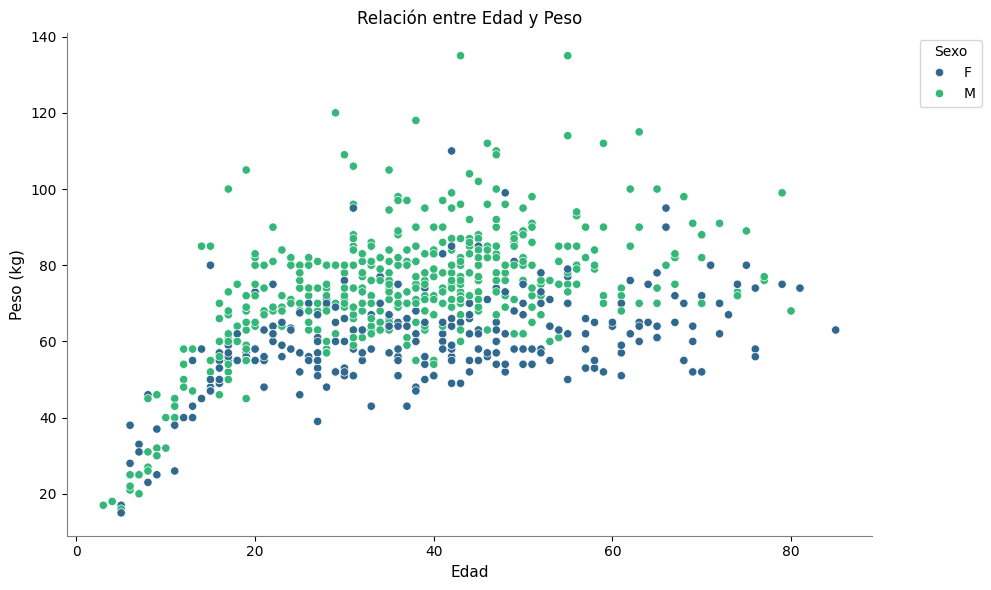

In [48]:
plot_scatter_with_hue(df, 'Edad', 'Peso', 'Sexo', "Relación entre Edad y Peso", "Edad", "Peso (kg)")

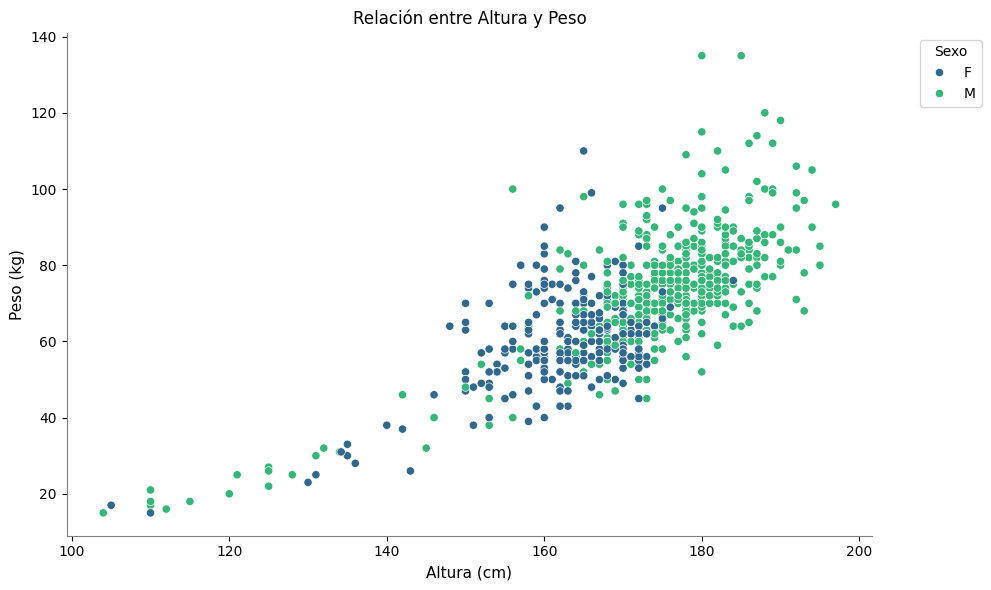

In [49]:
plot_scatter_with_hue(df, 'Altura', 'Peso', 'Sexo', "Relación entre Altura y Peso", "Altura (cm)", "Peso (kg)")

### Análisis de Sujetos Menores de 20 años

In [50]:
menores_20 = df[df['Edad'] < 20]
print(menores_20[['Edad', 'Altura', 'Peso']].describe()) # Estadísticas Descriptivas para Menores de 20 Años

0           Edad      Altura        Peso
count      126.0  126.000000  126.000000
mean   13.738095  157.953968   49.507937
std     4.529333   20.771552   17.188715
min          3.0  104.000000   15.000000
25%         11.0  146.000000   40.000000
50%         15.0  162.000000   52.000000
75%         17.0  172.000000   58.000000
max         19.0  195.000000  105.000000


In [51]:
peso_menos_20 = df[df['Peso'] < 20]
print(peso_menos_20[['Edad', 'Altura', 'Peso']])  # Revisar registros con peso menor de 20kg

0    Edad  Altura  Peso
466     3   110.0  17.0
475     4   110.0  18.0
536     5   104.0  15.0
554     5   105.0  17.0
590     5   112.0  16.0
592     5   110.0  15.0
896     4   115.0  18.0


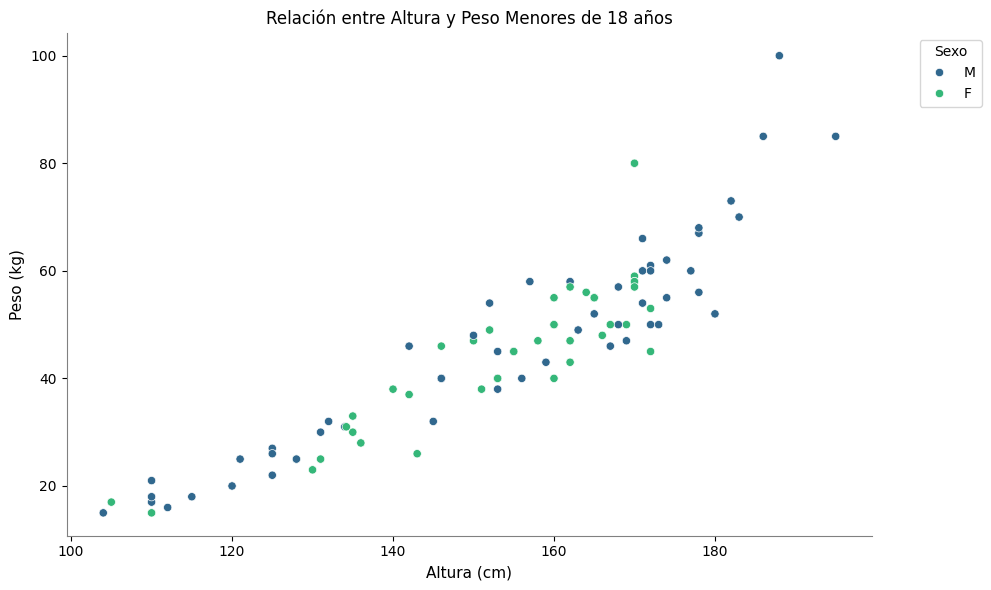

In [52]:
plot_scatter_with_hue(df[df['Edad'] < 18], 'Altura', 'Peso', 'Sexo', "Relación entre Altura y Peso Menores de 18 años", "Altura (cm)", "Peso (kg)")

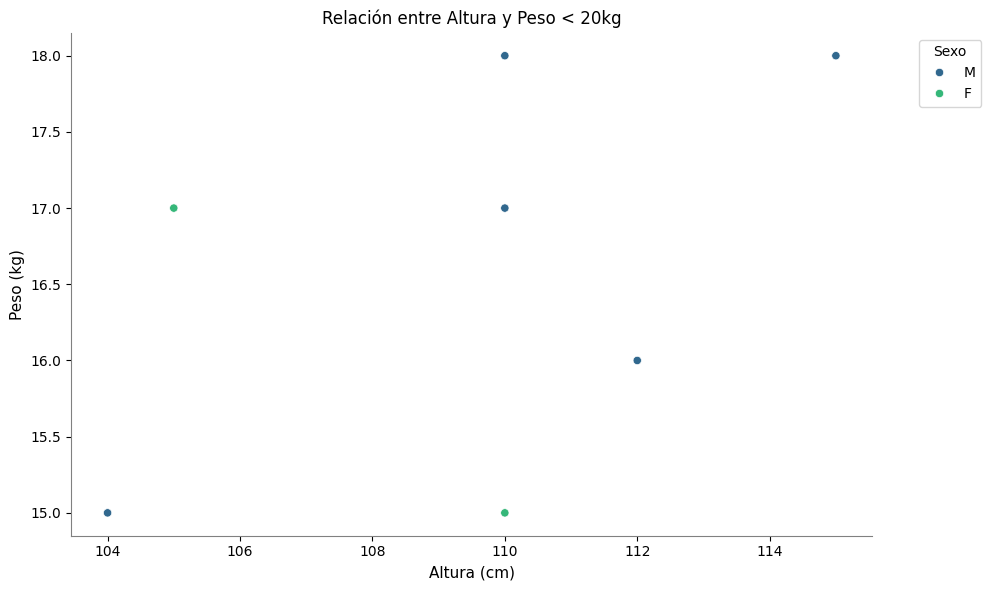

In [53]:
plot_scatter_with_hue(df[df['Peso'] < 20], 'Altura', 'Peso', 'Sexo', "Relación entre Altura y Peso < 20kg", "Altura (cm)", "Peso (kg)")

### Analisis Detallado de Valores Faltantes en Columnas de Interés

In [54]:
columns_of_interest = ['Edad', 'Sexo', 'Altura', 'Peso', 'Nº de calzado']
rows_with_missing_values = df[df[columns_of_interest].isnull().any(axis=1)][columns_of_interest]
rows_with_missing_values

0    Edad Sexo  Altura  Peso  Nº de calzado
15   <NA>    M   173.0  80.0           42.0
72   <NA>    M   172.0  76.0           42.0
73   <NA>    M   172.0  76.0           42.0
74   <NA>    M   172.0  76.0           42.0
75   <NA>    M   172.0  76.0           42.0
274  <NA>    F   161.0  50.0           37.0
304  <NA>    F   168.0  80.0           39.0
420  <NA>    M   174.0  70.0           42.0
460  <NA>    M   172.0  85.0           42.0
510  <NA>    F   175.0  58.0           40.0
511  <NA>    M   178.0  66.0           43.0
533  <NA>    F   165.0  57.0           38.0
541  <NA>    F   167.0  58.0           39.0
582  <NA>    F   153.0  48.0           38.0
784  <NA>    M   166.0  54.0           37.0
810  <NA>    M   188.0  86.0           46.0
831  <NA>    M   173.0  85.0           43.0

### Conclusiones del Análisis de Variables Demográficas y Biométricas

**Distribución General:**
- La `edad` de los sujetos muestra una distribución con una **media de 38 años** y una **desviación estándar de 16 años**, indicando una amplia gama de edades entre los participantes.
- La `altura` y el `peso` también presentan una variabilidad significativa, lo que refleja una muestra diversa en términos de características físicas. Presentan distribuciones normales con valores medios de **170cm y 68kg** respectivamente.
- En la distribución de género (`sexo`), se observa un desequilibrio en la muestra con **predominio masculino**, lo que podría sesgar el análisis de género.

**Datos Atípicos:**
- Existen registros con valores de **peso muy bajos** que podrían ser errores de entrada, como los sujetos con un peso registrado de 7 kg a pesar de tener estaturas adultas.
- En cuanto a la población joven (**menores de 20 años**), la altura y el peso varían como se esperaría en un grupo en desarrollo, con un rango de altura de 104 a 195 cm y un rango de peso de 15 a 105 kg.

**Matriz de Correlación**:
- Se observa una correlación positiva fuerte entre la `altura` y el `número de calzado`, lo cual es esperado.
- También se aprecia una correlación moderada entre el peso y la altura, así como entre el peso y el número de calzado.

**Consideraciones Adicionales**:
- El número de códigos únicos es inferior al total de registros, lo que sugiere la presencia de múltiples registros por individuo.
- La columna `Motivo de consulta` está vacía y será excluida del análisis.

**Consideraciones:**
- La estratificación por edad es importante, especialmente para entender mejor las características de los menores de 18 años.
- La **correlación entre la altura y el peso** muestra un patrón esperado de aumento de peso con la altura, lo que se observa claramente en los gráficos de dispersión.
- El peso atípicamente bajo en adultos sugiere la necesidad de una **limpieza de datos adicional** o revisión de los métodos de entrada.

### Eliminación de Columnas Irrelevantes

Columnas que no aportan información útil para el análisis y por tanto se eliminarán:
- `Codigo`
- `Sujeto`
- `Fecha Nacimiento`
- `Fecha de exploración`
- `Motivo de consulta`

### Estrategia de Imputación Considerada y Codificación de Variables

En las columnas incluidas para el análisis se hará lo siguiente:
- `Sexo` - asignar valores binarios ('F': 0, 'M': 1)
- `Edad` - imputación basada en modelo predictivo utilizando las columnas 'Sexo', 'Altura', 'Peso' y 'Número de calzado'

### Creación de Características

- `IMC` - se creará una nueva columna 'IMC' (peso en kg dividido por el cuadrado de la altura en metros)

### 2.6.2. `Grupo 2 - Patología`

In [55]:
patologia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NºPatologia   897 non-null    object
 1   Articulación  897 non-null    object
 2   Localizacion  897 non-null    object
 3   Lado          897 non-null    object
 4   Patologia     872 non-null    object
dtypes: object(5)
memory usage: 35.2+ KB


Porcentaje de datos faltantes por columna:
Patologia: 2.79%


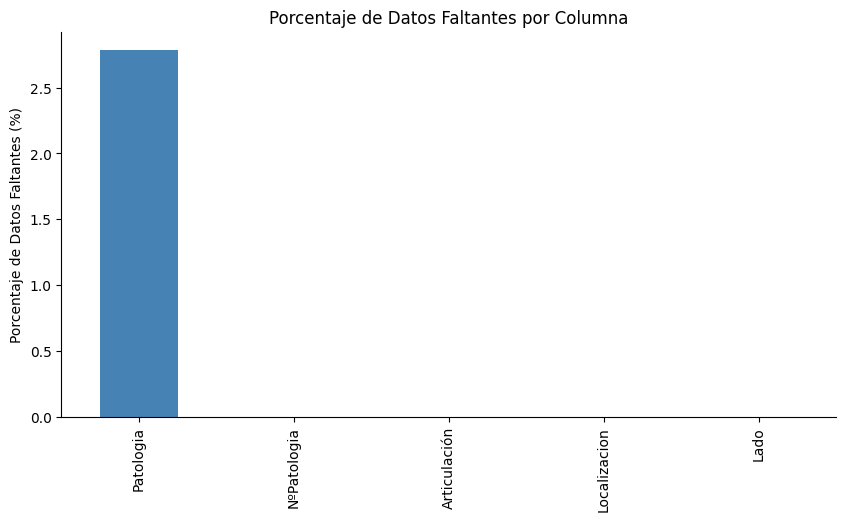

In [56]:
missing_percentage = calculate_missing_percentage(patologia_df, patologia_df.columns, visualize=True, figsize=(10,5))

### Conversión de Tipos de Datos

1. **Nº Patología**: Aunque parece un identificador numérico para las patologías, decidimos no convertirlo a un tipo numérico porque los números representan categorías sin un orden numérico inherente.
2. **Articulación, Localización, Lado, Patología**: Estos campos parecen ser categóricos, por lo que se conservan como tipo objeto.

In [57]:
patologia_df.describe()

0       NºPatologia Articulación Localizacion Lado Patologia
count           897          897          897  897       872
unique            5           13           28   60       474
top               1          Pie    Posterior    D  Talalgia
freq            698          266          152  154        37

In [58]:
patologia_df.isnull().sum()

0
NºPatologia      0
Articulación     0
Localizacion     0
Lado             0
Patologia       25
dtype: int64

### Columna 'NºPatologia'

In [59]:
df['NºPatologia'].value_counts()

NºPatologia
1    698
2    124
3     35
0     34
4      6
Name: count, dtype: int64

Con respecto a 'NºPatologia', parece ser un indicador de múltiples patologías por sujeto. Si un sujeto presenta múltiples problemas, se registra con un número correlativo, lo cual es relevante para entender la complejidad y el número de quejas por sujeto.

### Columnas 'Articulación', 'Localizacion' y 'Lado'

In [60]:
print(df['Articulación'].unique())

['Rodilla' 'Sin afectacion' 'Pie' 'Pierna ' 'Tobillo' 'Espalda' 'Cadera'
 'Muslo' 'Rodilla ' 'Cadera ' 'Pie ' 'Complejo' 'Lumbar']


In [61]:
print(df['Localizacion'].unique())

['Medial' 'Sin afectacion' 'Posterior' 'Lateral' 'Lumbar'
 'Anterior - Posterior' 'posterolateral' 'Plantar' 'Plantar proximal'
 'Plantar distal' 'Anterior' 'Dorsal proximal' 'Posteriro'
 'Medial-lateral' 'anterolateral' 'Medial-Lateral' 'Medail'
 'Dorsal distal' 'Posterior ' 'Planta proximal' 'Complejo' 'Lateral '
 'Planta distal' 'anteromedial' 'mediolateral' 'Interna' 'posteromedial'
 'posterior']


In [62]:
print(df['Lado'].unique())

['Bilateral ' 'Ninguno' 'Derecho' 'Izquierda' 'Derecha' 'izquierdo' 'I'
 'B' 'D' '-' 'D ' 'I ' 'Bilateral' 'Complejo' 'Izquierdo' 'bilateral'
 'Bilateral (+PD)' 'Bilateral +PD' 'Más lado izquierdo' 'Izquierdo '
 'derecho' 'Bilateral (+en I)' 'Bilateral más izquierdo' 'Derehca'
 'derecha' 'Bilateral + Izquierda' 'Bilateral (+izquierda)' 'izquierda'
 'Left' 'izdo' 'Bilateral +izq.' 'Bilateral (+Derecho)' 'Biltaeral (+D)'
 'Pie Izquierdo' 'pie izquierdo' 'Pie derecho' 'Bilateral +dx' 'Bilatera'
 'Izquierda ' 'bilateral más en derecha' 'Derecho e izquierdo. '
 'bilateral, ahora más derecho' 'derecha ' 'derecho ' 'Bilaterales'
 'Bilateral, peor derecho' 'Talón' 'izquierdo ' 'dereho ' 'bilateral '
 'bilateral, más izquierdo ' 'bilateral. ' 'Bilateral (+D)'
 'Derecho (alguna ligera izquierda)' 'derecho/bilateral ' 'izquierda '
 'Bilateral (+izquierdo)' 'Derecha ' 'bilateral más derecha '
 'mas derecho ']


### Unificar Categorías mediante Funciones Personalizadas

In [63]:
df['Articulación'] = clean_articulacion(df['Articulación'])
df['Localizacion'] = clean_localizacion(df['Localizacion'])
df['Lado'] = clean_lado(df['Lado'])

In [64]:
print(df['Articulación'].unique())

['rodilla' 'sin afectación' 'pie' 'pierna' 'tobillo' 'espalda' 'cadera'
 'muslo' 'complejo']


In [65]:
print(df['Localizacion'].unique())

['medial' 'no especificado' 'posterior' 'lateral' 'lumbar'
 'anteroposterior' 'posterolateral' 'plantar' 'plantar proximal'
 'plantar distal' 'anterior' 'dorsal proximal' 'mediolateral'
 'anterolateral' 'dorsal distal' 'anteromedial' 'posteromedial']


In [66]:
# Unificar categorías en 'Localizacion'
df['Localizacion'] = df['Localizacion'].replace({
    'anteroposterior': 'general',
    'mediolateral': 'general',
    'plantar proximal': 'plantar',
    'plantar distal': 'plantar',
    'dorsal proximal': 'dorsal',
    'dorsal distal': 'dorsal',
    'posterolateral': 'posterior',
    'posteromedial': 'posterior',
    'anterolateral': 'anterior',
    'anteromedial': 'anterior',
    'no especificado': 'no-especificado'
})

print(df['Localizacion'].unique()) # Verificar los cambios realizados

['medial' 'no-especificado' 'posterior' 'lateral' 'lumbar' 'general'
 'plantar' 'anterior' 'dorsal']


Verificamos cuántas combinaciones únicas de Articulación' y 'Localización' tendríamos:

In [67]:
# Crear una columna temporal que combine 'Articulación' y 'Localización'
df['Zona_Afectada'] = df['Articulación'] + "_" + df['Localizacion']

print(f"Nº de combinaciones únicas de Articulación y Localización: {df['Zona_Afectada'].nunique()}")

Nº de combinaciones únicas de Articulación y Localización: 35


In [68]:
print(df['Zona_Afectada'].unique())

['rodilla_medial' 'sin afectación_no-especificado' 'pie_medial'
 'pierna_posterior' 'tobillo_lateral' 'espalda_lumbar' 'rodilla_lateral'
 'rodilla_general' 'pierna_lateral' 'rodilla_posterior' 'pie_plantar'
 'rodilla_anterior' 'tobillo_medial' 'tobillo_posterior' 'cadera_lateral'
 'pie_lateral' 'muslo_posterior' 'pie_dorsal' 'tobillo_general'
 'muslo_lateral' 'cadera_posterior' 'tobillo_anterior' 'pierna_anterior'
 'cadera_anterior' 'complejo_no-especificado' 'espalda_posterior'
 'pierna_medial' 'cadera_medial' 'pie_no-especificado' 'muslo_general'
 'muslo_anterior' 'pie_general' 'pie_anterior' 'muslo_no-especificado'
 'pierna_general']


In [69]:
# print(df['Zona_Afectada'].value_counts())

El paso previo es de verificación, la creación de nuevas características se realizará en la etapa de preprocesado.

### Análisis de Distribución de Zonas Afectadas

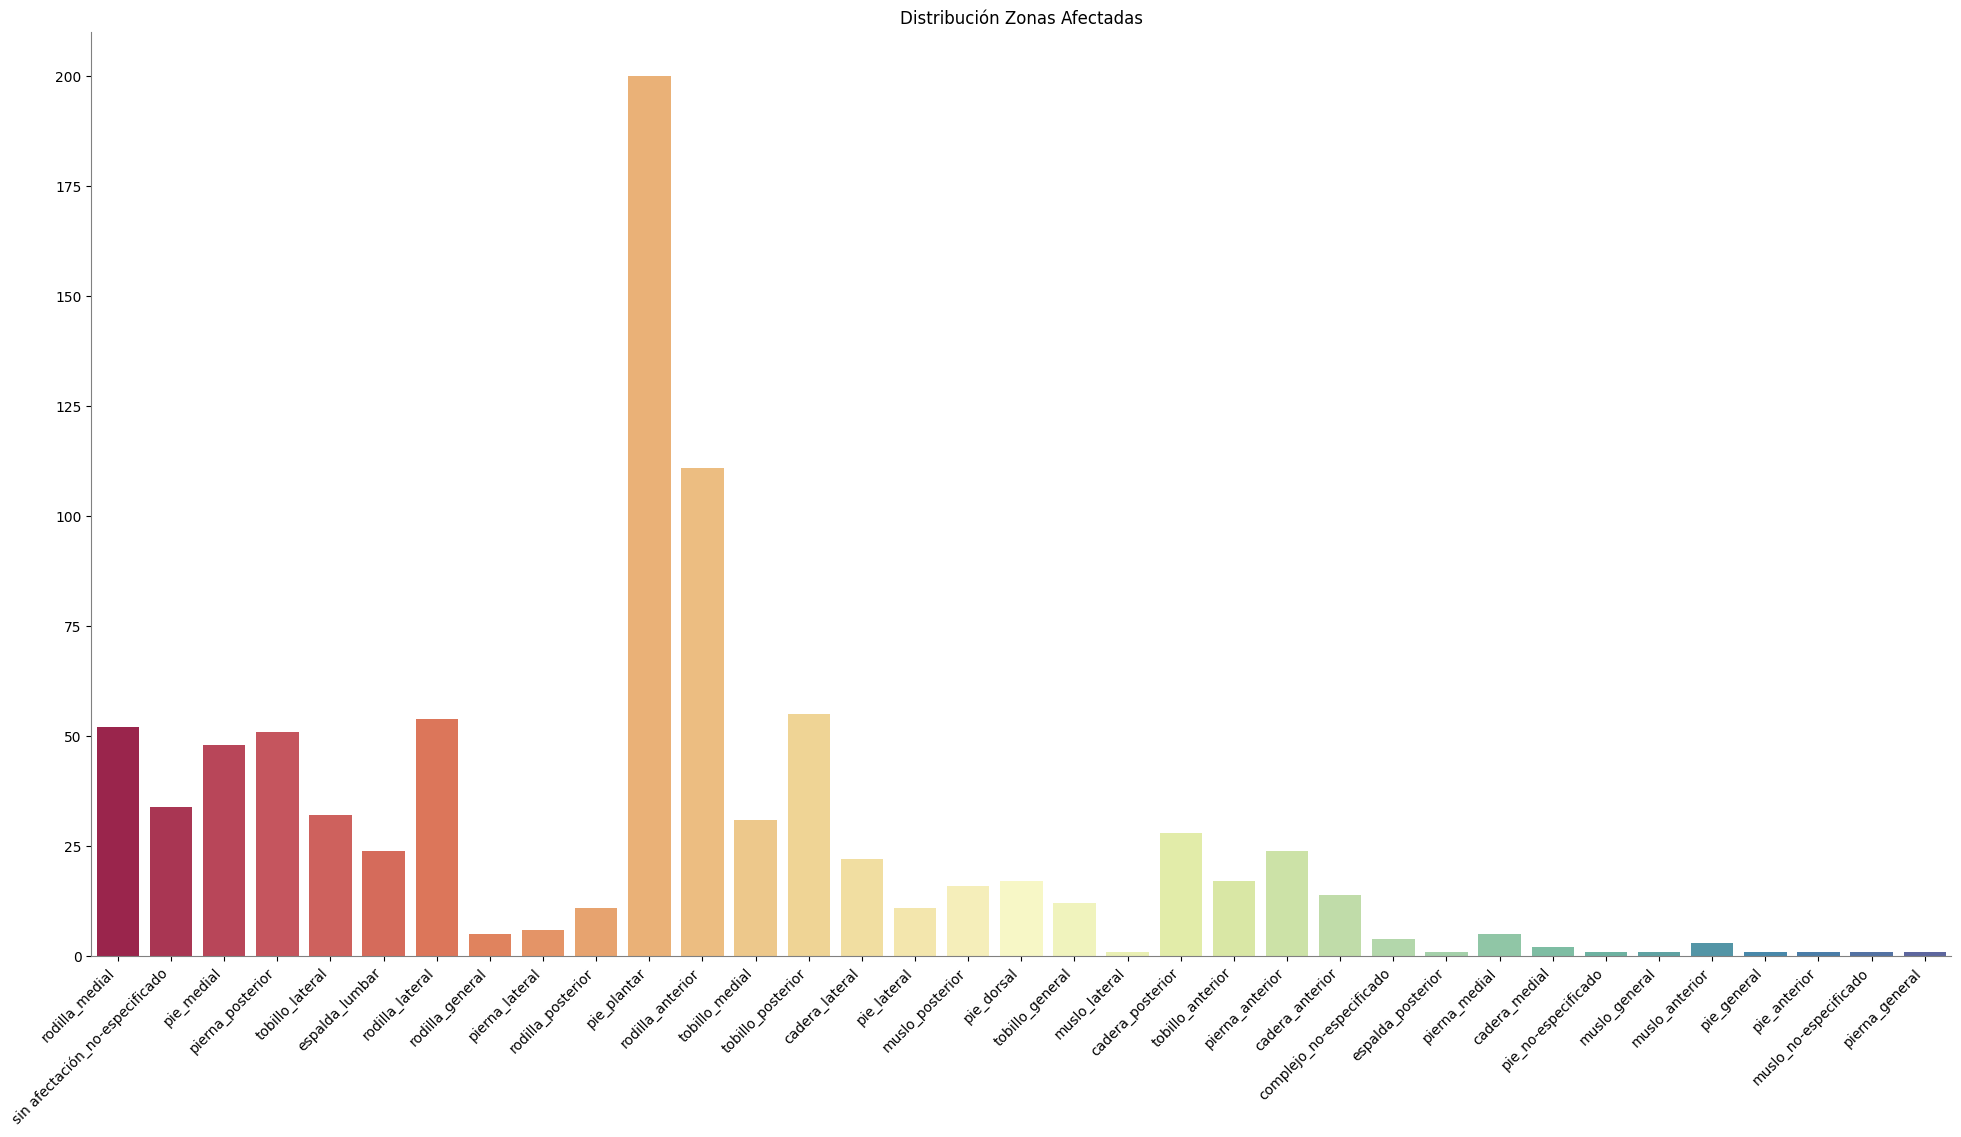

In [70]:
plot_count(df, 'Zona_Afectada', title="Distribución Zonas Afectadas", xlabel="", ylabel="", figsize=(24,12), palette='Spectral')

In [71]:
print(df['Lado'].unique())

['b' 'ninguno' 'd' 'i' 'no especificado' 'complejo' 'b + r' 'b + i']


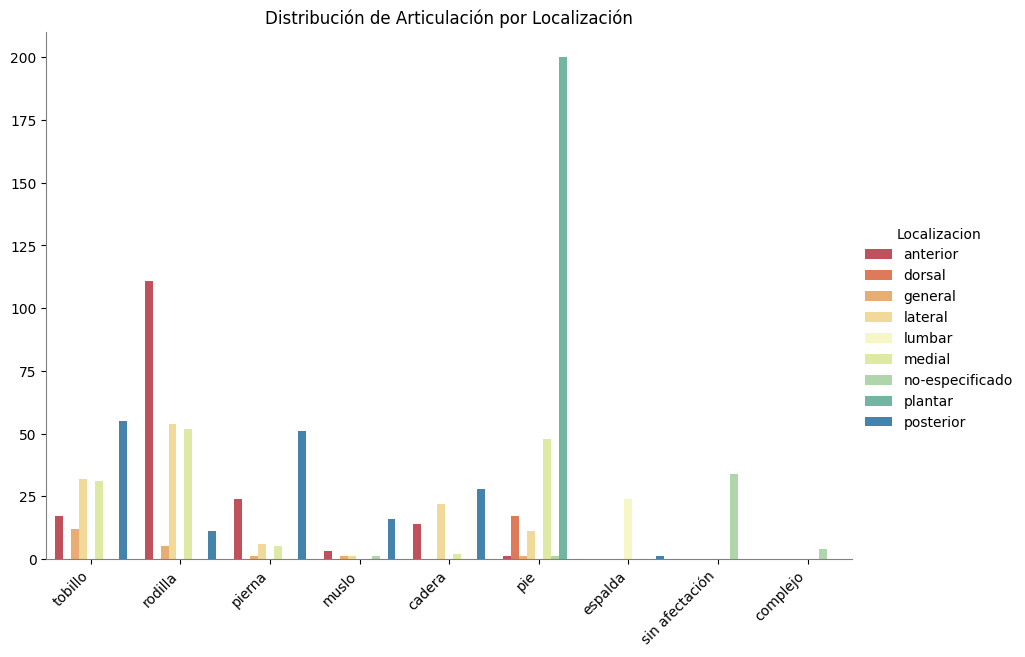

In [72]:
catplot(df, 'Articulación', 'Localizacion', 'Distribución de Articulación por Localización', palette='Spectral')

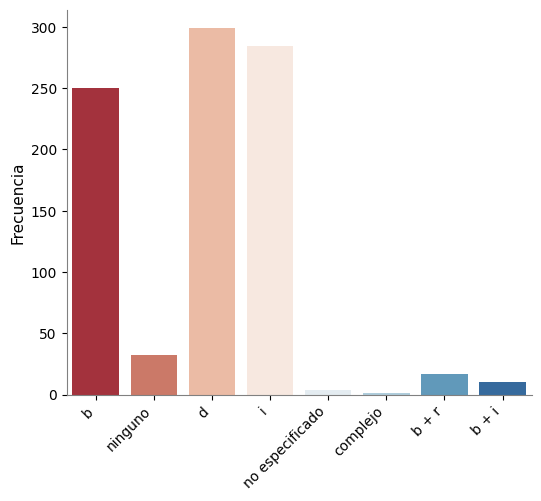

In [73]:
plot_count(df, 'Lado', '', '', 'Frecuencia', figsize=(6, 5), palette="RdBu")

Decidimos unificar las categorías en la columna `Lado`:

In [74]:
df['Lado'] = df['Lado'].replace({
    'b + r': 'b',
    'b + i': 'b',
    'ninguno': 'no especificado',
})

print(df['Lado'].unique()) # Verificar los cambios realizados

['b' 'no especificado' 'd' 'i' 'complejo']


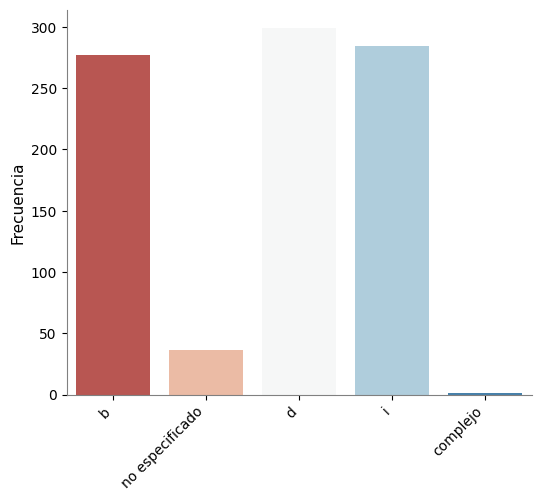

In [75]:
plot_count(df, 'Lado', '', '', 'Frecuencia', figsize=(6, 5), palette="RdBu")

Para garantizar un análisis preciso y modelos más interpretables, convertiremos la columna `Lado` en **variables binarias que especificarán claramente la afectación anatómica** en el lado derecho, izquierdo, o en casos complejos que involucren ambos lados o múltiples áreas. Así, *'bilateral'* se representará como presencia en ambas columnas 'derecho' e 'izquierdo', mientras que *'complejo'* indicará múltiples áreas afectadas en una columna separada. Esta representación binaria eliminará ambigüedades y reflejará la presencia o ausencia de afectación en cada categoría. Introduciremos estas nuevas columnas a continuación de `Lado` para mantener una secuencia coherente de los datos.

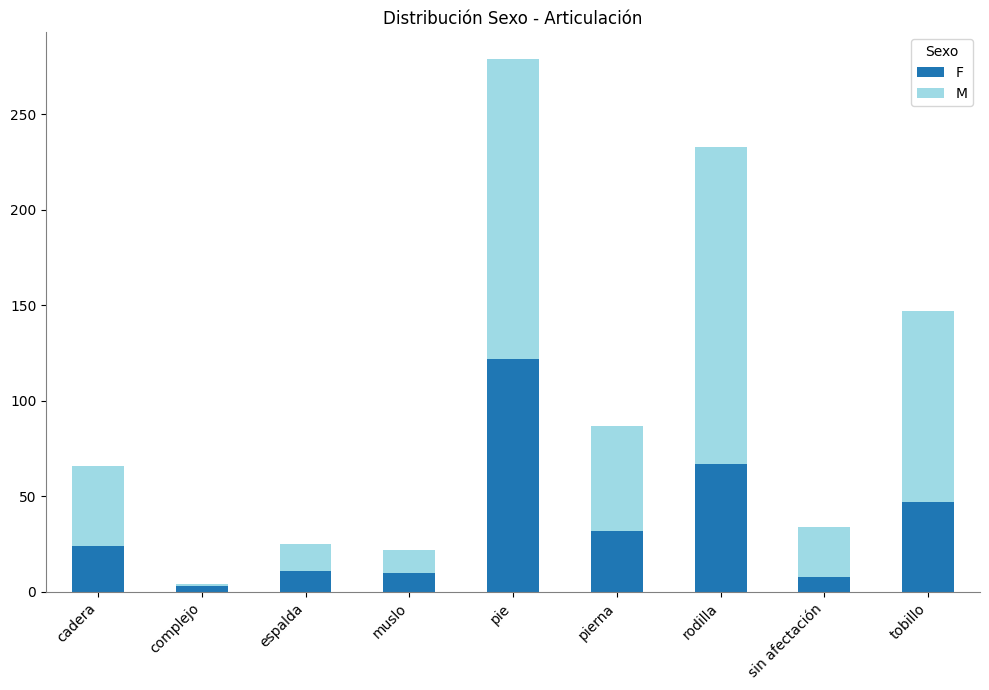

In [76]:
stacked_barplot(df, 'Articulación', 'Sexo', 'Distribución Sexo - Articulación', palette='tab20')

### Tabla de Contingencia

In [77]:
# Tabla de contingencia
table, chi2, p = contingency_table(df, 'Sexo', 'Articulación')
print(table)
print(f'Chi2: {chi2}, P-value: {p}')

Articulación  cadera  complejo  espalda  muslo  pie  pierna  rodilla  \
Sexo                                                                   
F                 24         3       11     10  122      32       67   
M                 42         1       14     12  157      55      166   

Articulación  sin afectación  tobillo  
Sexo                                   
F                          8       47  
M                         26      100  
Chi2: 20.049220372737288, P-value: 0.010151429262434578


Dado que el **valor p es menor que `0.05`**, podemos concluir que hay una **asociación significativa entre el Sexo y la Articulación afectada**. Esto sugiere que la distribución de las articulaciones afectadas difiere entre hombres y mujeres.

### Columna 'Patologia'

In [78]:
# Convertir todos los valores a string excepto NaN
unique_patologias = df['Patologia'].str.strip().str.lower().dropna().astype(str).unique()
unique_patologias.sort()

# Imprime los valores únicos ordenados
for patologia in unique_patologias:
    print(patologia)

1 año con molestias en pierna derecha cuadriceps espalda.
1mtf
4ºmeta
9 iq rodilla
accidente de tráfico
ajuste prótesis
alguna vez tibial posterior
alumno usj
ampollas metatarsales
aquiles
aquiles (sobrecarga)
aquiles - nervio peroneo
aquiles cortos
aquiles dcho-periostitis-fx estrés m2-m3 izq
aquiles derecho
aquiles derecho alguna molestia en frío
aquiles izquierdo
aquiles y fascia plantar en pd
arco interno y tibial anterior
artritis reumatoidea
artrodesis tobillo
artrosis cadera derecha
artrosis metatarsofalángica
artrosis rodilla
artrosis rodilla. artrosis generalizada
artrosis tibio-astragalina
asimetria
asimetría
bajo tono. preocupada por la pisada.
biomecanica plantillas
borde interno tibial
bíceps femoral
cadena posterior
cadera
cadera zona interior
cadera/coxis
cadera/gluteo
caderas
caida con diferentes afecciones
calcificación en astragalo
cambios al andar y en posición
cara anterior tibia
cara interna tobillo
cara medial de rodilla
cavo valgo (iq fasciotomía)
cintilla
cintil

La columna 'Patología' parece contener una gran cantidad de información heterogénea, con una mezcla de nombres de patologías, síntomas, notas clínicas y comentarios que podrían estar más relacionados con el historial médico o el motivo de la consulta que con categorías claras y útiles para un análisis estadístico.

### Conclusiones

La variable `NºPatologia` indica el **número de patologías por paciente**, siendo **'1' la más frecuente**. Esto sugiere que la mayoría de los sujetos presenta una única queja, aunque hay casos con múltiples afectaciones. Para futuros modelos predictivos o análisis, esta información podría ser clave para identificar la prevalencia y co-ocurrencia de múltiples condiciones en un sujeto.

La heterogeneidad de datos en la columna `Patología` implica un reto de procesamiento y categorización para su uso en análisis. La viabilidad de su limpieza o exclusión se balanceará con la relevancia clínica y los objetivos del estudio. Actualmente, dada la limitación de tiempo, se excluirá 'Patología' y se focalizará en `Articulación`, `Localizacion` y `Lado`. Futuras mejoras en la recopilación y tratamiento de datos podrán permitir la integración de `Patología` en análisis más sofisticados.

Las gráficas muestran la **distribución de patologías por articulación y localización**, siendo el pie (zona plantar) y la rodilla las más afectadas. Además, hay una notable diferencia entre géneros en la frecuencia de problemas articulares, siendo **el pie y la rodilla los más comunes en ambos sexos**.

### Creación de Características

- `Derecho`, `Izquierdo` - Creadas a partir de la columna 'Lado'
- `Zona afectada` - Se ha optado por fusionar las columnas 'Articulación' y 'Localización' para formar una nueva variable que proporcionará una perspectiva más integrada y precisa de la zona afectada en cada caso. Esta nueva columna será codificada y utilizada en el análisis predictivo.

### Estrategia de Imputación y Codificación de Variables

- `Zona afectada` - Se codificará atendiendo a su relación con la variable de interés, permitiendo así:
    - **Reducción de la Dimensionalidad** se evitará el aumento excesivo de variables predictoras que resultaría de aplicar técnicas como el One-Hot Encoding.
    - **Conservación de Asociaciones Relevantes**: se capturará la relación entre la nueva variable compuesta y el resultado de interés, que puede ser crucial en contextos sanitarios.
    - **Gestión de Categorías Infrecuentes**: al unir dos columnas con múltiples categorías, el **Target Encoding** evitará el problema de tener múltiples columnas con poca variabilidad y escasa representación.
    
### Eliminación de Columnas Irrelevantes

Con el objetivo de centrar el estudio en aspectos anatómicos y biomecánicos específicos, se procede a la eliminación de ciertas columnas que, aunque proporcionan información clínica, no garantizan un diagnóstico claro y fiable para este análisis. Las decisiones tomadas son las siguientes:

- `NºPatologia` y `Patologia`: se descartarán estas columnas puesto que la información que contienen no asegura un diagnóstico preciso o una clasificación de patología definida y fiable. En su lugar, se prestará atención a la región anatómica afectada indicada por la nueva columna Zona afectada, la cual refleja la localización de la afección sin asumir la presencia de una patología clínicamente diagnosticada.
- `Lado` - Se eliminará después de la etapa de preprocesamiento de los datos (para poder crear las columnas 'Derecho' e 'Izquierdo')
- `Articulación`, `Localizacion` - Serán descartadas una vez que se hayan extraído y codificado adecuadamente los datos necesarios para formar la nueva columna 'Zona afectada'.

### 2.6.3. `Grupo 3 - ib_resport_df - Historia Clínica`

In [79]:
ib_resport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Enf Sistemicas 1           239 non-null    object
 1   Enfermedades Sistemicas 2  3 non-null      object
 2   Sintomas narrados          858 non-null    object
 3   Diagnóstico 1              708 non-null    object
 4   Dagnóstico 2               2 non-null      object
 5   IQ                         335 non-null    object
 6   Fecha IQ                   24 non-null     object
 7   Resultado IQ               9 non-null      object
 8   Tabaco                     104 non-null    object
 9   Alcohol                    48 non-null     object
 10  Medicación                 231 non-null    object
 11  Fármacos                   253 non-null    object
 12  Alergias                   162 non-null    object
 13  Alergenos                  174 non-null    object
 14  Actividad 

Porcentaje de datos faltantes por columna:
Dagnóstico 2: 99.78%
Enfermedades Sistemicas 2: 99.67%
Resultado IQ: 99.00%
Fecha IQ: 97.32%
Alcohol: 94.65%
Especialidad: 91.97%
Tabaco: 88.41%
Marca 10K: 85.84%
km/sem: 85.62%
Alergias: 81.94%
Alergenos: 80.60%
Calzado 2: 77.48%
Actividad principal: 76.59%
Medicación: 74.25%
Enf Sistemicas 1: 73.36%
Fármacos: 71.79%
Calzado 1: 70.79%
IQ: 62.65%
Diagnóstico 1: 21.07%
Sintomas narrados: 4.35%


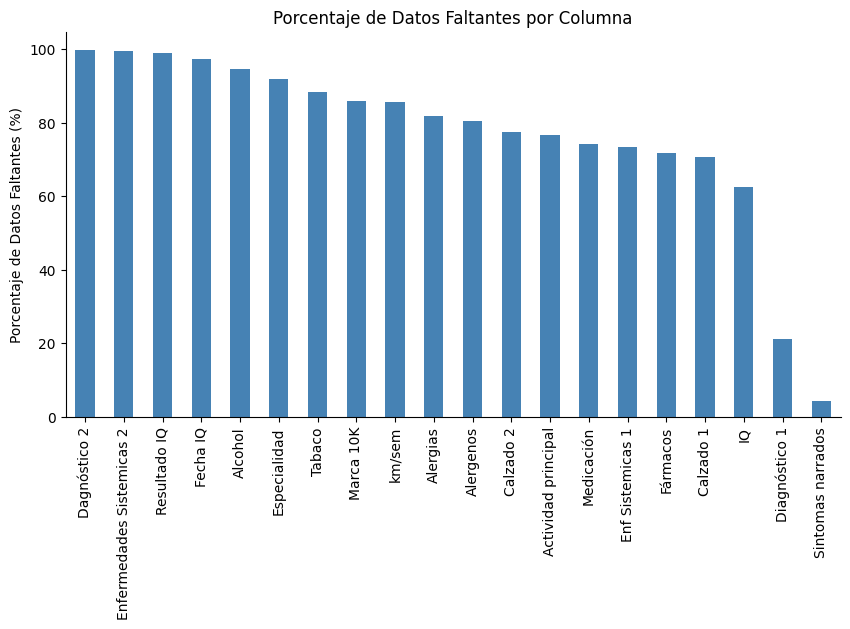

In [80]:
missing_percentage = calculate_missing_percentage(ib_resport_df, ib_resport_df.columns, visualize=True, figsize=(10,5))

In [81]:
#print(df['Enf Sistemicas 1'].unique())
#print(df['Enfermedades Sistemicas 2'].unique())
#print(df['Diagnóstico 1'].unique())
#print(df['Dagnóstico 2'].unique())
#print(df['IQ'].unique())

In [82]:
print(df['Tabaco'].value_counts())
print(df['Alcohol'].value_counts())

Tabaco
Si    92
0     12
Name: count, dtype: int64
Alcohol
Si    39
0      9
Name: count, dtype: int64


In [83]:
#print(df['Actividad principal'].unique())
print(df['Marca 10K'].unique())
print(df['Especialidad'].unique())
print(df['km/sem'].unique())
print(df['Calzado 1'].unique())
print(df['Calzado 2'].unique())

[nan 45 65 33 36 55 50 48 34 53 40 31.21 39 60 57 29 70 39.11 37 34.19 32
 30.27 51 35 56 0 31.4 28 44.5 49 38 35.45 43 44 40.1 47 29.5 33.5 67 42
 54]
[nan 'Media y trail. ' 'amateur' 'amteur ' 'Triatlon' 'Nacional '
 'Europeo' 'Obstáculos' '5k-20k' 'Elite' 'Recreacional' '1500' 'Amateur' 0
 '1500-3000 obs' 'Nacional' '400 y 800' '800/1500' '400-800' '3000/1500'
 'Marcha ' '800-1500' '600/1000' 'TRIATLON' 'Sub40'
 'Trail/larga distancia' 'Velocidad' 'Fondo' 'Ultra' 'Trail /Cross'
 'Triple salto y longitud. Velocidad' 'Trail' '5000 (13:29)'
 'Ultra trail. ' '1500 /elite' 'Salto altura' 'Sprint ' '2ª nacional '
 'Amateur ' 'amateur ' 'Mil y cross' 'nacional' '3+1 ' '2 + 1 ' '400/800'
 'Salto longitud']
[nan '6d/sem' '20 ' '100' '2h/d caminar ' 40 '15-20 ' '15-20' 49 '60-80'
 100 '20-25' '20' '50-60' '40-50' 25 '40' '25' '35-40' '63-90 ' '130-140 '
 '90-120' '50' 30 '70' '30' '90' 15 '30-35' '90-110' 0 '30-40' '80'
 '70-80' '45-50' '150' '30 ' '60' '45' '25-30' '90-100' '60-65' 10 20
 '7

### Conclusiones


El tercer subgrupo de columnas presenta un desafío significativo debido a la **alta incidencia de datos faltantes en la mayoría de las variables**, aunque `Síntomas narrados` y `Diagnóstico 1` han permitido rellenar parcialmente información en columnas clave como 'Articulación', 'Localización' o 'Lado'. 

Sin embargo, estas columnas no serán consideradas en el modelo predictivo actual, que se enfocará en **datos antropométricos y biomecánicos o exploratorios**. Las variables como `Tabaco`, `Alcohol` y `Medicación`, aunque potencialmente relevantes para un análisis de riesgo de lesión, presentan ambigüedad en sus datos faltantes y, por lo tanto, serán omitidas en esta fase.

Es importante mencionar que la **segmentación de la población entre corredores y no corredores no se realizó** adecuadamente, lo cual podría haber permitido análisis más específicos, especialmente en deportistas donde factores como `km/sem` o `calzado` son relevantes. Para futuros estudios, se recomienda mejorar la toma de registros de este subgrupo y establecer un protocolo de limpieza y unificación de categorías que permita un análisis más detallado y confiable.

### 2.6.4. `Grupo 4 - runscribe_walk_df - Datos Biomecánicos de Marcha`

In [84]:
runscribe_walk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0    Pace_walk                          755 non-null    object
 1   Velocidad_walk                      755 non-null    object
 2    Step Rate_walk                     755 non-null    object
 3    Stride Length_walk                 755 non-null    object
 4    Contact Time_walk                  755 non-null    object
 5    Flight Ratio_walk                  755 non-null    object
 6    Power_walk                         755 non-null    object
 7    Shock_walk                         755 non-null    object
 8    Impact Gs_walk                     755 non-null    object
 9    Braking Gs_walk                    755 non-null    object
 10   Footstrike Type_walk               755 non-null    object
 11   Pronation Excursion_walk           755 non-null    object

El conjunto de datos contiene una serie de variables cuantitativas y cualitativas que reflejan diferentes aspectos del movimiento y la biomecánica durante la marcha, capturadas mediante dispositivos RunScribe. Las observaciones clave para cada variable, con base en los datos proporcionados, incluyen:

- **Pace** *(paso)* y **Velocidad**: Ambas variables reflejan la rapidez de la marcha. La coherencia entre ambas sugiere mediciones fiables.
- **Step Rate** *(frecuencia de paso)* y **Stride Length** *(longitud de zancada)*: Indican la eficiencia y el estilo de marcha, valores consistentes pueden reflejar un patrón de marcha estabilizado.
- **Contact Time y Flight Time**: Tiempos que el pie está en contacto con el suelo y en el aire, respectivamente, útiles para analizar la fase de vuelo y contacto del ciclo de la marcha.
- **Power, Shock, Impact Gs, y Braking Gs**: Estas métricas son cruciales para entender la fuerza ejercida y la absorción de choques durante la marcha.
- **Footstrike Type y Pronation Excursion**: Datos importantes para evaluar el tipo de pisada y la pronación, lo que puede influir en el riesgo de lesiones.
- **Vertical y Horizontal GRF Rate**: Tasa de fuerza de reacción del suelo, vertical y horizontal, esencial para estudios de impacto.
- **VO<sub>2</sub> y Total Force Rate**: Estas variables están relacionadas con la eficiencia energética y la carga biomecánica total durante la marcha.
- **Max Pronation Velocity**: Velocidad máxima de pronación, importante para evaluar la dinámica del pie durante la marcha y su posible correlación con el riesgo de lesiones.
- **Peak Vertical GRF (Ground Reaction Force)**: Máxima fuerza de reacción del suelo vertical, crucial para entender el impacto durante el contacto con el suelo.
- **Contact Ratio**: Relación entre el tiempo de contacto y el tiempo total del ciclo de marcha, indicativo de la eficiencia de la marcha.
- **Flight Time**: Tiempo que los pies están en el aire, útil para evaluar la fase de vuelo en la marcha.
- **Stride Angle**: Ángulo de zancada, que puede influir en la eficiencia biomecánica y la velocidad de la marcha.
- **Leg Spring Stiffness**: Rigidez de la "resorte" de la pierna, que refleja la capacidad de la pierna para almacenar y liberar energía durante la marcha.
- **Vertical Spring Stiffness**: Rigidez vertical del resorte, relacionada con la absorción y generación de fuerza durante el contacto con el suelo.
- **Vertical y Horizontal GRF Rate**: Tasas de las fuerzas de reacción del suelo, verticales y horizontales, importantes para el análisis de la dinámica de fuerzas durante el ciclo de la marcha.
- **Swing Force Rate**: Tasa de fuerza durante la fase de balanceo, que puede proporcionar información sobre el control y la estabilidad del movimiento.
- **VO<sub>2</sub> y Total Force Rate**: Eficiencia energética y carga total de fuerza, importantes para la evaluación de la resistencia y la fatiga.
- **Medio Lateral Gs, Braking Gs (Amplitude), Impact Gs (Amplitude)**: Medidas de las fuerzas laterales, de frenado y de impacto, que son críticas para el análisis de estabilidad y choque.
- **Vertical Speed y Elevation Gain**: Velocidad vertical y ganancia de elevación, relevantes en terrenos variados y para la técnica de ascenso y descenso.
- **Yaw y Swing Excursion**: Excursiones de guinada y balanceo, útiles para evaluar la rotación y el movimiento lateral del cuerpo.
- **Max Stance Velocity (FS->MP, MP->TO)**: Velocidad máxima durante la fase de apoyo, importante para entender la rapidez y la estabilidad durante diferentes fases de la marcha.
- **Step Length y Pronation/Stance Excursion**: Longitud de paso y excursiones de pronación y apoyo, indicativos de la técnica y biomecánica de la marcha.
- **Min/Max Tilt, Obliquity, Rotation**: Mínimas y máximas inclinaciones, oblicuidades y rotaciones, importantes para analizar la postura y el equilibrio.
- **Max Tilt/Obliquity/Rotation Rate**: Tasas máximas de inclinación, oblicuidad y rotación, útiles para evaluar la estabilidad dinámica.
- **Vertical Oscillation**: Oscilación vertical, que puede indicar eficiencia de la marcha y técnica de carrera.

In [85]:
runscribe_walk_df.head()

0  Pace_walk Velocidad_walk  Step Rate_walk  Stride Length_walk  \
0     1.2916              5      108.456898              1.4267   
1   1.370079              5      114.767847              1.4312   
2   1.371909              5      100.149777              1.6437   
3   1.318286              5      103.976334              1.5381   
4   1.362836              5        99.06266              1.6541   

0  Contact Time_walk  Flight Ratio_walk  Power_walk  Shock_walk  \
0         705.166667                  0   95.981481    3.566339   
1         649.517241                  0  136.534483    3.119538   
2         775.744681                  0  100.787234    2.368494   
3             733.48                  0      101.42    2.667928   
4             812.64                  0      124.38    3.610964   

0  Impact Gs_walk  Braking Gs_walk  Footstrike Type_walk  \
0        2.310324         2.610172              6.314815   
1        1.900867         2.387259              6.948276   
2        1.597828         1.558757             10.680851   
3        1.708754         1.985392                 11.18   
4        2.665554           2.3693                   7.9   

0  Pronation Excursion_walk  Max Pronation Velocity_walk  \
0                -11.106498                   177.510574   
1                 -8.176466                   109.542317   
2                 -4.411249                   144.662411   
3                 -4.351264                   123.764646   
4                -10.180634                   271.162108   

0  Peak Vertical GRF_walk  Contact Ratio_walk  Flight Time_walk  \
0                1.139044           127.44998       -152.018519   
1                1.222143          124.224798       -126.896552   
2                1.091726          129.442638       -176.595745   
3                1.149516          127.091716           -156.42   
4                0.981864          134.149908            -206.9   

0  Stride Angle_walk  Leg Spring Stiffness_walk  \
0           9.059576                   0.453526   
1           6.403624                  48.715603   
2          10.637696                   7.981094   
3           8.991884                 598.235028   
4          14.254498                          0   

0  Vertical Spring Stiffness_walk  Vertical GRF Rate_walk  \
0                               0               13.915741   
1                               0               15.115353   
2                               0               12.657472   
3                               0               13.385676   
4                               0                12.07416   

0  Horizontal GRF Rate_walk  Swing Force Rate_walk  VO<sub>2</sub>_walk  \
0                  2.530533               0.030474             6.644113   
1                  2.673316               0.159367             8.925714   
2                  2.785581                0.29757             9.790736   
3                  2.615824               0.145732             7.967042   
4                  2.799688               0.352276            10.241722   

0  Total Force Rate_walk  Time (Max Swing->FS)_walk  Time (FS->MPV)_walk  \
0               24.95212                  192.62963            19.203704   
1              30.589598                 121.245614             42.37931   
2              32.726926                 106.680851             5.255319   
3               28.22087                     148.78                15.72   
4              33.841236                       94.1                26.14   

0  Time (MPV->MP)_walk  Time (MP->TO)_walk  Time (Min Swing->Max Swing)_walk  \
0            83.351852          602.611111                        360.574074   
1             78.62069          528.517241                        339.724138   
2            37.106383          733.382979                        370.574468   
3                31.96               685.8                            358.94   
4                37.64              748.86                            353.04   

0  Tim

Porcentaje de datos faltantes por columna:
 Medio Lateral Gs2_walk: 40.25%
 Vertical Oscillation_walk: 27.31%
 Max Rotation Rate_walk: 27.31%
 Max Obliquity Rate_walk: 27.31%
 Max Tilt Rate_walk: 27.31%
 Max Rotation_walk: 27.31%
 Min Rotation_walk: 27.31%
 Max Obliquity_walk: 27.31%
 Min Obliquity_walk: 27.31%
 Max Tilt_walk: 27.31%
 Min Tilt_walk: 27.31%
 Elevation Gain_walk: 19.96%
 Horizontal GRF Rate_walk: 16.50%
 Total Force Rate_walk: 16.50%
 VO<sub>2</sub>_walk: 16.50%
 Swing Force Rate_walk: 16.50%
 Impact Gs (Amplitude)_walk: 15.94%
 Braking Gs (Amplitude)_walk: 15.94%
 Step Length_walk: 15.83%
 Max Stance Velocity (MP->TO)_walk: 15.83%
 Max Stance Velocity (FS->MP)_walk: 15.83%
 Pronation Excursion (MP->TO)_walk: 15.83%
 Stance Excursion (MP->TO)_walk: 15.83%
 Braking Gs2_walk: 15.83%
 Yaw Excursion (Swing)_walk: 15.83%
 Yaw Excursion (MP->TO)_walk: 15.83%
 Swing Excursion_walk: 15.83%
 Yaw Excursion_walk: 15.83%
 Impact Gs2_walk: 15.83%
 Vertical Speed_walk: 15.83%
 Stance 

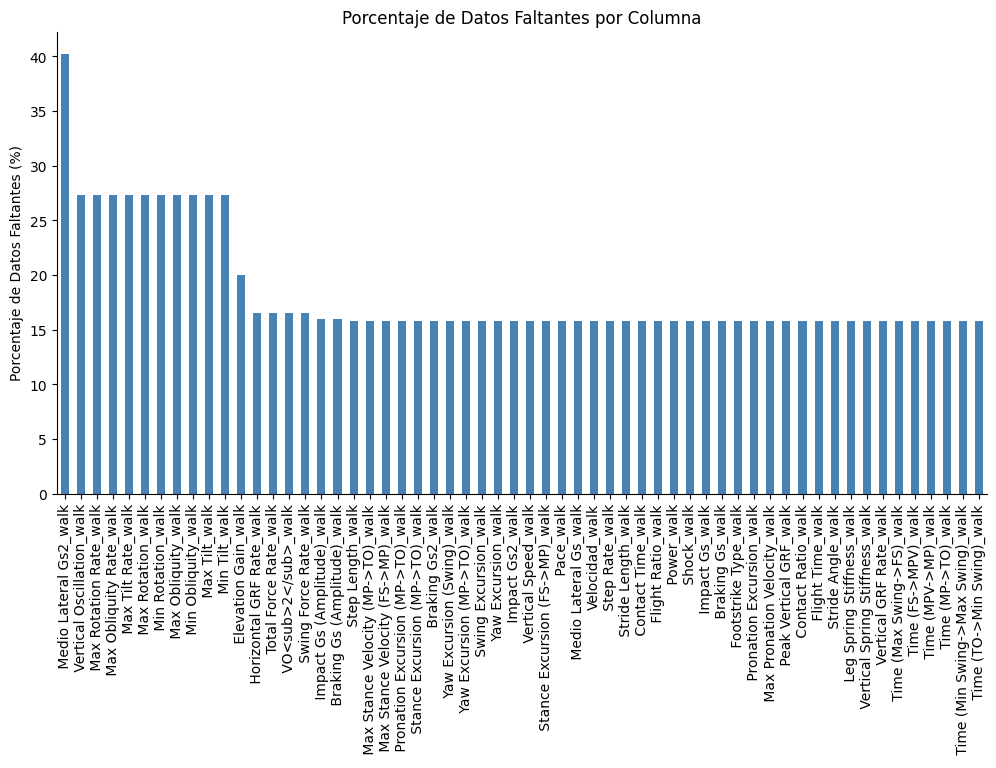

In [86]:
missing_percentage = calculate_missing_percentage(runscribe_walk_df, runscribe_walk_df.columns, visualize=True, figsize=(12,6))

### Eliminar espacios en los nombres de las columnas y convertir a valores numéricos

In [87]:
runscribe_columns = [col.strip() for col in runscribe_walk_df.columns]
df.columns = df.columns.str.strip()

# Convertir columnas a numérico
for column in runscribe_columns:
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

### Agrupar Columnas por el número de Valores Faltantes

In [88]:
missing_values = df[runscribe_columns].isna().sum()

more_than_200 = missing_values[missing_values > 200]
between_150_and_200 = missing_values[(missing_values > 150) & (missing_values <= 200)]
between_100_and_150 = missing_values[(missing_values > 100) & (missing_values <= 150)]
less_than_100 = missing_values[missing_values < 100]

- El **promedio de la tasa de paso (`Step Rate`)** es de aproximadamente **111 pasos por minuto** con una **longitud de paso (`Stride Length`) promedio de 1.56 metros**, lo que indica una tendencia hacia un paso más frecuente y más corto en la muestra analizada.
- La mayoría de los participantes muestran **tiempos de contacto (`Contact Time`) y tiempos de vuelo (`Flight Time`) en rangos consistentes**, sugiriendo similitudes en la mecánica de marcha.
- Las **fuerzas de impacto (`Impact Gs`) y frenado (`Braking Gs`)** presentan una amplia **variabilidad**, lo que podría indicar diferencias significativas en el estilo de marcha, posiblemente relacionadas con el riesgo de lesión o la eficiencia de la marcha.

In [89]:
print(more_than_200.index.tolist())

['Min Tilt_walk', 'Max Tilt_walk', 'Min Obliquity_walk', 'Max Obliquity_walk', 'Min Rotation_walk', 'Max Rotation_walk', 'Max Tilt Rate_walk', 'Max Obliquity Rate_walk', 'Max Rotation Rate_walk', 'Vertical Oscillation_walk', 'Medio Lateral Gs2_walk']


In [90]:
print(between_150_and_200.index.tolist())

['Elevation Gain_walk']


In [91]:
print(between_100_and_150.index.tolist())

['Pace_walk', 'Velocidad_walk', 'Step Rate_walk', 'Stride Length_walk', 'Contact Time_walk', 'Flight Ratio_walk', 'Power_walk', 'Shock_walk', 'Impact Gs_walk', 'Braking Gs_walk', 'Footstrike Type_walk', 'Pronation Excursion_walk', 'Max Pronation Velocity_walk', 'Peak Vertical GRF_walk', 'Contact Ratio_walk', 'Flight Time_walk', 'Stride Angle_walk', 'Leg Spring Stiffness_walk', 'Vertical Spring Stiffness_walk', 'Vertical GRF Rate_walk', 'Horizontal GRF Rate_walk', 'Swing Force Rate_walk', 'VO<sub>2</sub>_walk', 'Total Force Rate_walk', 'Time (Max Swing->FS)_walk', 'Time (FS->MPV)_walk', 'Time (MPV->MP)_walk', 'Time (MP->TO)_walk', 'Time (Min Swing->Max Swing)_walk', 'Time (TO->Min Swing)_walk', 'Medio Lateral Gs_walk', 'Braking Gs (Amplitude)_walk', 'Impact Gs (Amplitude)_walk', 'Vertical Speed_walk', 'Yaw Excursion_walk', 'Swing Excursion_walk', 'Yaw Excursion (MP->TO)_walk', 'Yaw Excursion (Swing)_walk', 'Max Stance Velocity (FS->MP)_walk', 'Max Stance Velocity (MP->TO)_walk', 'Step L

In [92]:
print(less_than_100.index.tolist())

[]


In [93]:
# Cuántas filas se eliminarían si se quitan las que tienen al menos un NaN
rows_with_nan = runscribe_walk_df.isna().any(axis=1).sum()

print(f"Total de filas que se eliminarían con dropna(): {rows_with_nan}")
print(f"Porcentaje de datos que se perderían: {100 * rows_with_nan / len(runscribe_walk_df):.2f}%")

Total de filas que se eliminarían con dropna(): 390
Porcentaje de datos que se perderían: 43.48%


### Correlación entre variables

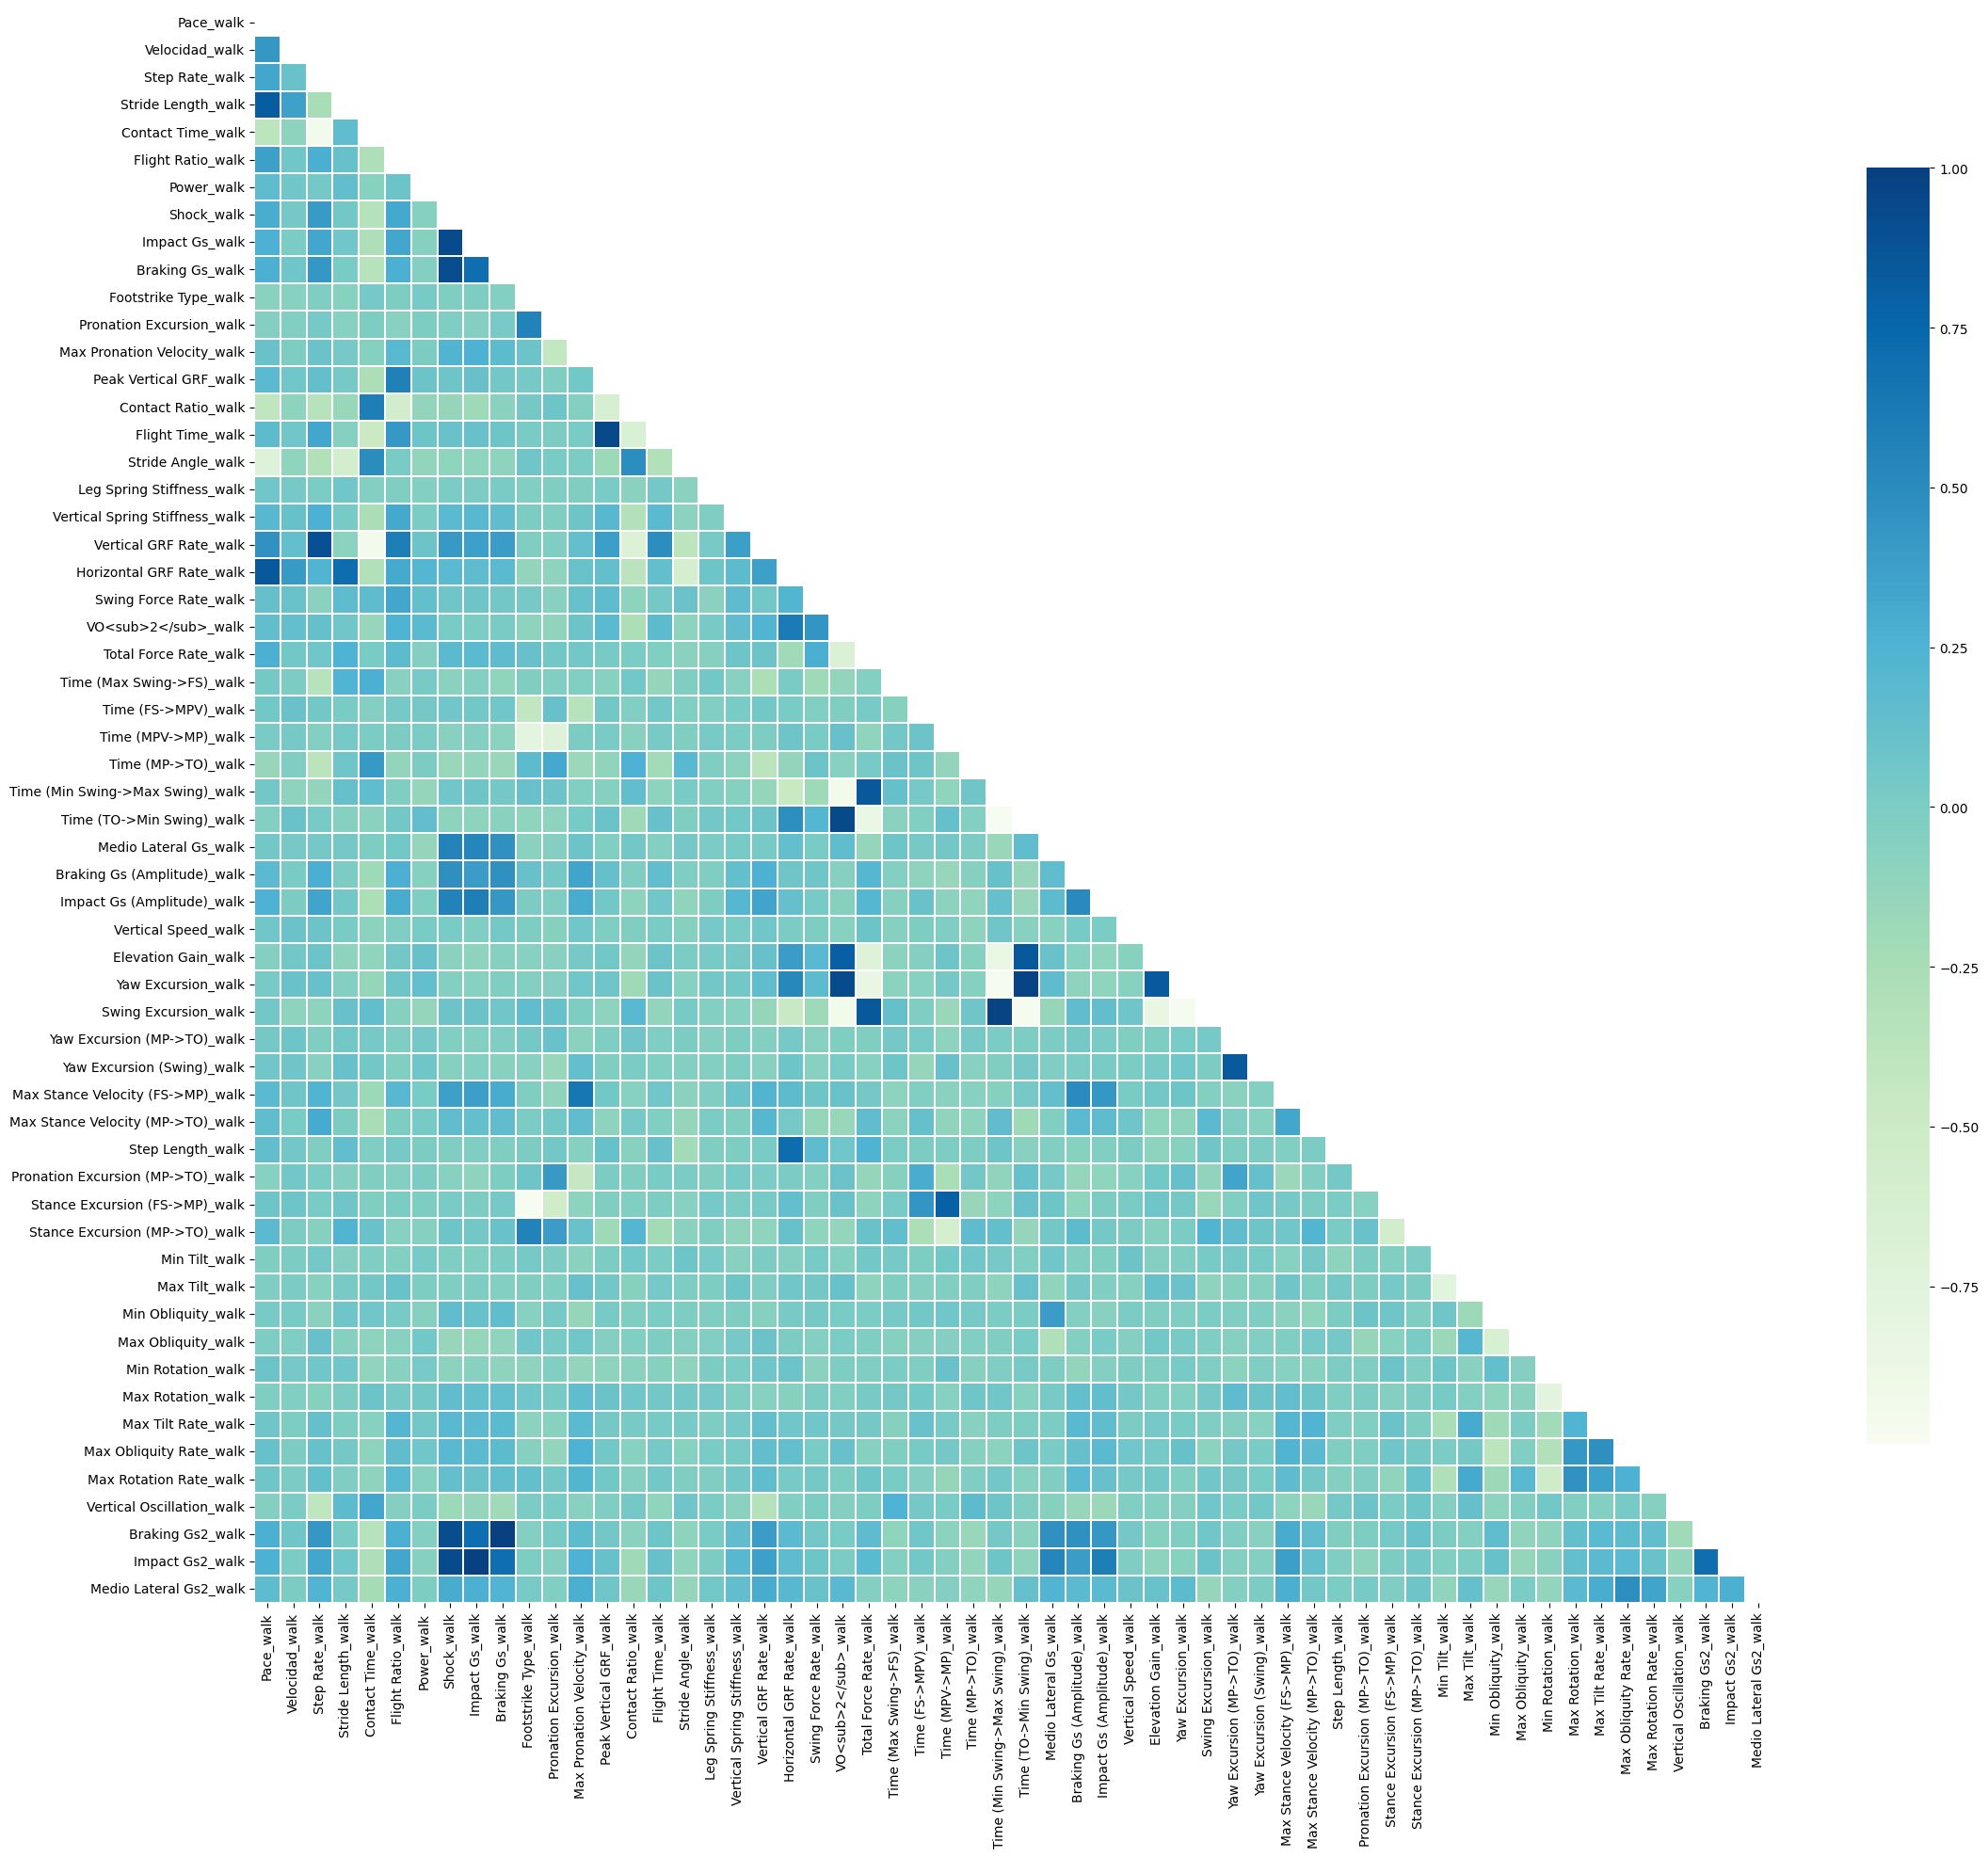

In [94]:
corr_matrix = df[runscribe_columns].corr()
plot_heatmap(corr_matrix=corr_matrix, figsize=(26, 22), cmap='GnBu', title='', annot=False)

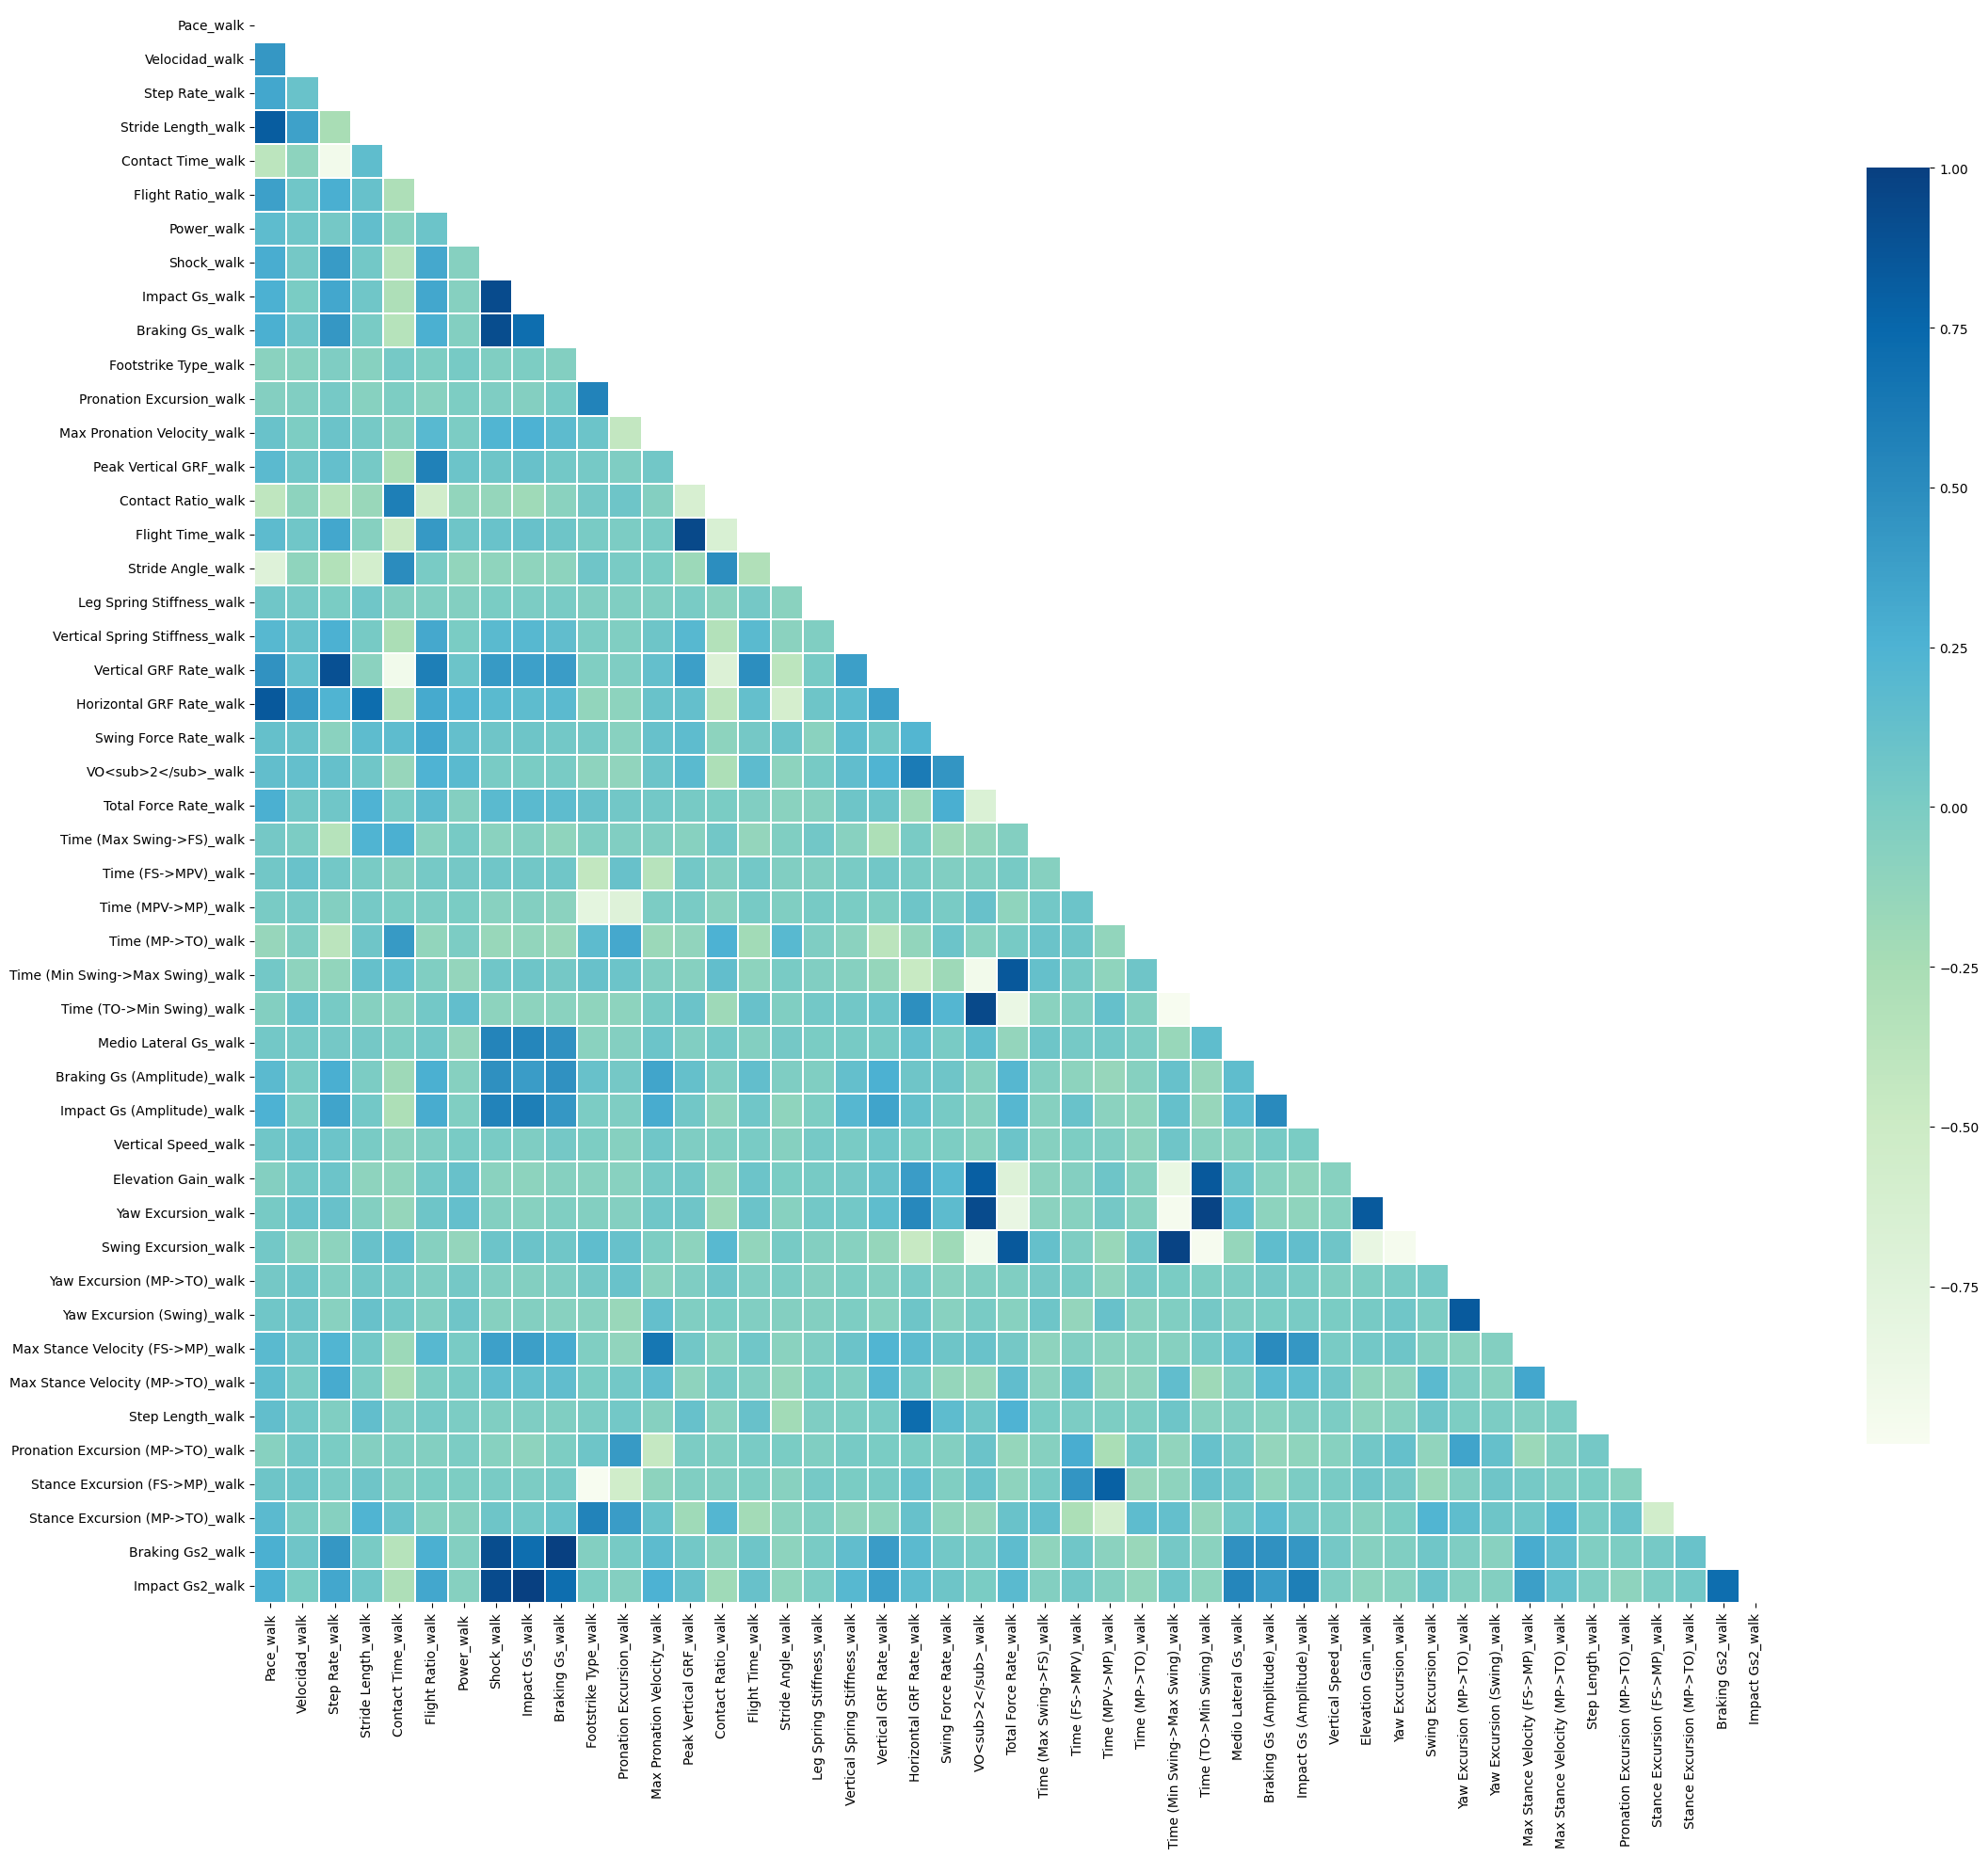

In [95]:
# Visualizamos solo las columnas con menos de 200 valores faltantes
missing_values = df[runscribe_columns].isna().sum()
less_than_200_missing = missing_values[missing_values < 200]
columns_less_than_200 = less_than_200_missing.index.tolist()
corr_matrix = df[columns_less_than_200].corr()
plot_heatmap(corr_matrix=corr_matrix, figsize=(26, 22), cmap='GnBu', title='', annot=False)

- La matriz de correlación muestra patrones de asociación significativos entre variables. Por ejemplo, `Pace_walk` y `Stride Length_walk` están **altamente correlacionadas**, lo que indica que la **longitud de zancada es un factor determinante del ritmo de marcha**.

- Sin embargo, existen variables con **correlaciones negativas** como `Step Rate_walk` y `Contact Time_walk`, sugiriendo que a **mayor cadencia**, el **tiempo de contacto con el suelo es menor**.

- Para un análisis de lesiones en la marcha, variables como `Pace_walk`, `Step Rate_walk`, y `Contact Time_walk` pueden ser relevantes, ya que ofrecen información directa sobre la **eficiencia y estilo de marcha**, lo cual puede influir en el riesgo de lesión.

- `Impact Gs_walk` y `Braking Gs_walk` también son críticos, dado que representan las fuerzas que actúan sobre el cuerpo y que pueden relacionarse con el desarrollo de lesiones por sobreuso.

In [96]:
# Seleccionamos posibles variables de interés
columns_selected = ['Pace_walk', 'Velocidad_walk', 'Step Rate_walk', 'Stride Length_walk', 'Contact Time_walk', 'Flight Time_walk', 'Power_walk', 'Shock_walk', 'Impact Gs_walk', 'Braking Gs_walk', 'Footstrike Type_walk', 'Max Pronation Velocity_walk', 'Total Force Rate_walk']
df[columns_selected].describe()

0       Pace_walk  Velocidad_walk  Step Rate_walk  Stride Length_walk  \
count  755.000000      755.000000      755.000000          755.000000   
mean     1.348776        4.973245      111.432976            1.455166   
std      0.155352        0.276103        7.409574            0.163897   
min      0.083356        2.000000       85.079444            0.080300   
25%      1.360833        5.000000      107.177189            1.406050   
50%      1.370596        5.000000      110.897415            1.473000   
75%      1.379297        5.000000      114.977203            1.533000   
max      2.793561        8.000000      165.522552            2.325800   

0      Contact Time_walk  Flight Time_walk  Power_walk  Shock_walk  \
count         755.000000        755.000000  755.000000  755.000000   
mean          687.272264       -144.547469  125.350629    2.328895   
std            52.610788         35.850017   74.884312    0.879755   
min           298.187500       -273.675000    0.000000    0.749673   
25%           660.163693       -158.489641   85.603231    1.746109   
50%           686.222222       -147.215116  111.017857    2.096426   
75%           714.692194       -133.720247  145.863942    2.665595   
max           938.800000        506.486486  746.627451    8.328855   

0      Impact Gs_walk  Braking Gs_walk  Footstrike Type_walk  \
count      755.000000       755.000000            755.000000   
mean         1.552843         1.641329              8.265321   
std          0.667430         0.651110              2.592603   
min          0.445394         0.586561              1.250000   
25%          1.132492         1.209095              6.138736   
50%          1.366569         1.509082              8.537037   
75%          1.812780         1.887925             10.334987   
max          6.403026         5.236189             15.403509   

0      Max Pronation Velocity_walk  Total Force Rate_walk  
count                   755.000000             749.000000  
mean                    164.955578              22.033040  
std                      73.611686               7.946033  
min                       0.000000               5.951576  
25%                     117.562723              14.861188  
50%                     153.635847              20.207560  
75%                     199.379041              27.909278  
max                     738.698327              70.653675

El análisis estadístico revela una consistencia en las mediciones de la marcha, con la mayoría de las variables presentando una desviación estándar relativamente baja en comparación con la media, lo cual sugiere una **homogeneidad en el comportamiento de la marcha** entre los participantes.

La **correlación alta** entre `Pace_walk` y `Stride Length_walk` indica que estas medidas están intrínsecamente vinculadas y podrían utilizarse indistintamente o una sobre la otra para simplificar el modelo. Sin embargo, la presencia de **valores atípicos**, especialmente en variables como `Power_walk` y `Flight Time_walk`, requiere una investigación adicional para garantizar la calidad del dato.

Las métricas que presentan una alta variabilidad, como `Power_walk` y `Max Pronation Velocity_walk`, pueden reflejar diferencias individuales significativas o errores de medición. Los valores negativos en `Flight Time_walk` deben ser interpretados con precaución.

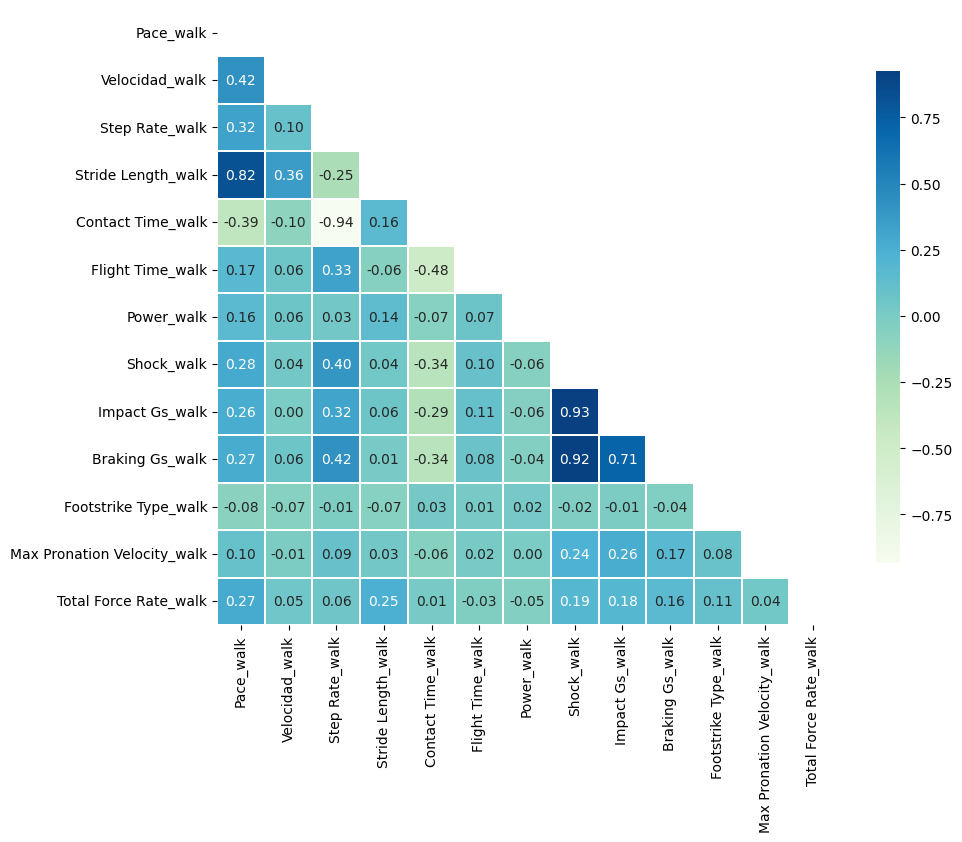

In [97]:
corr_matrix = df[columns_selected].corr()
plot_heatmap(corr_matrix=corr_matrix, figsize=(10, 8), cmap='GnBu', title='', annot=True)

La matriz de correlación actualizada con valores numéricos resalta la **fuerte correlación positiva** entre `Pace_walk` y `Stride Length_walk` **(0.82)**, lo que indica que un **ritmo más rápido** está estrechamente ligado a **pasos más largos**. Las **correlaciones altas** entre `Impact Gs_walk`, `Shock_walk` y `Braking Gs_walk` (**0.93 y 0.92** respectivamente con `Impact Gs_walk` y **0.71** entre sí) sugieren que estas medidas de fuerza y choque durante la marcha están muy relacionadas; **a mayor impacto y choque** experimentado durante la marcha, **hay también una mayor fuerza de frenado**. Esto podría ser relevante en la comprensión de cómo las fuerzas externas son absorbidas y gestionadas por el cuerpo durante la marcha, lo cual es crucial para evaluar el riesgo de lesiones.

La **correlación negativa fuerte** entre `Step Rate_walk` y `Contact Time_walk` **(-0.94)** confirma que los **pasos más rápidos conllevan a un tiempo de contacto con el suelo más breve**, lo que puede afectar la eficiencia de la marcha y la estabilidad. Estos resultados destacan la importancia de considerar cómo las interacciones entre diferentes aspectos de la marcha pueden influir en la biomecánica general y los posibles riesgos asociados.

### Visualización con Histogramas

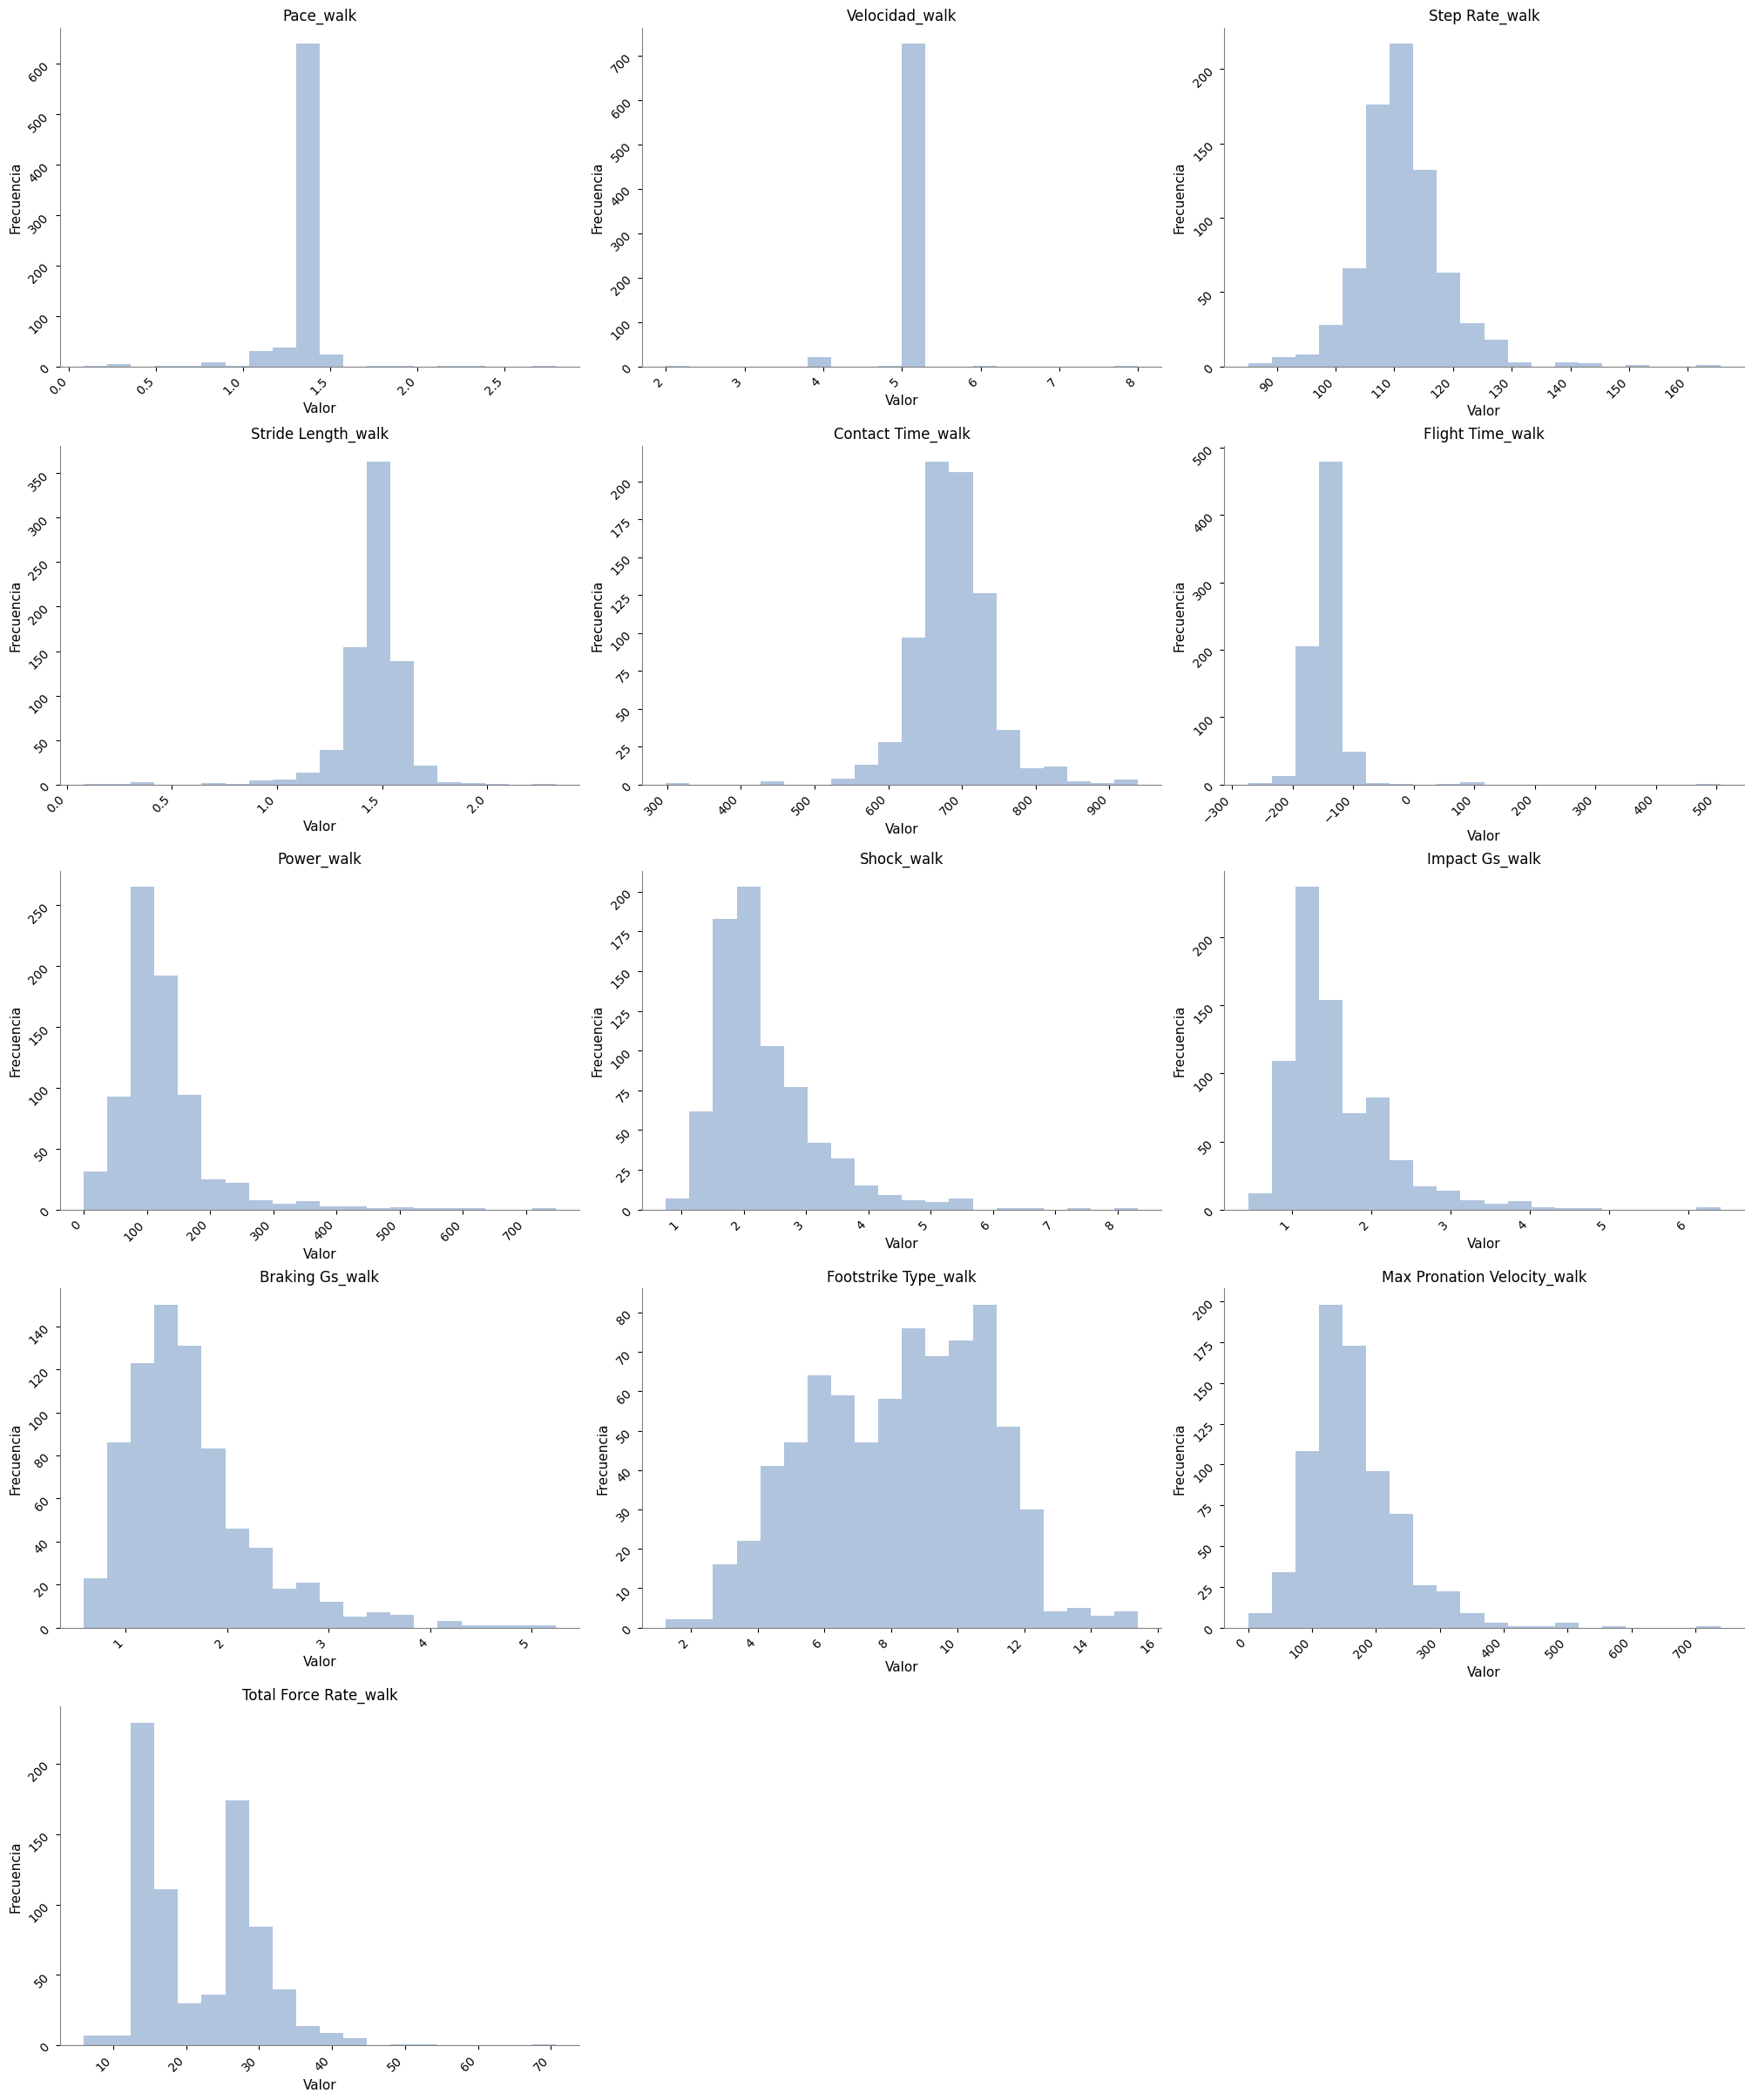

In [98]:
plot_data_histogram(df[columns_selected], 20, (20, 24), column_wrap=3)

Las gráficas de histograma muestran la distribución de cada variable relacionada con la marcha. Observamos que la mayoría de las variables como `Pace_walk`, `Velocidad_walk`, `Step Rate_walk` y `Stride Length_walk` tienen distribuciones sesgadas, lo que sugiere **concentraciones en ciertos rangos de valores y la presencia de valores atípicos**, posiblemente debido a diferencias individuales en el estilo de marcha o errores de medición.

Por ejemplo, la concentración alrededor de valores bajos en `Pace_walk` y `Stride Length_walk` indica un **ritmo generalmente lento con pasos más cortos** en la muestra, mientras que los valores atípicos en el extremo superior podrían representar casos individuales de marcha rápida o errores de medición.

La variable `Contact Time_walk` muestra una distribución aproximadamente **simétrica centrada** en un tiempo medio de contacto, lo que sugiere una consistencia en esta métrica entre los sujetos.

Las variables `Power_walk`, `Shock_walk`, `Impact Gs_walk`, `Braking Gs_walk`, y `Total Force Rate_walk` tienen distribuciones con un **sesgo hacia valores más bajos**, implicando una tendencia hacia menores fuerzas de impacto y choque durante la marcha en la muestra estudiada.

La interpretación de estos resultados puede ofrecer insights sobre la eficiencia y las características de riesgo de la marcha, que podrían ser cruciales para desarrollar intervenciones preventivas o terapéuticas en poblaciones específicas.

### Análisis por Género

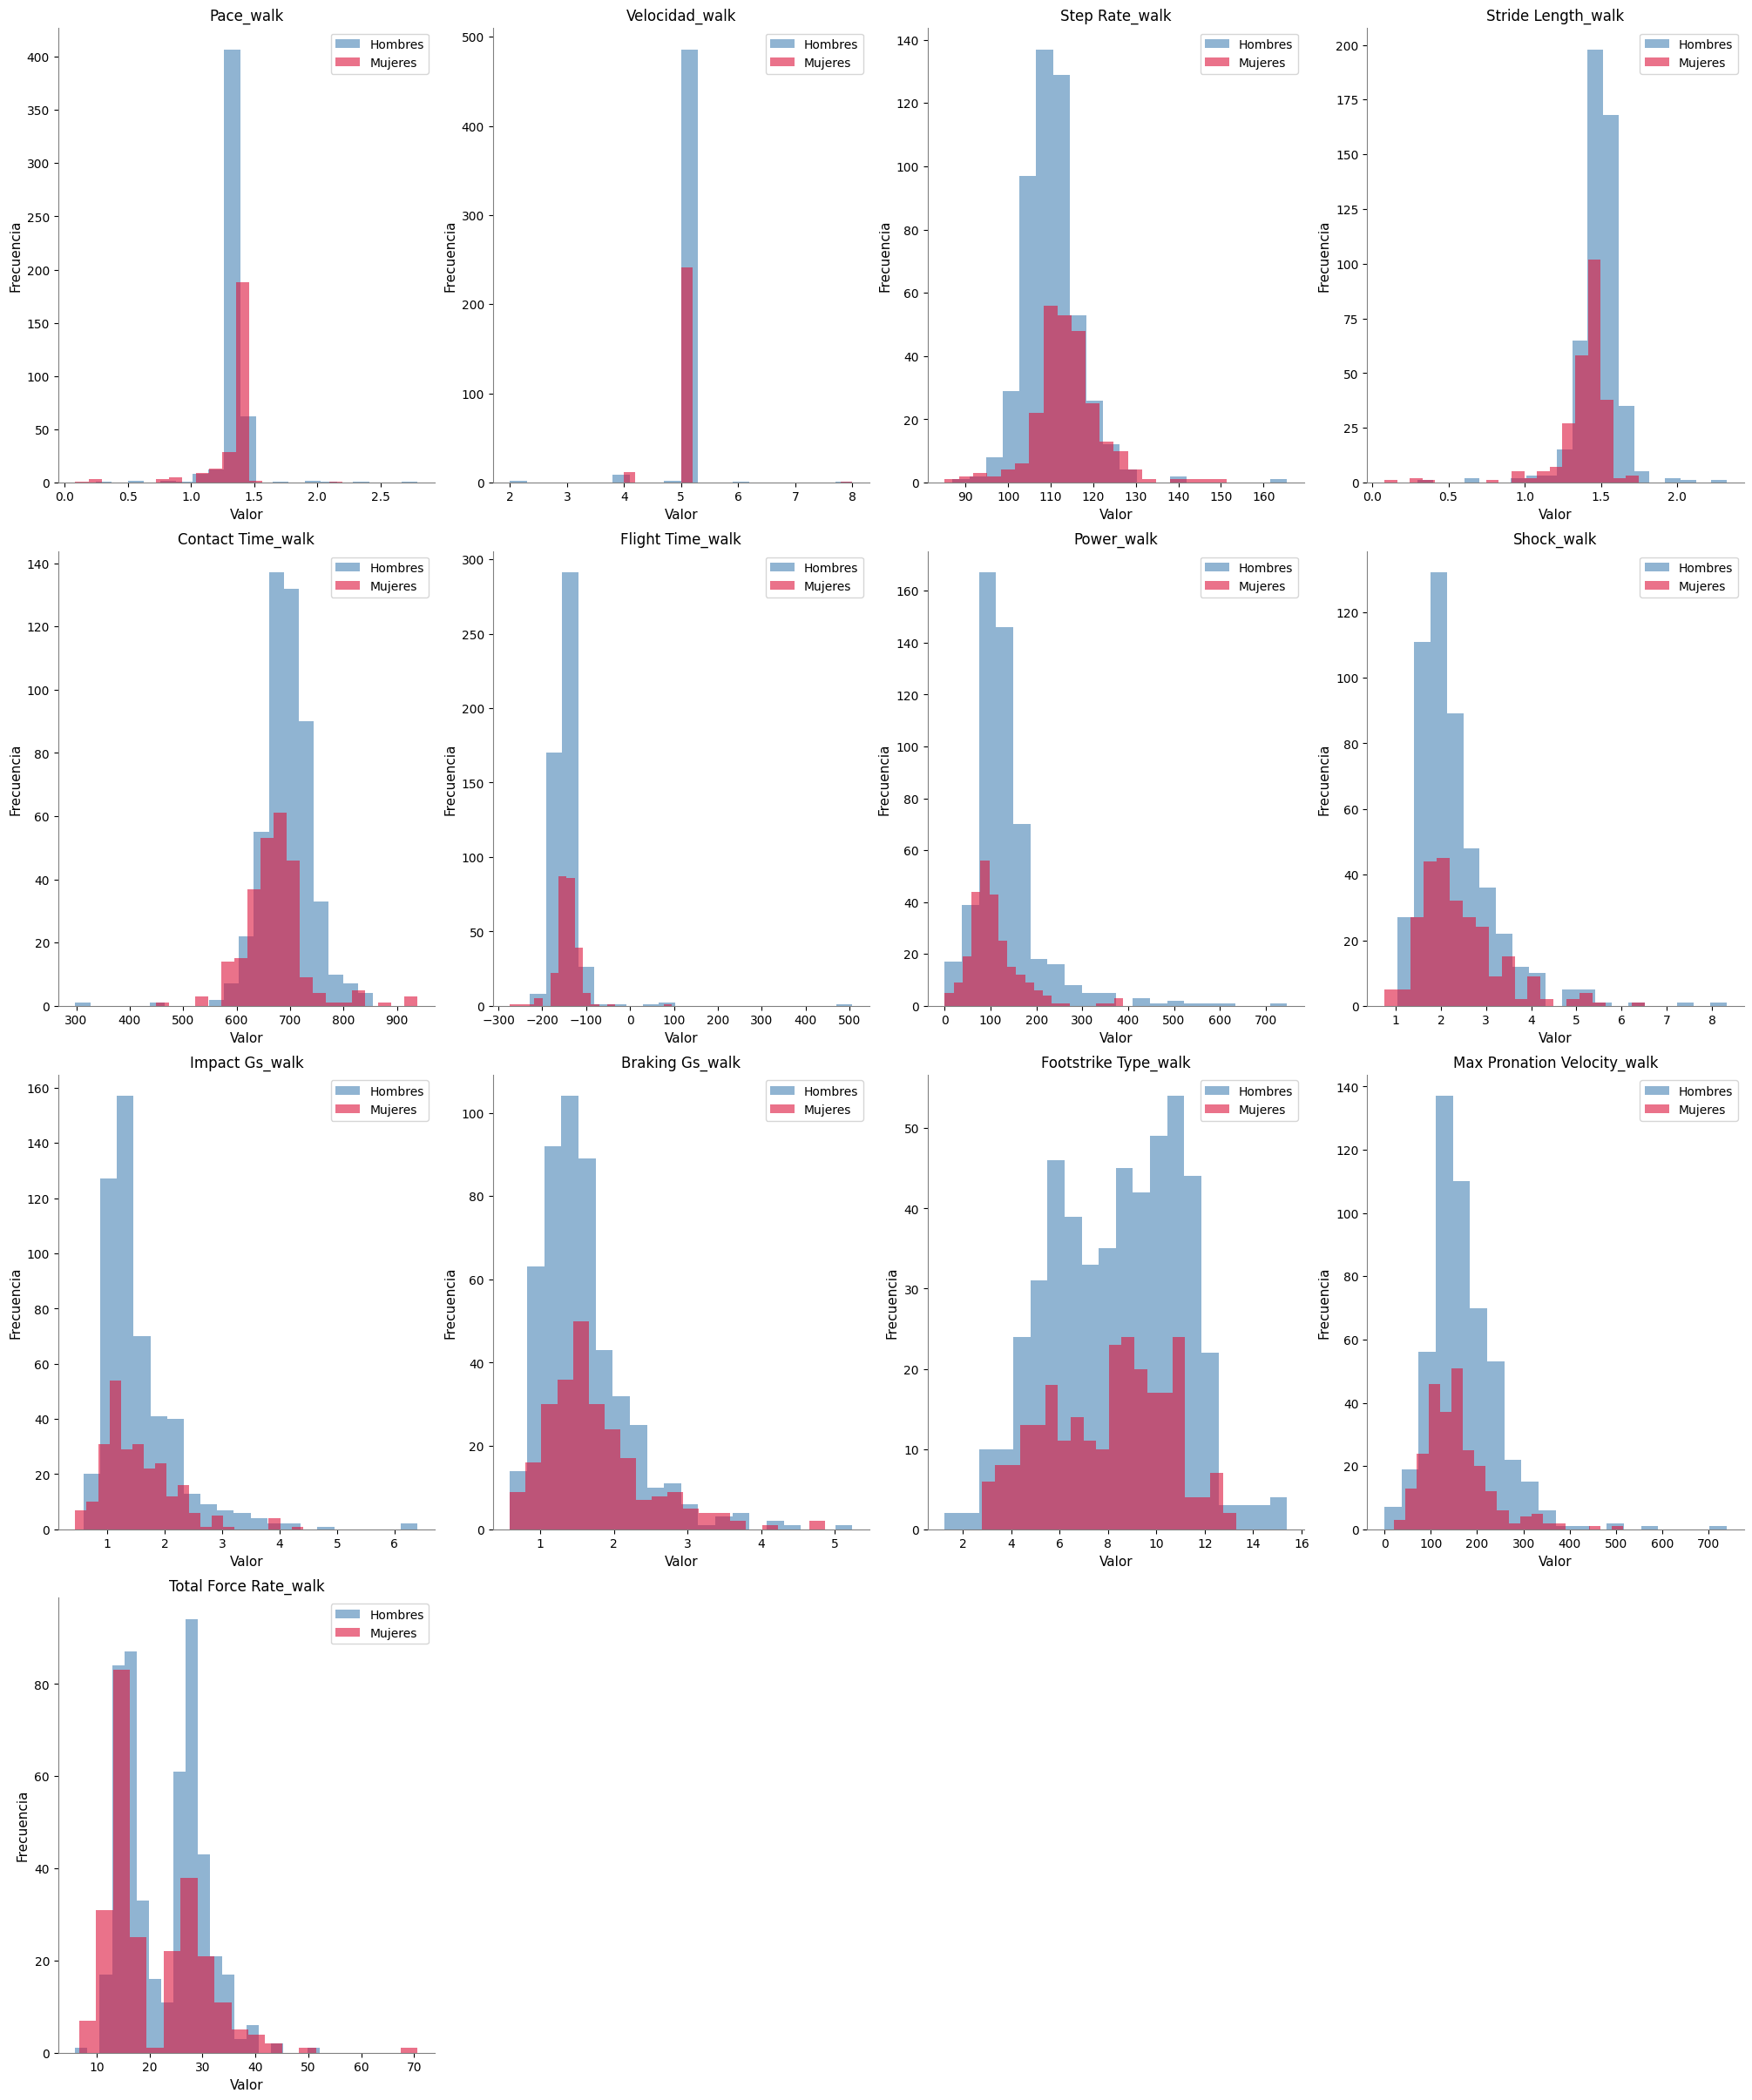

In [99]:
columns_selected_with_gender = columns_selected + ['Sexo']
plot_gender_histogram(df[columns_selected_with_gender])

El análisis de los **histogramas segmentados por sexo** para los parámetros de la marcha sugiere que, si bien existen **diferencias en las frecuencias entre hombres y mujeres**, estas podrían estar influenciadas por una mayor representación de hombres en el estudio. La distribución de las métricas como `Pace_walk`, `Velocidad_walk`, `Step Rate_walk`, y `Stride Length_walk` no muestran variaciones significativas entre sexos que indiquen diferencias en los patrones de marcha, sino que las diferencias observadas en las frecuencias pueden ser un reflejo de la composición del grupo estudiado. Por lo tanto, cualquier interpretación de las diferencias en la marcha debe considerar la proporción de hombres y mujeres en la muestra para evitar sesgos.

### Distribución - Detección de Outliers

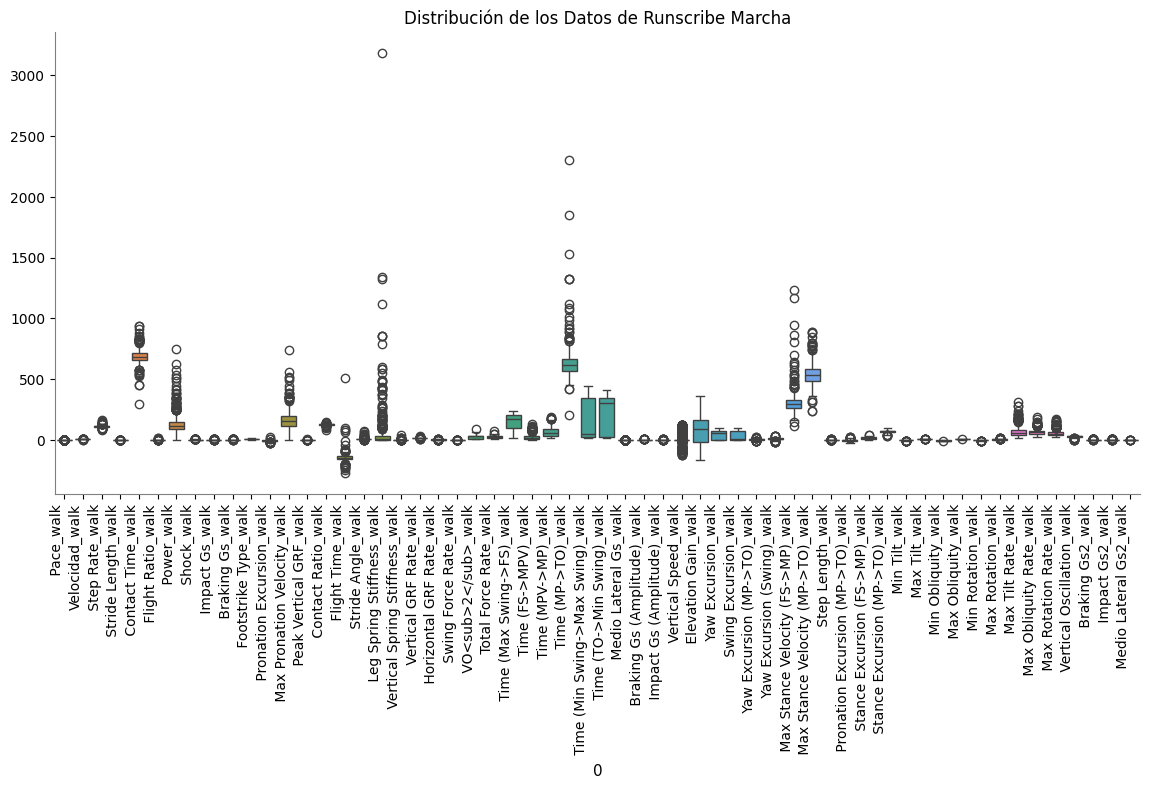

In [100]:
plot_boxplot(runscribe_walk_df, title="Distribución de los Datos de Runscribe Marcha")

El gráfico de caja (boxplot) muestra la distribución de diversas métricas biomecánicas relacionadas con la marcha recopiladas por RunScribe. Características y patrones observados en los datos:

- **Variabilidad y Outliers**: Existen varias métricas con valores atípicos (outliers) representados por puntos individuales fuera de los bigotes de las cajas. Estos outliers indican variabilidad significativa en los datos y pueden señalar sujetos con características biomecánicas inusuales o errores de medición.

-  **Distribución Central**: Para muchas de las métricas, la mediana se encuentra cerca del centro de la caja (distribución aproximadamente simétrica para esos datos). Otras, sin emabrgo, tienen distribuciones sesgadas, con la mediana desplazada hacia uno de los extremos de la caja. Esto puede ser indicativo de una tendencia en los datos hacia valores más altos o más bajos.

- **Dispersión y Rango Intercuartil**: La longitud de las cajas (rango intercuartil, IQR) varía significativamente entre las diferentes métricas, indicando la variabilidad en la dispersión de los datos.

- **Valores Extremos**: Algunas métricas tienen valores extremadamente altos, lo que podría estar relacionado con errores de medición, condiciones específicas de los participantes, o diferencias biomecánicas significativas.

- **Simetría y Asimetría**:
   - Las cajas y los bigotes simétricos alrededor de la mediana indican distribuciones equilibradas.
   - Las cajas asimétricas y los bigotes de diferentes longitudes pueden indicar distribuciones sesgadas, donde los datos tienden hacia un extremo.

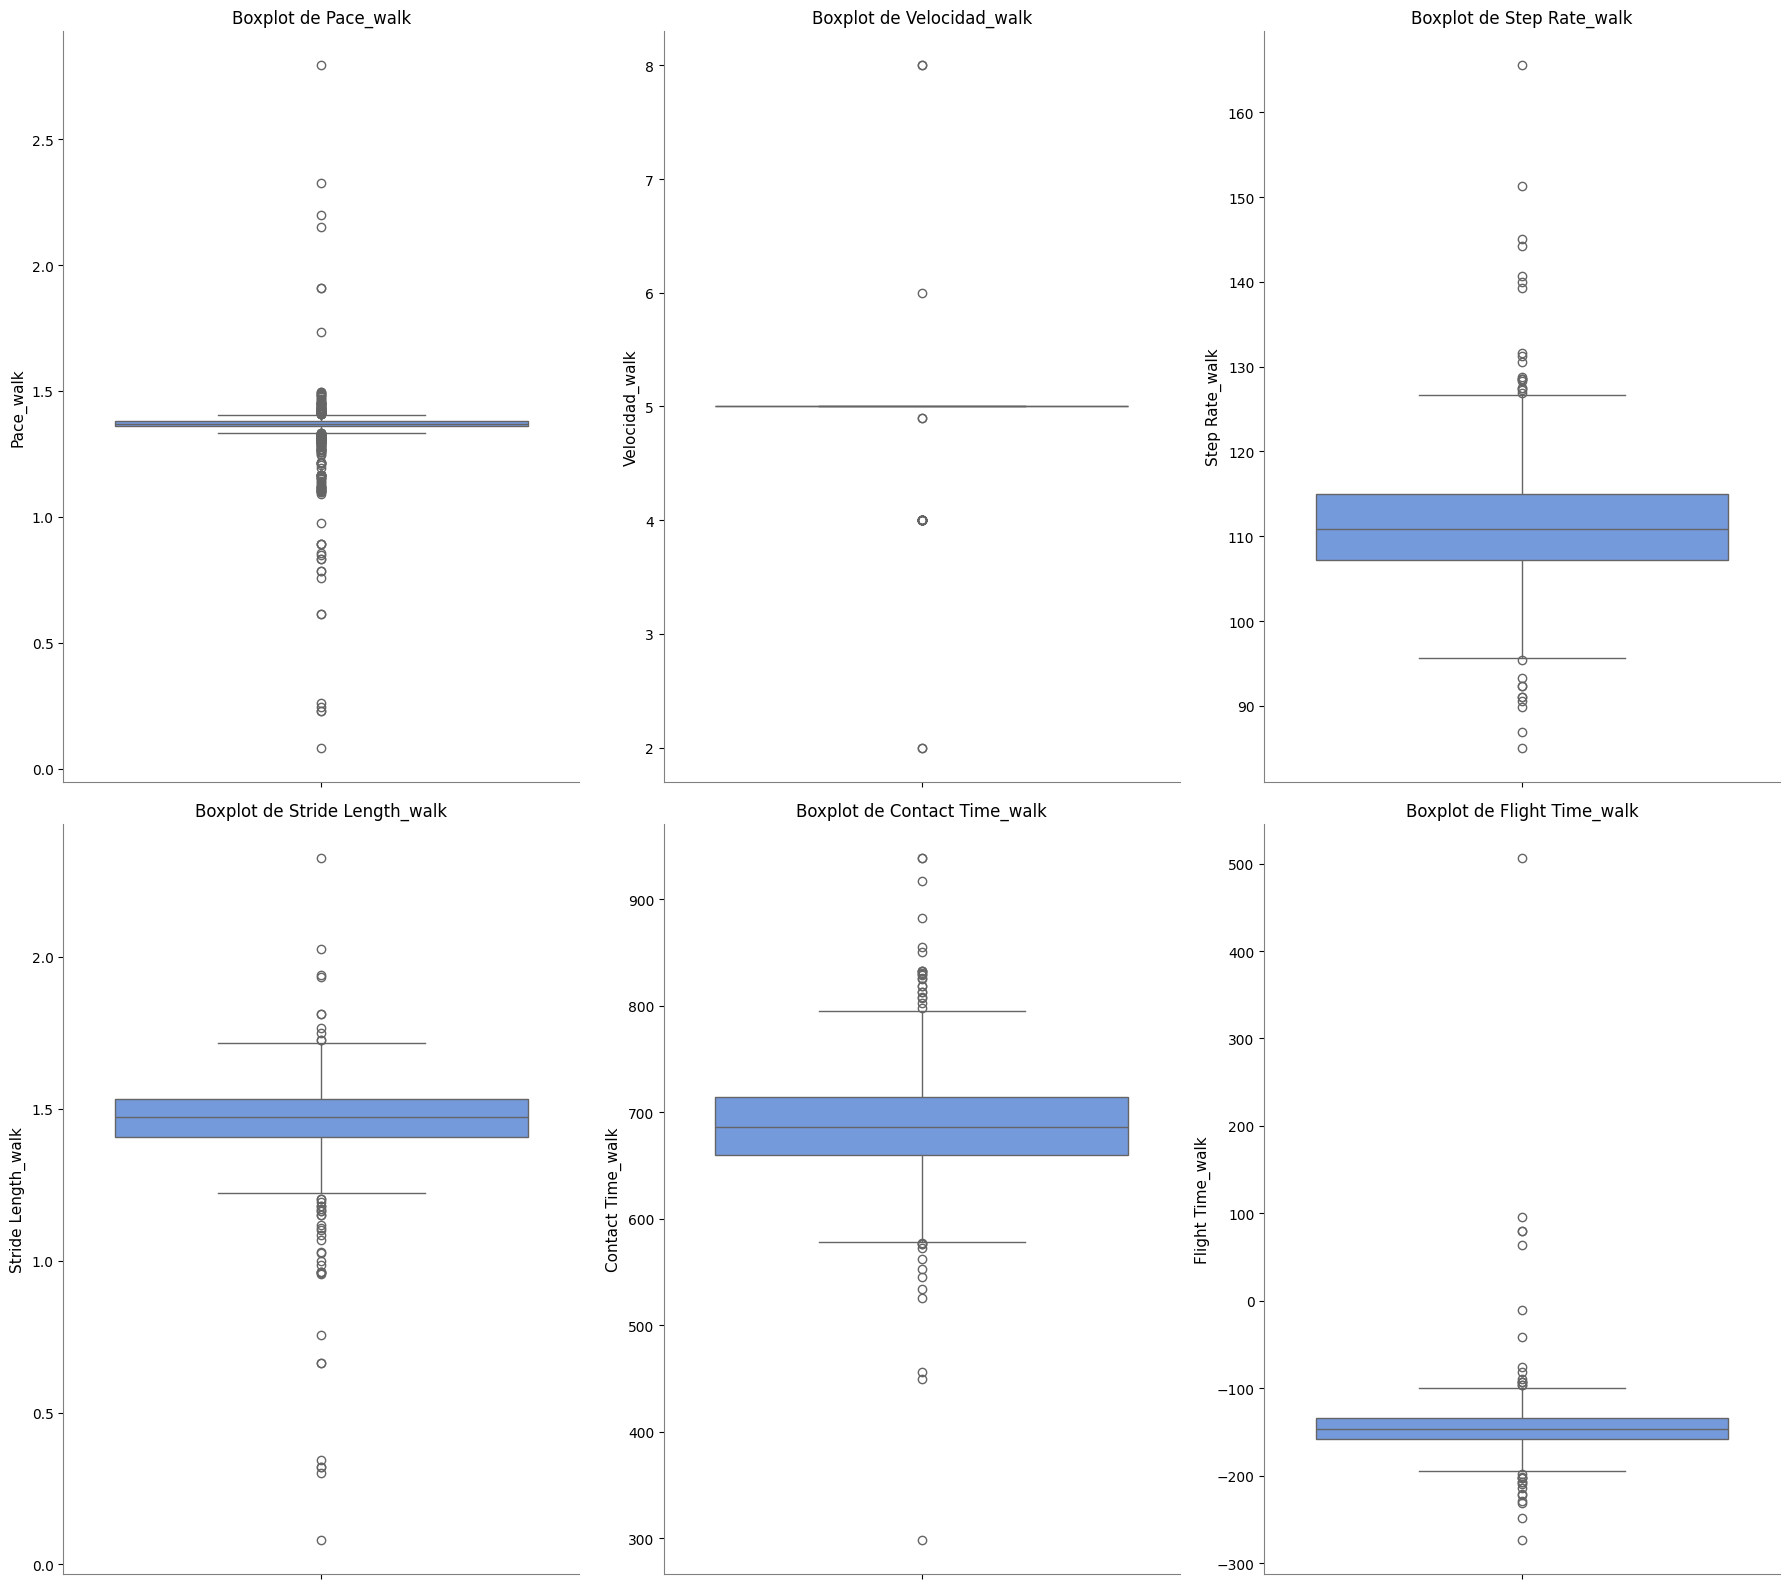

In [101]:
plot_grid_boxplots(df, ['Pace_walk', 'Velocidad_walk', 'Step Rate_walk', 'Stride Length_walk','Contact Time_walk', 'Flight Time_walk'], cols_per_row=3, figsize_per_subplot=(6, 8))

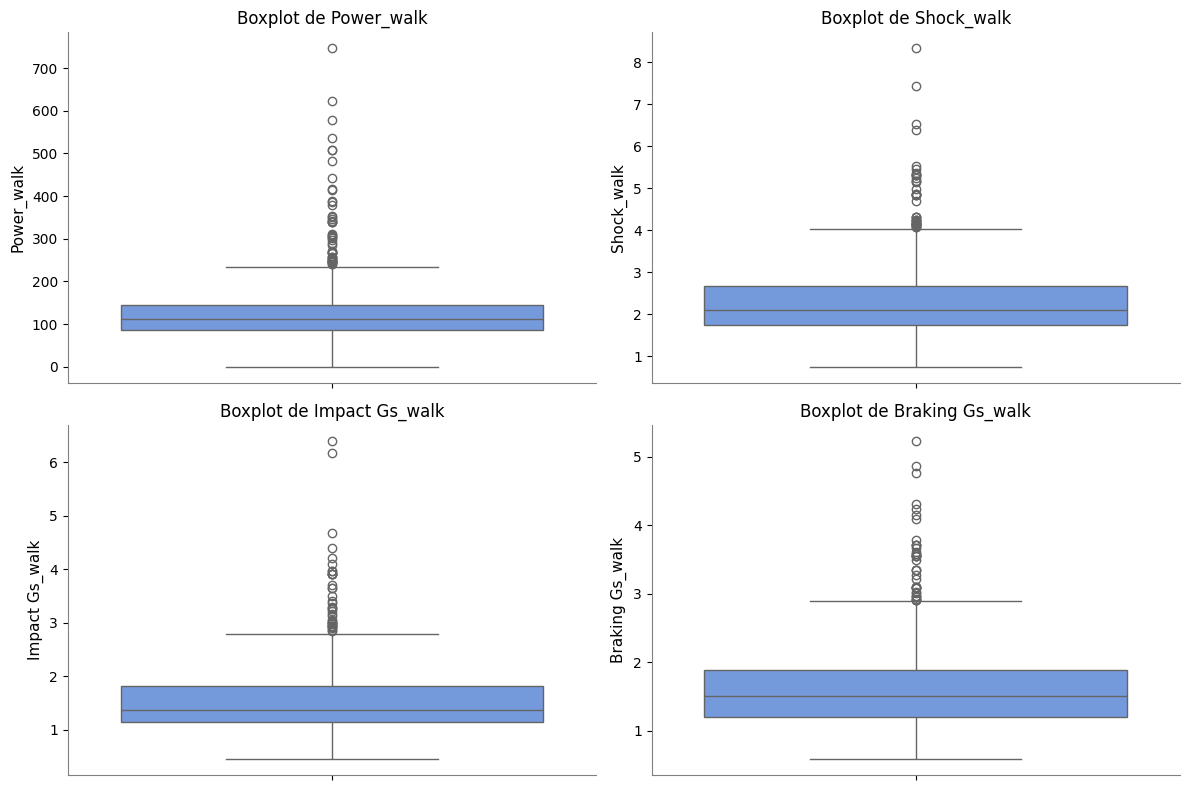

In [102]:
plot_grid_boxplots(df, ['Power_walk', 'Shock_walk', 'Impact Gs_walk', 'Braking Gs_walk'], cols_per_row=2, figsize_per_subplot=(6, 4))

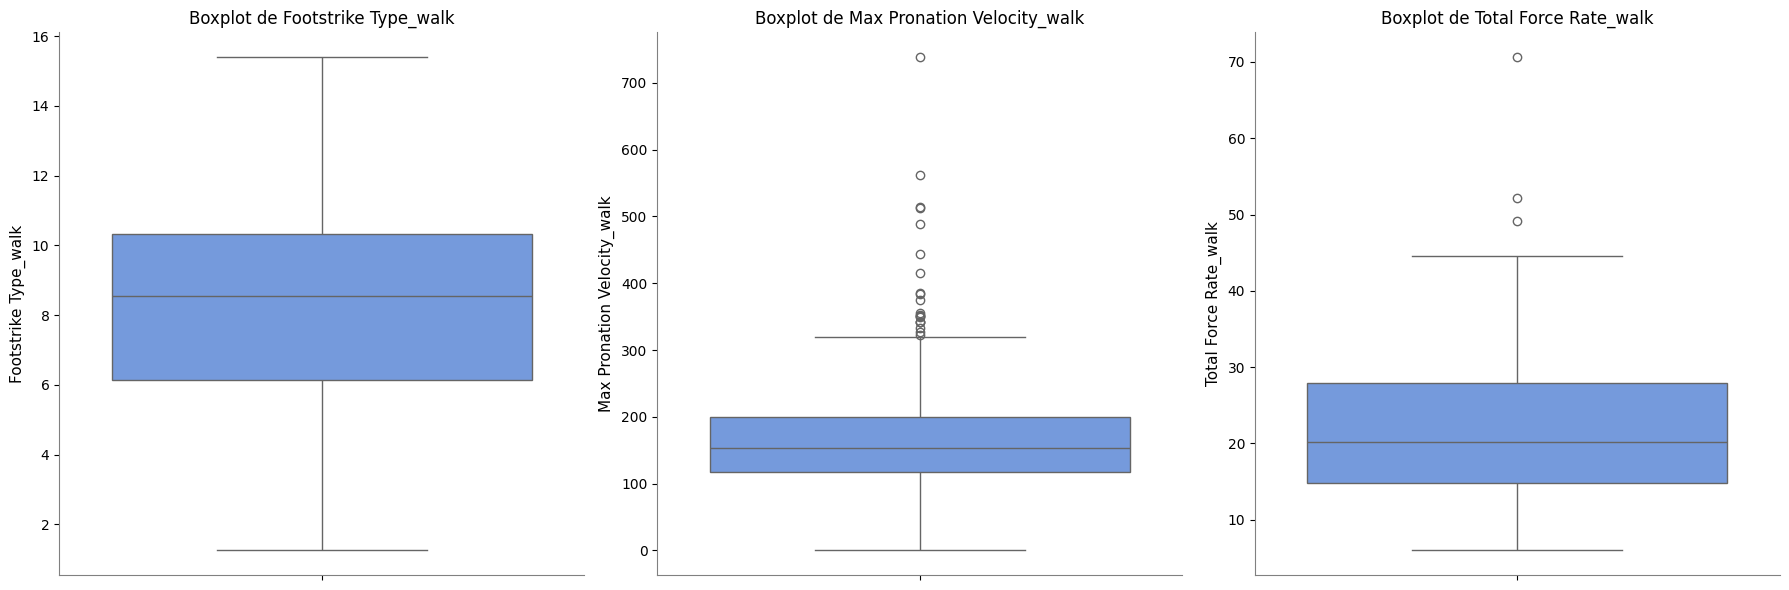

In [103]:
plot_grid_boxplots(df, ['Footstrike Type_walk', 'Max Pronation Velocity_walk', 'Total Force Rate_walk'], cols_per_row=3, figsize_per_subplot=(6, 6))

Los boxplots revelan varios **outliers**. Esto podría deberse a variaciones individuales extremas o errores en los sensores o algoritmos de RunScribe. Estos puntos extremos deberían ser investigados para asegurar que son datos fiables y no errores que podrían sesgar los análisis.

### Conclusión

Tras el análisis de los parámetros de la marcha, se ha determinado **priorizar aquellas columnas con menor cantidad de valores faltantes y relevancia biomécanica** para un entendimiento más claro de la marcha. Estas métricas no solo ofrecen interpretaciones más directas sino que también son posiblemente más fiables debido a la integridad de sus datos. Aunque el enfoque primario se mantendrá en los hallazgos de la **exploración clínica**, estas variables de la marcha se conservarán para consideración en el modelado predictivo futuro. Su inclusión dependerá de la coherencia con los datos clínicos y la capacidad de mejorar la precisión del modelo.

### 2.6.5. `Grupo 5 - runscribe_run_df - Datos Biomecánicos de Carrera`

In [104]:
runscribe_run_df.head()

0  Pace_run Velocidad_run  Step Rate_run  Stride Length_run  Contact Time_run  \
0  2.748551            10     161.715795           2.039509        346.164557   
1  3.588932            13     172.110955           2.502031        242.541176   
2  3.237176            12     161.586499           2.412864          312.8875   
3       NaN           NaN            NaN                NaN               NaN   
4  2.771313            10     154.324844           2.156889        344.173333   

0  Flight Ratio_run   Power_run  Shock_run  Impact Gs_run  Braking Gs_run  \
0          6.593809  176.417722  11.974009      10.824272        5.054195   
1         30.331614  283.164706  15.401995      14.331714        5.501979   
2         15.662497     295.075  12.238623      11.182911        4.905526   
3               NaN         NaN        NaN            NaN             NaN   
4         11.758673  265.053333   9.712691       8.177761        5.183445   

0  Footstrike Type_run  Pronation Excursion_run  Max Pronation Velocity_run  \
0             7.822785               -13.776322                  477.409271   
1            10.082353               -12.668764                  686.949965   
2               8.6625                -5.597087                  370.364379   
3                  NaN                      NaN                         NaN   
4             6.293333                -14.81418                  324.471029   

0  Peak Vertical GRF_run  Contact Ratio_run  Flight Time_run  \
0               2.289862          93.300849        24.468354   
1               3.752896          69.573162       105.623529   
2               2.753032          84.248189          58.0875   
3                    NaN                NaN              NaN   
4               2.529457          88.531048            44.28   

0  Stride Angle_run  Leg Spring Stiffness_run  Vertical Spring Stiffness_run  \
0          0.186361                   7.51902                      21.803643   
1          2.512311                 11.643407                      23.714214   
2          0.808101                  7.467717                      19.412686   
3               NaN                       NaN                            NaN   
4          0.601901                  7.491232                      17.637041   

0  Vertical GRF Rate_run  Horizontal GRF Rate_run  Swing Force Rate_run  \
0              28.354237                 5.432238              1.294939   
1              40.468636                 6.976227              1.371845   
2              31.394826                 6.489825              1.383789   
3                    NaN                      NaN                   NaN   
4              28.567287                 5.482485              1.139027   

0  VO<sub>2</sub>_run  Total Force Rate_run  Time (Max Swing->FS)_run  \
0            32.53777             88.931286                 55.556962   
1           40.873994            109.528792                105.376471   
2           36.559321             98.867903                   63.2125   
3                 NaN                   NaN                       NaN   
4           30.812276             84.667871                     21.48   

0  Time (FS->MPV)_run  Time (MPV->MP)_run  Time (MP->TO)_run  \
0           16.734177           61.088608         268.341772   
1           18.929412           37.129412         186.482353   
2             20.5625             14.6125           277.7125   
3                 NaN                 NaN                NaN   
4           29.693333           61.106667         253.373333   

0  Time (Min Swing->Max Swing)_run  Time (TO->Min Swing)_run  \
0                       271.746835                 94.531646   
1                       269.882353                     150.2   
2                         271.5125                  120.3875   
3                              NaN                       NaN   
4                       291.386667                    110.96   

0  Medio Lateral Gs_run  Braking Gs (Amplitude)_r

In [105]:
runscribe_run_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0    Pace_run                          363 non-null    object
 1   Velocidad_run                      363 non-null    object
 2    Step Rate_run                     363 non-null    object
 3    Stride Length_run                 362 non-null    object
 4    Contact Time_run                  363 non-null    object
 5    Flight Ratio_run                  363 non-null    object
 6    Power_run                         363 non-null    object
 7    Shock_run                         363 non-null    object
 8    Impact Gs_run                     363 non-null    object
 9    Braking Gs_run                    363 non-null    object
 10   Footstrike Type_run               363 non-null    object
 11   Pronation Excursion_run           363 non-null    object
 12   Max Pro

In [106]:
# runscribe_run_df.isna().sum()

Porcentaje de datos faltantes por columna:
 Medio Lateral Gs2_run: 74.69%
 Elevation Gain_run: 67.78%
 Max Obliquity_run: 66.44%
 Vertical Oscillation_run: 66.44%
 Max Rotation Rate_run: 66.44%
 Max Obliquity Rate_run: 66.44%
 Max Tilt Rate_run: 66.44%
 Max Rotation_run: 66.44%
 Min Rotation_run: 66.44%
 Min Obliquity_run: 66.44%
 Max Tilt_run: 66.44%
 Min Tilt_run: 66.44%
 Max Stance Velocity (FS->MP)_run: 59.98%
 Max Stance Velocity (MP->TO)_run: 59.98%
 Total Force Rate_run: 59.64%
 VO<sub>2</sub>_run: 59.64%
 Leg Spring Stiffness_run: 59.64%
 Step Length_run: 59.64%
 Horizontal GRF Rate_run: 59.64%
 Swing Force Rate_run: 59.64%
 Stride Angle_run: 59.64%
 Vertical Spring Stiffness_run: 59.64%
 Stride Length_run: 59.64%
 Stance Excursion (FS->MP)_run: 59.53%
 Pronation Excursion (MP->TO)_run: 59.53%
 Vertical Speed_run: 59.53%
 Stance Excursion (MP->TO)_run: 59.53%
 Braking Gs2_run: 59.53%
 Yaw Excursion (Swing)_run: 59.53%
 Yaw Excursion (MP->TO)_run: 59.53%
 Swing Excursion_run: 59

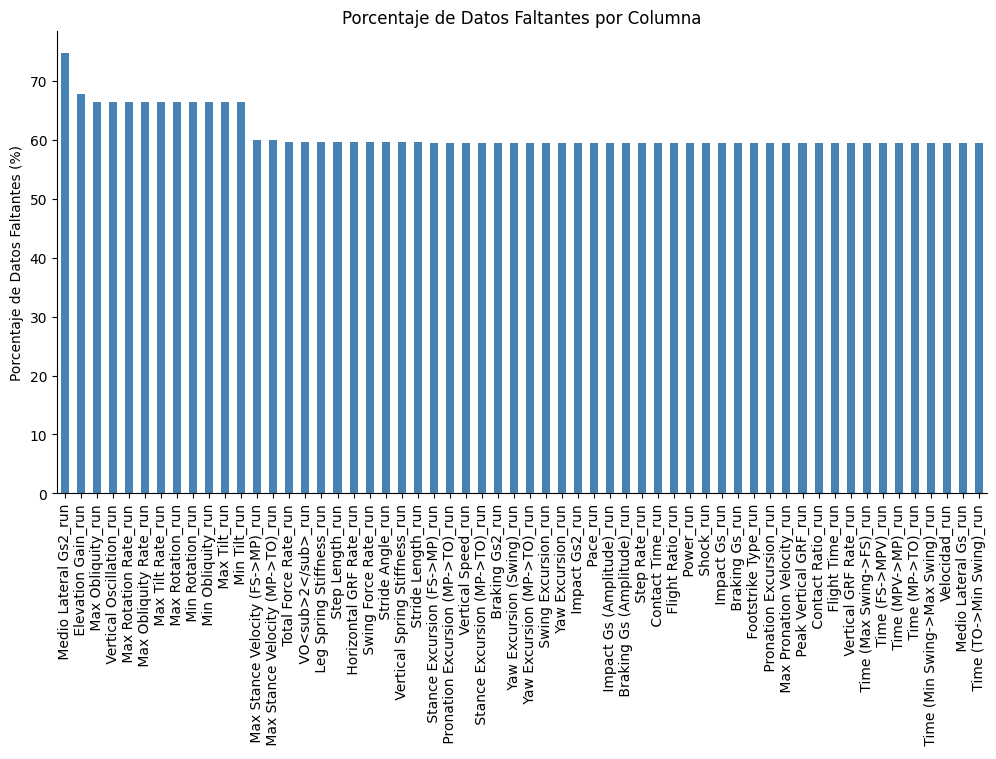

In [107]:
missing_percentage = calculate_missing_percentage(runscribe_run_df, runscribe_run_df.columns, visualize=True, figsize=(12,6))

### Eliminar espacios en los nombres de las columnas y convertir a valores numéricos

In [108]:
# Eliminar espacios en nombres de columnas
runscribe_columns = [col.strip() for col in runscribe_run_df.columns]
df.columns = df.columns.str.strip()

# Convertir columnas a numérico
for column in runscribe_columns:
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
        
# Seleccionamos posibles variables de interés
columns_selected = ['Pace_run', 'Velocidad_run', 'Step Rate_run', 'Stride Length_run', 'Contact Time_run', 'Flight Time_run', 'Power_run', 'Shock_run', 'Impact Gs_run', 'Braking Gs_run', 'Footstrike Type_run', 'Max Pronation Velocity_run', 'Total Force Rate_run']
df[columns_selected].describe()

0        Pace_run  Velocidad_run  Step Rate_run  Stride Length_run  \
count  363.000000     363.000000     363.000000         362.000000   
mean     3.211574      11.581267     163.899869           2.346897   
std      0.560853       1.799595       8.189391           0.391229   
min      1.630400       6.000000     145.378400           1.234801   
25%      2.765481      10.000000     157.558761           2.092373   
50%      3.048197      11.000000     163.826859           2.264296   
75%      3.582811      13.000000     169.494311           2.553511   
max      6.591568      20.000000     186.580144           4.708409   

0      Contact Time_run  Flight Time_run   Power_run   Shock_run  \
count        363.000000       363.000000  363.000000  363.000000   
mean         296.089530        78.923327  230.220579    9.829611   
std           62.658019        69.243761   75.506685    2.786356   
min          201.884615      -664.675676    0.000000    4.637865   
25%          266.604651        51.785531  192.360585    7.682659   
50%          292.539474        75.506667  229.125000    9.504847   
75%          319.373333       101.641026  265.051667   11.507056   
max         1228.959459       409.259615  823.000000   18.480825   

0      Impact Gs_run  Braking Gs_run  Footstrike Type_run  \
count     363.000000      363.000000           363.000000   
mean        7.442441        5.964861             8.540349   
std         2.576046        2.216262             3.457411   
min         2.694635        2.329115             1.000000   
25%         5.563838        4.378710             6.192308   
50%         7.137060        5.542137             7.795031   
75%         8.874024        7.239849            10.719613   
max        15.747820       13.859452            16.000000   

0      Max Pronation Velocity_run  Total Force Rate_run  
count                  363.000000            362.000000  
mean                   532.804441             71.614471  
std                    260.300110             21.221794  
min                  -1620.717521             41.355990  
25%                    366.033171             54.309113  
50%                    511.426601             64.283952  
75%                    668.113118             87.538966  
max                   1410.131385            134.543444

El análisis muestra una población con un rango moderado de velocidad y paso, y variabilidad en la técnica de carrera. Los tiempos de contacto bajos y variados tiempos de vuelo indican eficiencia y diversidad en la propulsión. Altos valores de potencia y shock reflejan corredores fuertes y resistentes, aunque el impacto significativo sugiere un riesgo de lesión variable. Las técnicas de pisada son variadas, y la fuerza generada durante la carrera difiere ampliamente. Se seleccionarán variables biomecánicas clave con datos completos para el modelado futuro, enfocándonos en la relevancia clínica para la prevención y manejo de lesiones.

### Detección de Outliers

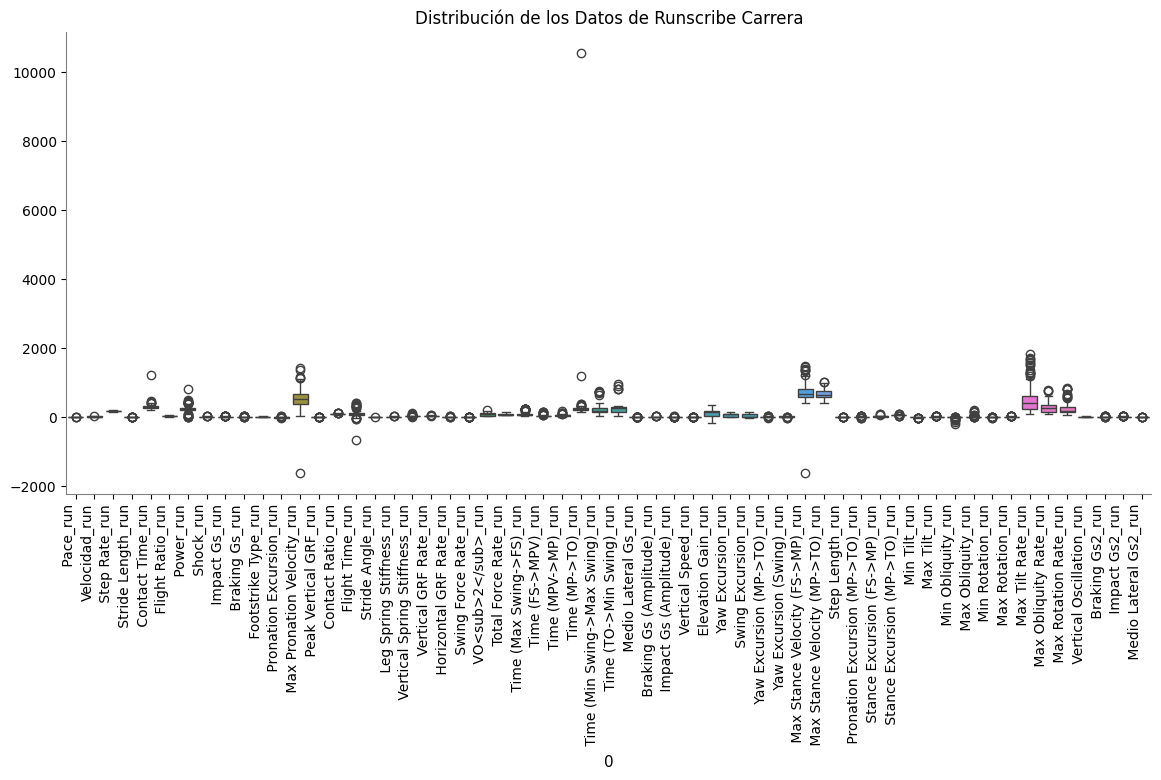

In [109]:
plot_boxplot(runscribe_run_df, title="Distribución de los Datos de Runscribe Carrera")

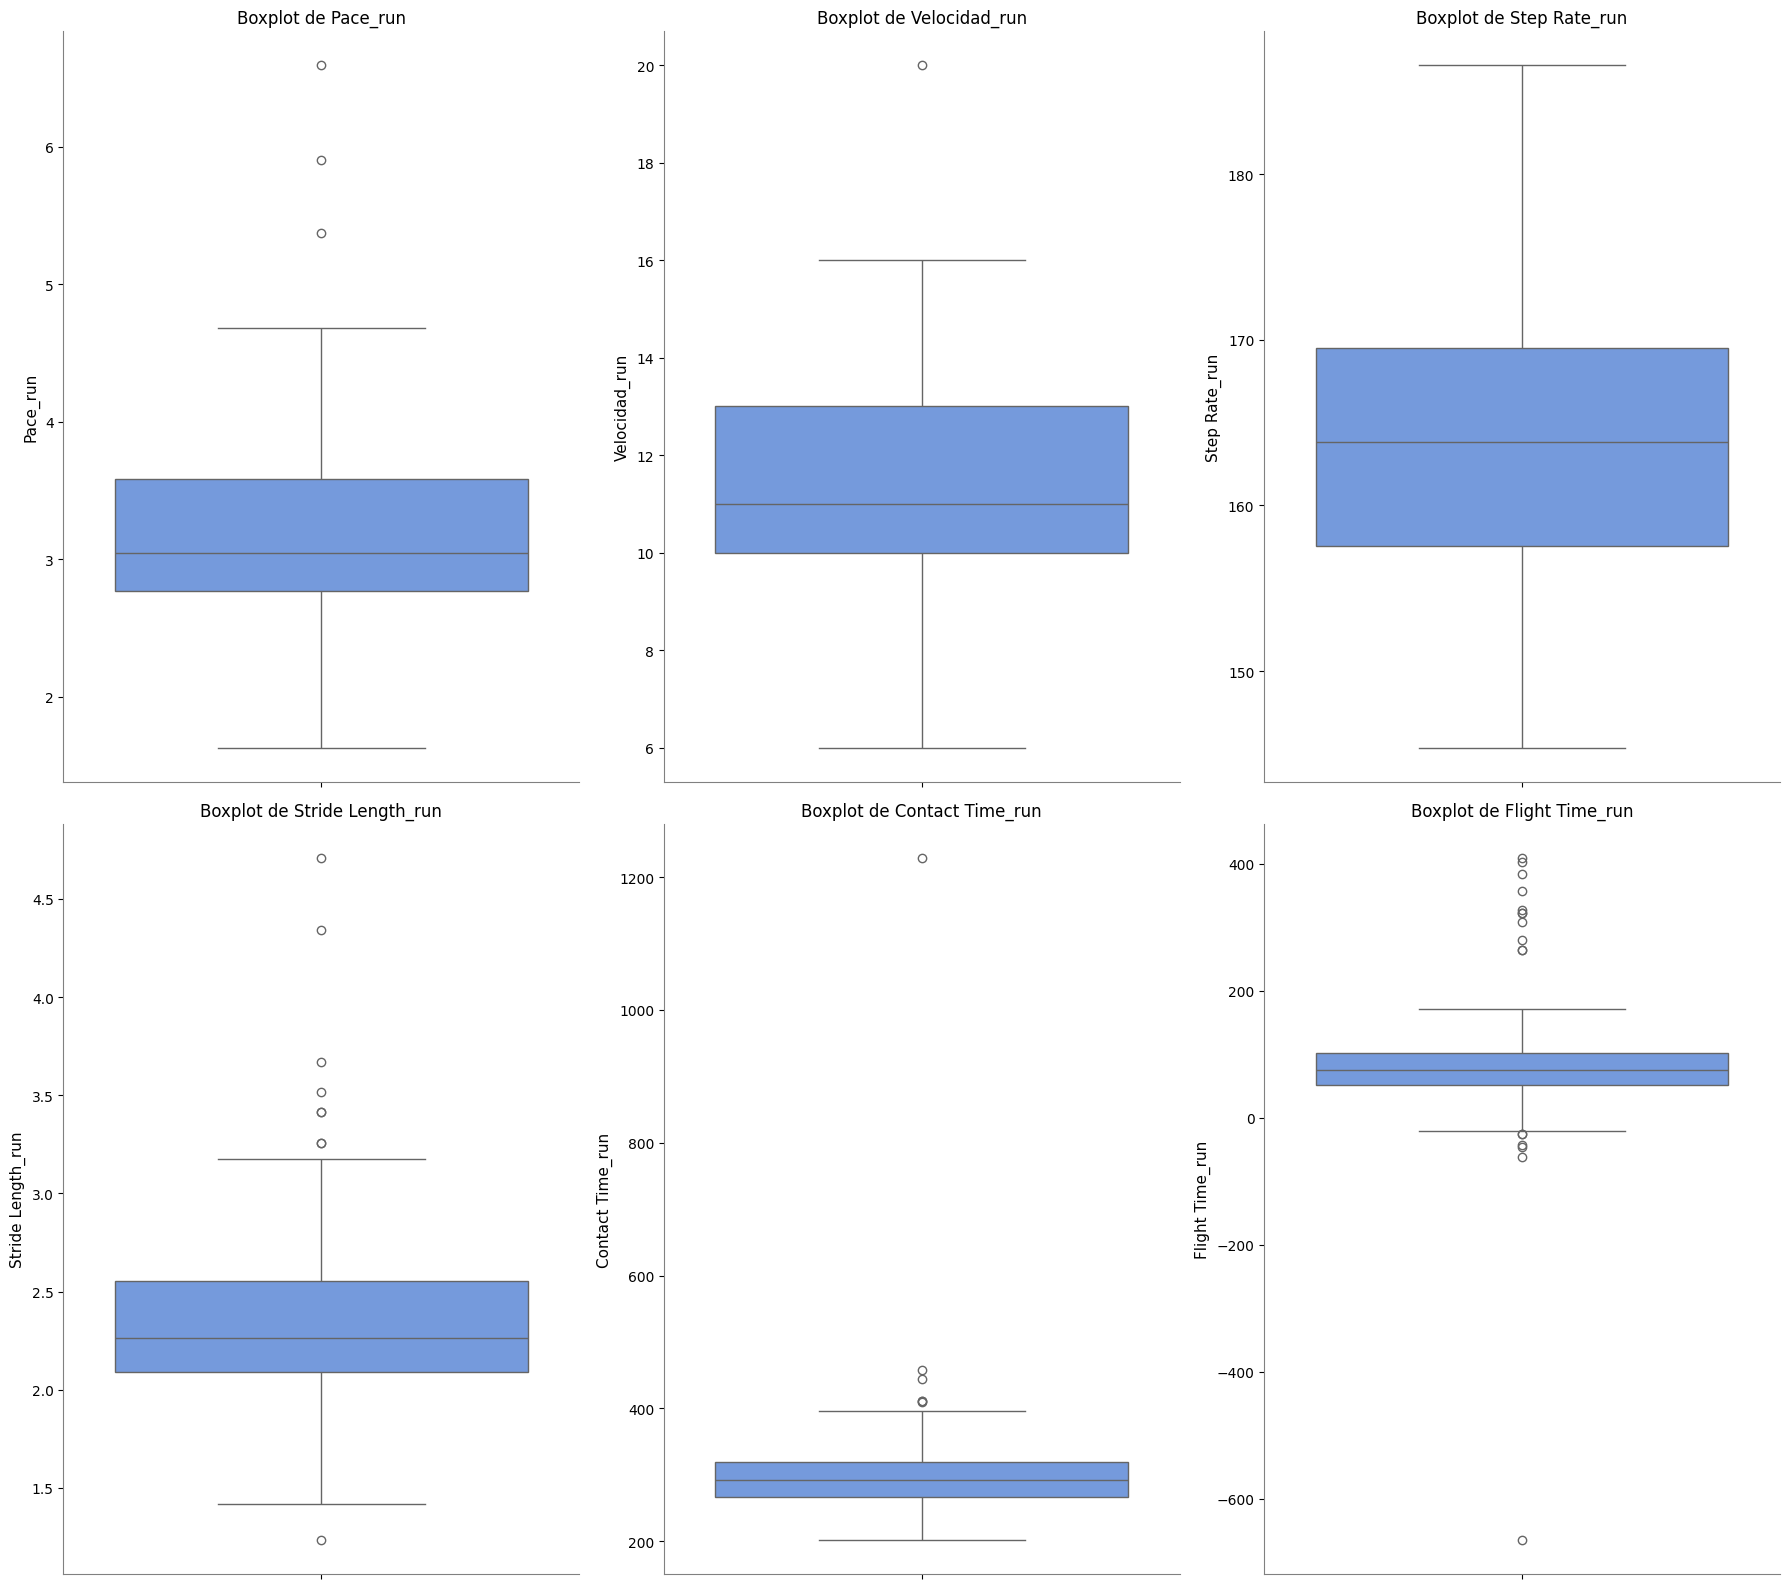

In [110]:
plot_grid_boxplots(df, ['Pace_run', 'Velocidad_run', 'Step Rate_run', 'Stride Length_run','Contact Time_run', 'Flight Time_run'], cols_per_row=3, figsize_per_subplot=(6, 8))

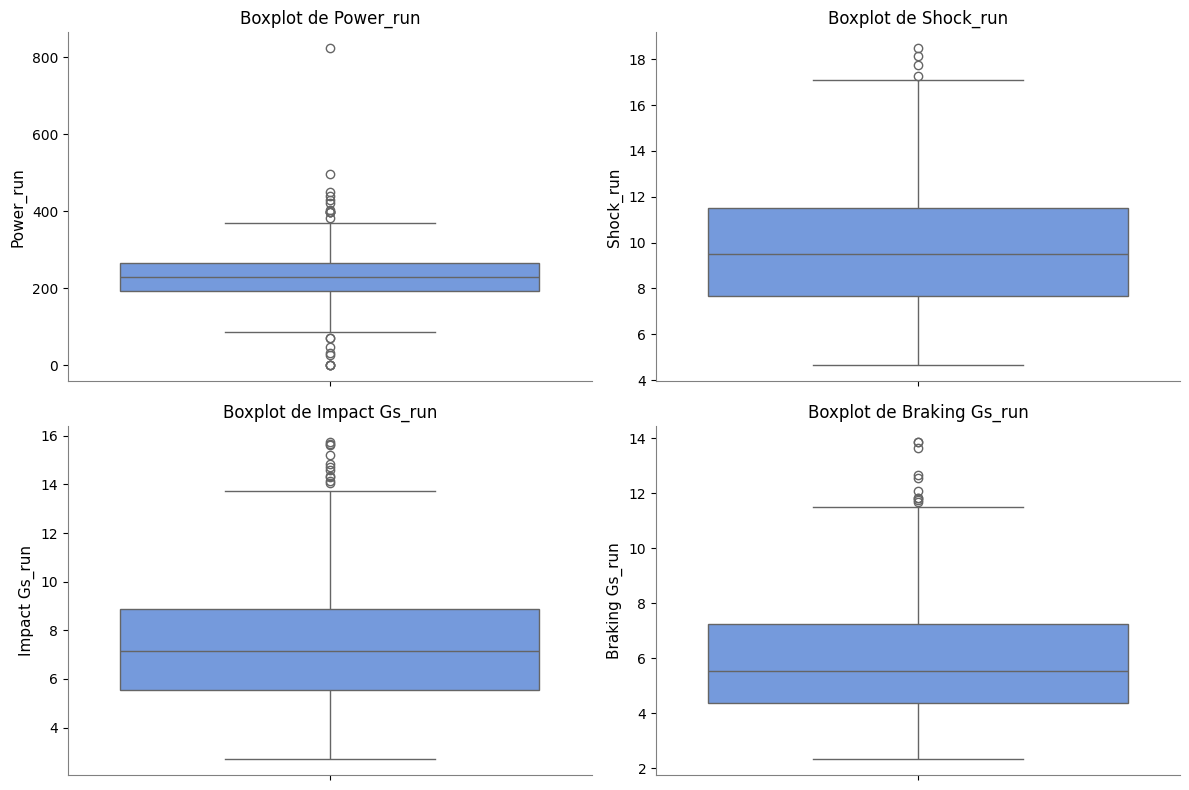

In [111]:
plot_grid_boxplots(df, ['Power_run', 'Shock_run', 'Impact Gs_run', 'Braking Gs_run'], cols_per_row=2, figsize_per_subplot=(6, 4))

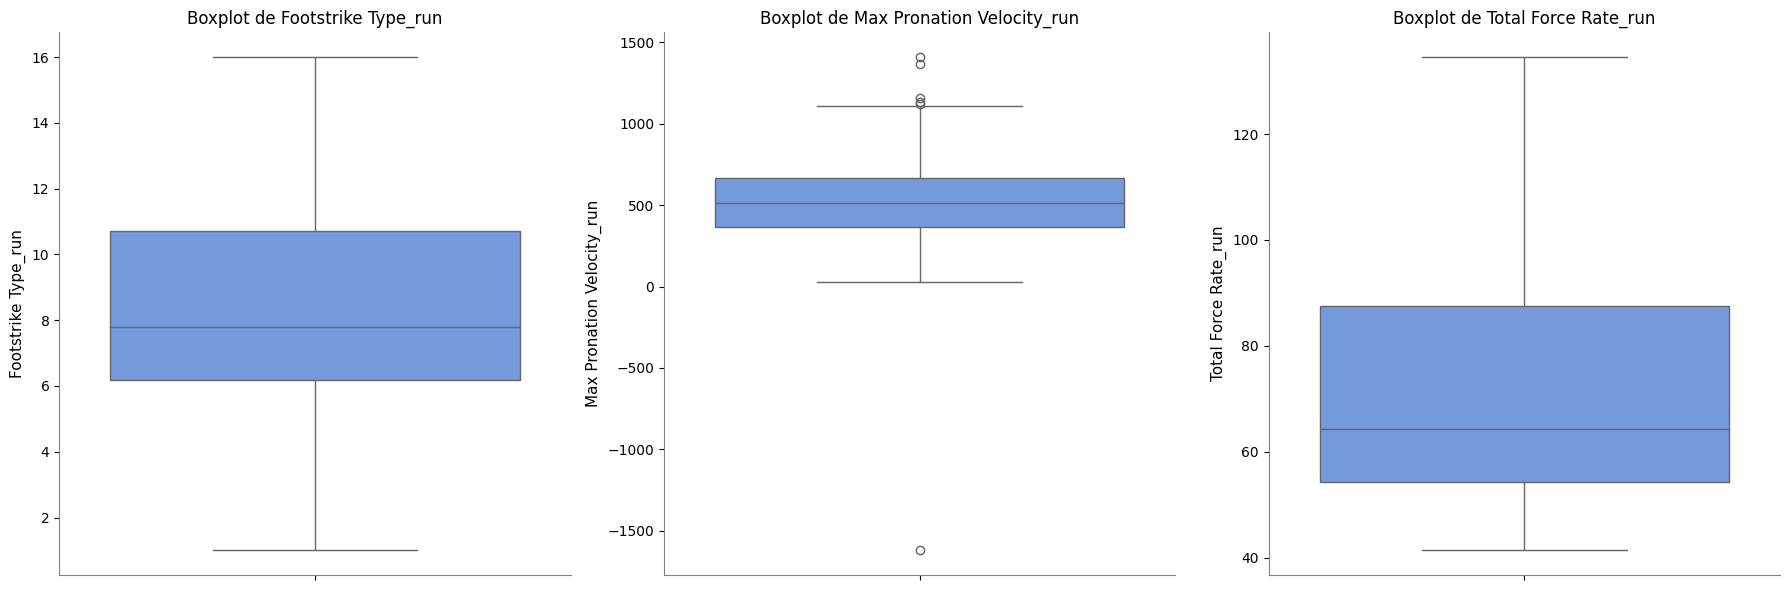

In [112]:
plot_grid_boxplots(df, ['Footstrike Type_run', 'Max Pronation Velocity_run', 'Total Force Rate_run'], cols_per_row=3, figsize_per_subplot=(6, 6))

### Correlación entre Variables

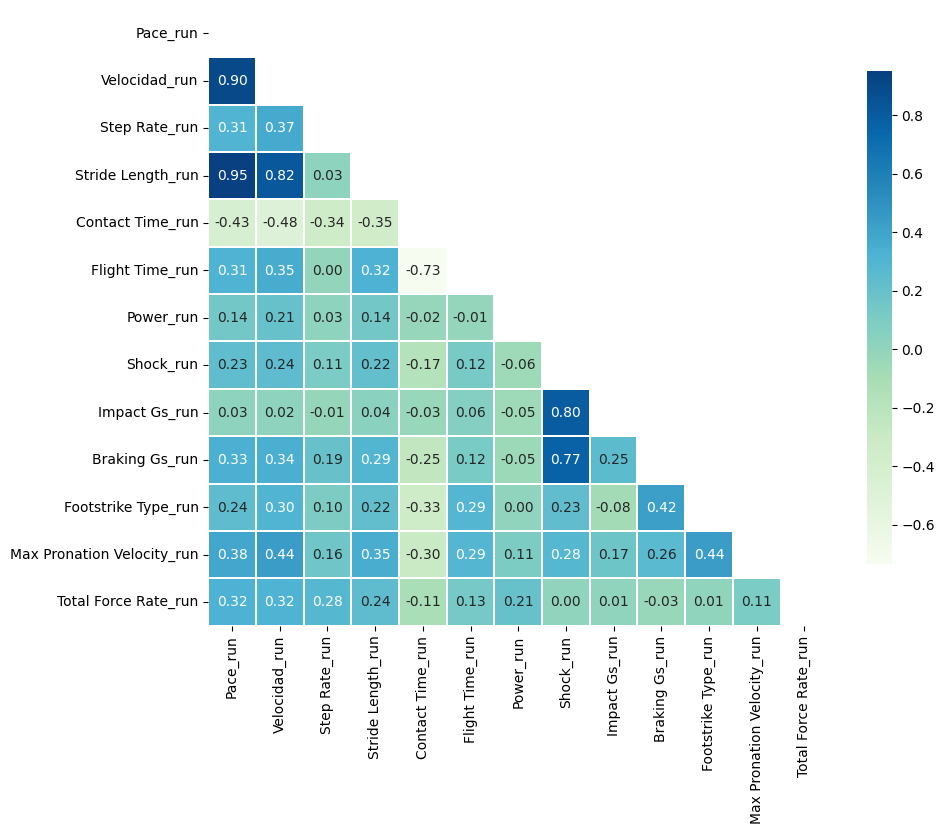

In [113]:
corr_matrix = df[columns_selected].corr()
plot_heatmap(corr_matrix=corr_matrix, figsize=(10, 8), cmap='GnBu', title='', annot=True)

La matriz de correlación para parámetros de carrera indica varias relaciones significativas:

- **Ritmo y Longitud de Zancada**: Una correlación muy alta (0.95) entre `Pace_run` y `Stride Length_run` sugiere que una mayor longitud de zancada está fuertemente asociada con un ritmo más rápido. Es probable que corredores con zancadas más largas sean capaces de cubrir más distancia en menos tiempo.
- **Ritmo y Velocidad**: La correlación entre `Pace_run` y `Velocidad_run` es igualmente alta (0.90), lo cual es esperado ya que el ritmo es una función directa de la velocidad.
- **Fuerzas de Frenado e Impacto**: Hay una correlación considerable entre `Braking Gs_run` y `Impact Gs_run` (0.80), lo que indica que el impacto al aterrizar y las fuerzas de frenado están interrelacionadas. Esto podría implicar que un aterrizaje con alto impacto conlleva una desaceleración considerable, lo que puede ser relevante para la prevención de lesiones.
- **Pronación y Fuerza Total**: `Max Pronation Velocity_run` muestra una correlación moderada con `Total Force Rate_run` (0.44), lo que podría indicar que una pronación más rápida se asocia con un incremento en la tasa de fuerza total aplicada durante la carrera.
- **Contacto y Tiempo de Vuelo**: La correlación negativa entre `Contact Time_run` y `Flight Time_run` (-0.73) sugiere que a medida que disminuye el tiempo de contacto con el suelo, el tiempo de vuelo aumenta, lo cual es típico en corredores más rápidos y eficientes.

Estos vínculos revelan patrones que podrían ser cruciales para mejorar el rendimiento en la carrera y para desarrollar estrategias de entrenamiento personalizadas. Además, pueden ofrecer insights para el diseño de calzado deportivo y para investigar más a fondo la relación entre la técnica de carrera y el riesgo de lesiones.

### Visualización: Histogramas

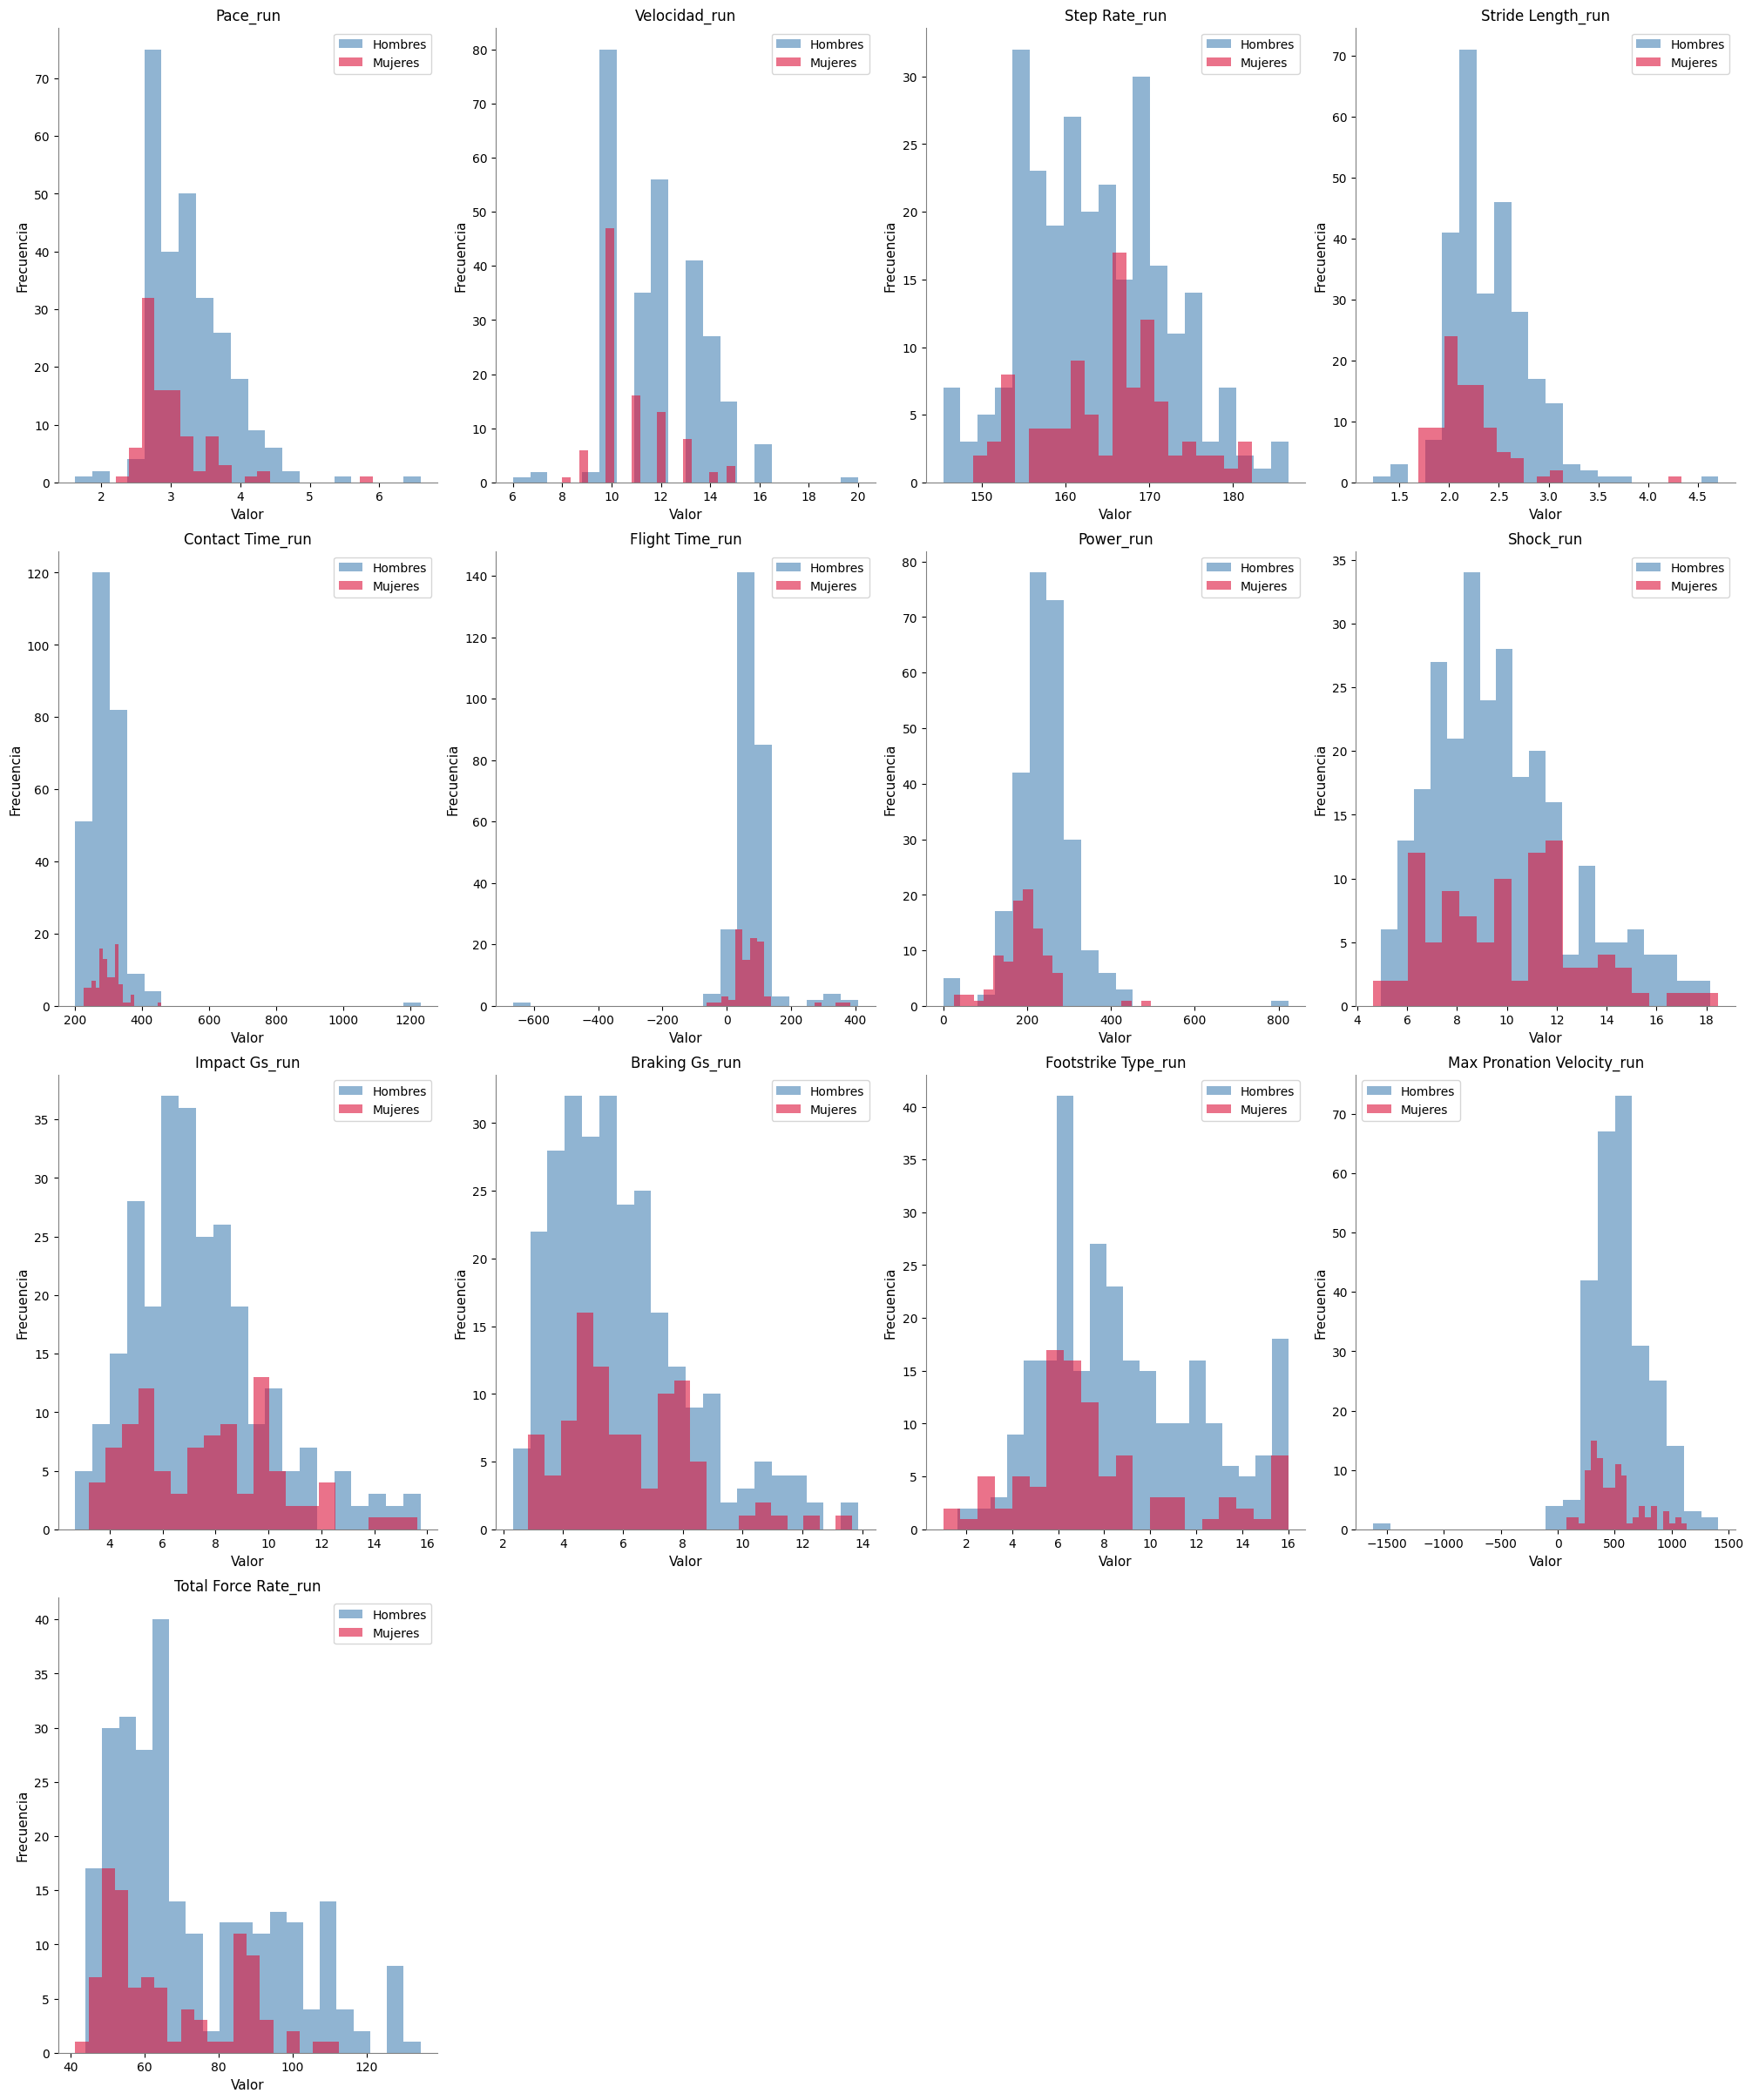

In [114]:
columns_selected_with_gender = columns_selected + ['Sexo']
plot_gender_histogram(df[columns_selected_with_gender])

Las gráficas muestran la distribución de diferentes métricas biomecánicas durante la carrera para hombres y mujeres. Observando las diferencias entre géneros, podemos inferir que:

- La distribución del **paso** (`Pace_run`) y la **velocidad** (`Velocidad_run`) presenta diferencias notables, con los **hombres tendiendo a mayores velocidades y ritmos más rápidos en comparación con las mujeres**. Esto es coherente con las diferencias fisiológicas y de rendimiento entre géneros en actividades de resistencia.
- La **longitud de la zancada** (`Stride Length_run`) y la **tasa o frecuencia de paso** (`Step Rate_run`) también varían entre géneros, con una distribución que sugiere que los **hombres tienen zancadas más largas y las mujeres tienen tasas de paso ligeramente más altas**.
- En cuanto al **tiempo de contacto** (`Contact Time_run`) y el **tiempo de vuelo** (`Flight Time_run`), las mujeres muestran una mayor variabilidad en el tiempo de vuelo, lo que puede indicar diferencias en la técnica de carrera o en la absorción y generación de fuerza durante el ciclo de la zancada.
- La **potencia** (`Power_run`), el **choque** (`Shock_run`), el **impacto** (`Impact Gs_run`) y las **fuerzas de frenado** (`Braking Gs_run`) tienden a ser **mayores en los hombres**, lo que podría reflejar una combinación de masa corporal más elevada y un estilo de carrera más agresivo, lo que lleva a un mayor estrés en cada paso.
- La variabilidad en el **tipo de pisada** (`Footstrike Type_run`) sugiere que hay diferencias en la técnica de carrera entre hombres y mujeres, posiblemente debido a la anatomía o preferencias individuales.
- La **velocidad de pronación máxima** (`Max Pronation Velocity_run`) y la **tasa de fuerza total** (`Total Force Rate_run`) muestran diferencias sustanciales entre géneros, lo que podría estar relacionado con la biomecánica y la estructura ósea diferenciada.

Este análisis descriptivo ofrece una base para estudios más profundos sobre cómo estas diferencias pueden afectar la eficiencia, la economía de carrera y el riesgo de lesiones, y podría ser útil para personalizar entrenamientos y recomendaciones de prevención de lesiones para hombres y mujeres.

### Conclusión

El análisis descriptivo de los **parámetros de carrera** sugiere una muestra heterogénea en términos de rendimiento y técnica, con una marcada variabilidad en las métricas clave como la velocidad, la longitud de zancada y los tiempos de contacto y vuelo. La **media de datos faltantes ronda entre 534 y 596** para este grupo de variables, lo que implica una **selección crítica** de características para futuros modelos predictivos. Dado que el total de registros es cercano a 900, al utilizar únicamente los **sujetos con mediciones completas se reduciría la muestra a menos de la mitad**. Esto sugiere que los modelos resultantes estarán enfocados específicamente en atletas o individuos con datos de rendimiento de carrera, diferenciándolos del resto de la población estudiada. Tal enfoque permitirá una interpretación más precisa de la influencia de los parámetros de carrera en la salud y rendimiento deportivo, aunque limitará la generalización a toda la población de estudio.

### 2.6.6. `Grupo 6 - ib_resport2_df - Tests Clínicos`

In [115]:
ib_resport2_df.head()

0 M1 Hipermovil  TF Normal  TT Normal AP Adducto Thomas Psoas  Thomas RF  \
0            No         No         No         No     Negativo   Negativo   
1     Bilateral  Bilateral  Bilateral         No     Negativo  Bilateral   
2           NaN        NaN        NaN        NaN          NaN        NaN   
3     Bilateral  Bilateral         No  Bilateral     Negativo  Bilateral   
4            No  Bilateral         No         No     Negativo  Bilateral   

0 Thomas TFL      Ober    AP_Varo  AP_Neutro AP_Valgo RP_Varo  RP_Neutro  \
0   Negativo  Negativo  Bilateral         No       No      No  Bilateral   
1  Bilateral  Negativo         No  Bilateral       No      No  Bilateral   
2        NaN       NaN        NaN        NaN      NaN     NaN        NaN   
3   Negativo  Negativo         No  Bilateral       No      No  Bilateral   
4    Derecho  Negativo         No  Bilateral       No      No  Bilateral   

0 RP_Valgo Arco normal Arco Aplanado Arco elevado PIe cavo posterior  \
0       No          No            No    Bilateral                 No   
1       No   Bilateral            No           No                 No   
2      NaN         NaN           NaN          NaN                NaN   
3       No   Bilateral            No           No                 No   
4       No          No            No    Bilateral                 No   

0 PIe cavo anterior     M1 DFx M5 Hipermovil M5 Dfx  \
0         Bilateral         No            No     No   
1         Bilateral         No            No     No   
2               NaN        NaN           NaN    NaN   
3         Bilateral  Bilateral            No     No   
4         Bilateral         No            No     No   

0 Arco transverso disminuido     M1 PFx Cavo Col medial M5 PFx  \
0                         No         No              No     No   
1                         No  Bilateral              No     No   
2                        NaN        NaN             NaN    NaN   
3                         No         No              No     No   
4                         No  Bilateral              No     No   

0 Cavo col Lateral Arco transverso aumentado MTF1 Normal  HLF         HL   HR  \
0               No                        No   Bilateral   No         No   No   
1          Derecha                   Derecha          No   No  Bilateral   No   
2              NaN                       NaN         NaN  NaN        NaN  NaN   
3        Bilateral                        No   Bilateral   No         No   No   
4        Bilateral                 Bilateral   Bilateral   No         No   No   

0        HAV Index Minus Index plus-minus Index Plus Col lat corta  \
0  Bilateral   Bilateral               No         No            No   
1         No   Bilateral               No         No            No   
2        NaN         NaN              NaN        NaN           NaN   
3         No   Bilateral               No         No            No   
4         No   Bilateral               No         No            No   

0 Col lat larga Pie griego Pie cuadrado Pie egipcio  TFI        TFE  TTI  \
0            No         No           No   Bilateral   No  Bilateral   No   
1            No         No           No   Bilateral   No         No   No   
2           NaN        NaN          NaN         NaN  NaN        NaN  NaN   
3            No         No           No   Bilateral   No         No   No   
4            No         No           No   Bilateral   No         No   No   

0        TTE AP Normal ABD-AD AP Abducto Pierna Corta  \
0  Bilateral        Bilateral         No           No   
1         No        Bilateral         No           No   
2        NaN              NaN        NaN          NaN   
3  Bilateral               No         No      Derecha   
4  Bilateral        Bilateral         No      Derecha   

0 Rot Ext Cadera Izquierda Rot Ext Cadera Derecha Rot Int Cadera Derecha  \
0                      NaN                    NaN                    NaN   
1                      NaN                    NaN                

### Analisis de Valores Faltantes

In [116]:
missing_values = ib_resport2_df.isna().sum()

more_than_800 = missing_values[missing_values > 800]
between_600_and_800 = missing_values[(missing_values > 600) & (missing_values <= 800)]
between_400_and_600 = missing_values[(missing_values > 400) & (missing_values <= 600)]
less_than_400 = missing_values[missing_values < 400]

In [117]:
print("Columnas con más de 800 valores faltantes:", more_than_800.index.tolist())

Columnas con más de 800 valores faltantes: ['Rot Ext Cadera Izquierda', 'Rot Ext Cadera Derecha', 'Rot Int Cadera Derecha', 'Rot Int Cadera Izquierda', 'Dismetría', 'POPLITEO CL Neutra', 'Valgo-Varo_I', 'Pelvis AV', 'Rot_Pelvis_Izda', 'EIAS_Down_Izda', 'Hiperlordosis cervical', 'Hipercifosis torácica', 'Hiperlordosis lumbar', 'Antepulsión torax', 'Antepulsión pelvis', 'Retropulsion Pelvis', 'Rectificación lumbar', 'Retropulsion Torax', 'Dorso plano', 'Rectificación Cervical', 'GAZE Elevada', 'GAZE Disminuida', 'Retrognatismo', 'Prognatismo', 'Inclinación izquierda cabeza', 'Escoliosis Cervical Izquierda', 'Escoliosis Cervical Derecha', 'Escoliosis Dorsal Derecha', 'Escoliosis Dorsal Izquierda', 'Escoliosis Lumbar Izquierda', 'Escoliosis Lumbar Derecha', 'Escoliosis Rotación toracica derecha', 'Escoliosis Rotación toracica izquierda', 'Rotación izquierda cabeza', 'Rotación derecha cabeza', 'Rotación derecha torax', 'Rotación izquierda torax', 'Antepulsion Cabeza', 'Inclinación derecha c

In [118]:
print("Columnas con entre 600 y 800 valores faltantes:", between_600_and_800.index.tolist())

Columnas con entre 600 y 800 valores faltantes: ['Iliaco Izquierdo AV', 'Iliaco Izquierdo RV', 'Iliaco Dcho AV', 'Iliaco Dcho RV', 'EIAS_Up_Izda', 'EIAS_Up_Dcha', 'EIPS_Up_I', 'EIPS_Up_Dcha', 'Calzado', 'Escaneo 0%', 'Elementos en taller', 'Fisioterapia y ejercicios', 'Llamar cuando lleguen plantillas', 'Elementos en Diseño']


In [119]:
print("Columnas con entre 400 y 600 valores faltantes:", between_400_and_600.index.tolist())

Columnas con entre 400 y 600 valores faltantes: ['Iliaco Izquierdo Normal', 'Iliaco Dcho Normal', 'Lunge Izq', 'Lunge Dcho']


In [120]:
print("Columnas con menos de 400 valores faltantes:", less_than_400.index.tolist())

Columnas con menos de 400 valores faltantes: ['M1 Hipermovil', 'TF Normal', 'TT Normal', 'AP Adducto', 'Thomas Psoas', 'Thomas RF', 'Thomas TFL', 'Ober', 'AP_Varo', 'AP_Neutro', 'AP_Valgo', 'RP_Varo', 'RP_Neutro', 'RP_Valgo', 'Arco normal', 'Arco Aplanado', 'Arco elevado', 'PIe cavo posterior', 'PIe cavo anterior', 'M1 DFx', 'M5 Hipermovil', 'M5 Dfx', 'Arco transverso disminuido', 'M1 PFx', 'Cavo Col medial', 'M5 PFx', 'Cavo col Lateral', 'Arco transverso aumentado', 'MTF1 Normal', 'HLF', 'HL', 'HR', 'HAV', 'Index Minus', 'Index plus-minus', 'Index Plus', 'Col lat corta', 'Col lat larga', 'Pie griego', 'Pie cuadrado', 'Pie egipcio', 'TFI', 'TFE', 'TTI', 'TTE', 'AP Normal ABD-AD', 'AP Abducto', 'Pierna Corta', 'Ober Friccion', 'Popliteo', 'PNCA AP Varo', 'PNCA AP Neutro', 'PNCA AP Valgo', 'PNCA RP Varo', 'PNCA RP Neutro', 'PNCA RP Valgo', 'T_Hintermann', 'Jack Normal', 'Jack R aumentada', 'Jack No reconstruye', 'Jack R disminuida', 'Pron max Normal', 'Pronación no disponible', '2Heel Ra

In [121]:
# print(less_than_400) # La mayoría de las columnas tiene 35 valores faltantes, alguna con 36

In [122]:
missing_percentage = calculate_missing_percentage(ib_resport2_df, ib_resport2_df.columns, visualize=False, figsize=(12,6))

Porcentaje de datos faltantes por columna:
Rotación derecha cabeza: 100.00%
Escoliosis Cervical Derecha: 100.00%
Inclinación derecha cabeza: 100.00%
Lateropulsión cabeza derecha: 100.00%
Prognatismo: 100.00%
Retrognatismo: 100.00%
Lateropulsión pelvis  derecha: 100.00%
GAZE Elevada: 100.00%
Escoliosis Cervical Izquierda: 99.89%
GAZE Disminuida: 99.89%
Escaneo 75%: 99.89%
Inclinación izquierda cabeza: 99.89%
POPLITEO CL Neutra: 99.89%
Lateropulsión cabeza izquierda: 99.89%
Lateropulsión pelvis  izquierda: 99.67%
Rotación izquierda cabeza: 99.67%
Elevación Hombro Izquierdo: 99.55%
Retropulsión Cabeza: 99.55%
EIPS_Down_Izda: 99.33%
Escaneo 100%: 99.33%
Rectificación Cervical: 99.33%
Retropulsion Pelvis: 99.33%
Descenso hombro izquierdo: 99.33%
Escoliosis Dorsal Izquierda: 99.22%
Rot Int Cadera Derecha: 99.11%
Rot Ext Cadera Derecha: 99.11%
Rotación izquierda torax: 99.11%
Rot Int Cadera Izquierda: 99.11%
Escoliosis Lumbar Izquierda: 99.11%
Antepulsión torax: 99.11%
Pelvis AV: 99.11%
Later

### Análisis de Valores Únicos por Columna

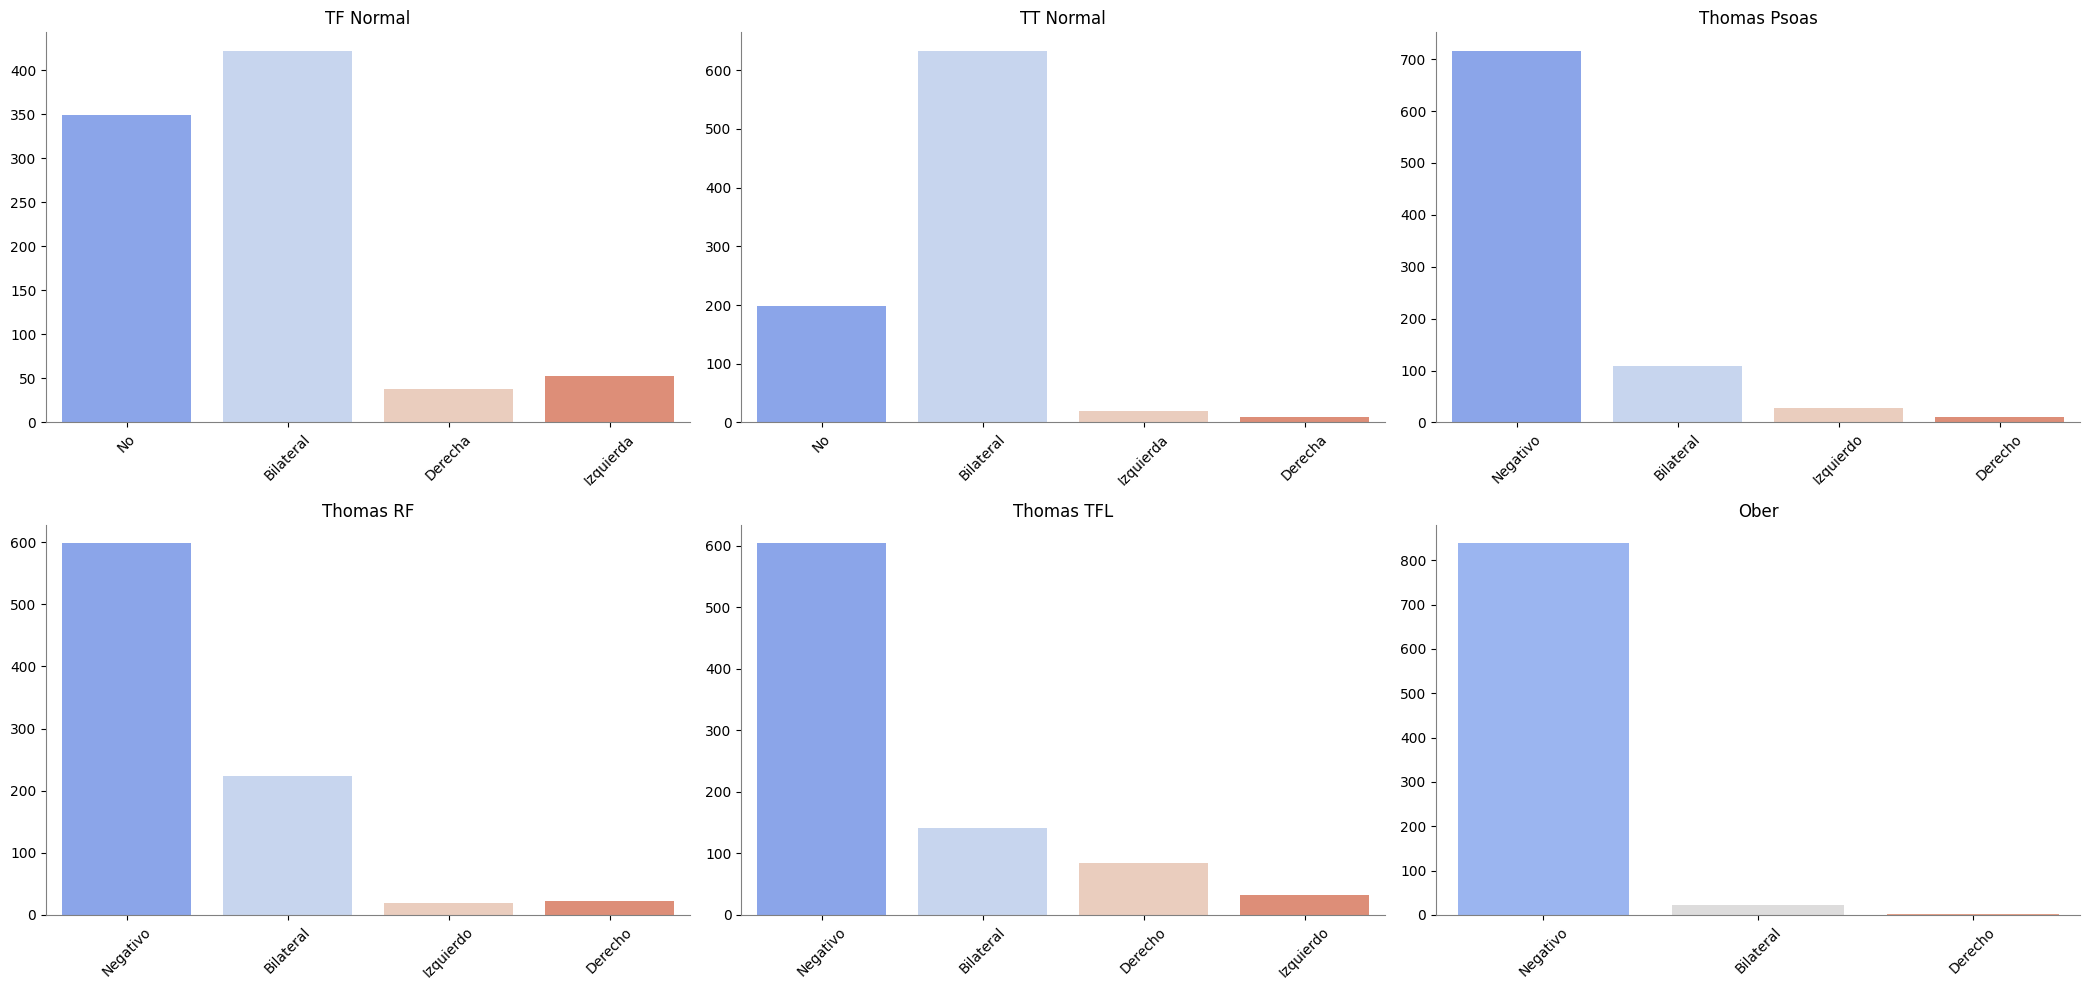

In [123]:
column_names = ['TF Normal', 'TT Normal', 'Thomas Psoas', 'Thomas RF', 'Thomas TFL', 'Ober']
plot_categorical_columns(ib_resport2_df, column_names, 3, ylabel='')

In [124]:
columns = ['TF Normal', 'TT Normal', 'Thomas Psoas', 'Thomas RF', 'Thomas TFL', 'Ober', 'TFI', 'TFE', 'TTI', 'TTE']
df[columns].describe()

0       TF Normal  TT Normal Thomas Psoas Thomas RF Thomas TFL      Ober  TFI  \
count         862        862          862       862        862       862  862   
unique          4          4            4         4          4         3    4   
top     Bilateral  Bilateral     Negativo  Negativo   Negativo  Negativo   No   
freq          422        633          716       598        604       838  692   

0       TFE  TTI  TTE  
count   862  862  862  
unique    4    4    4  
top      No   No   No  
freq    560  847  643

La exploración de las variables clínicas relativas a la **torsión femoral y tibial y los test de cadera** revela una predominancia de resultados **'Negativo'**, indicando una frecuencia más baja de patologías en esta muestra.

Además, para `TF Normal` y `TT Normal`, la categoría **'Bilateral' es la más común**, lo que sugiere que **la mayoría de los individuos no presentan anormalidades significativas en torsión femoral ni tibial**. Las columnas `TFI` y `TFE` muestran una alta frecuencia de **'No'**, sugiriendo la ausencia de torsión femoral interna o externa en la mayoría de los casos.

Estos hallazgos sugieren que, dentro de esta población, **las condiciones patológicas evaluadas no son prevalentes**, lo que podría indicar una población en general sana en términos de los parámetros clínicos evaluados.

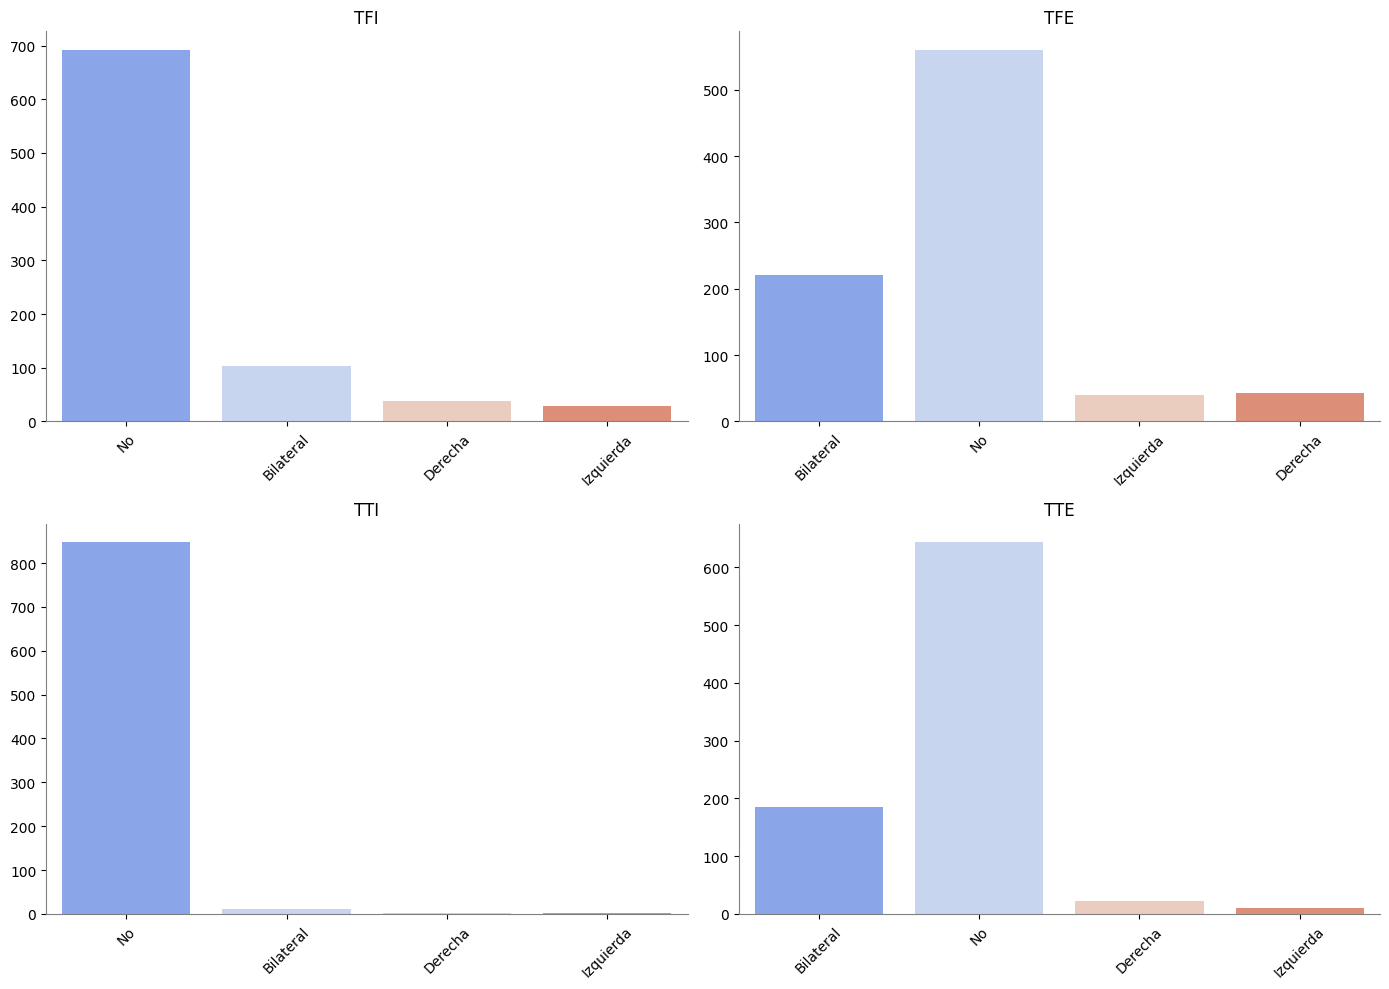

In [125]:
plot_categorical_columns(ib_resport2_df, ['TFI', 'TFE', 'TTI', 'TTE'], 2, ylabel='')

Queremos verificar si los casos positivos en una columna excluyen los casos positivos en otra. Nos basamos en que 'No' en `TF Normal` debería corresponder a un valor positivo en `TFI` o `TFE`:

In [126]:
# Análisis bivariado
check_exclusivity(df, 'TF Normal', 'TFI', 'TFE')

Resumen de exclusividad entre TF Normal, TFI y TFE:
False    897
Name: count, dtype: int64


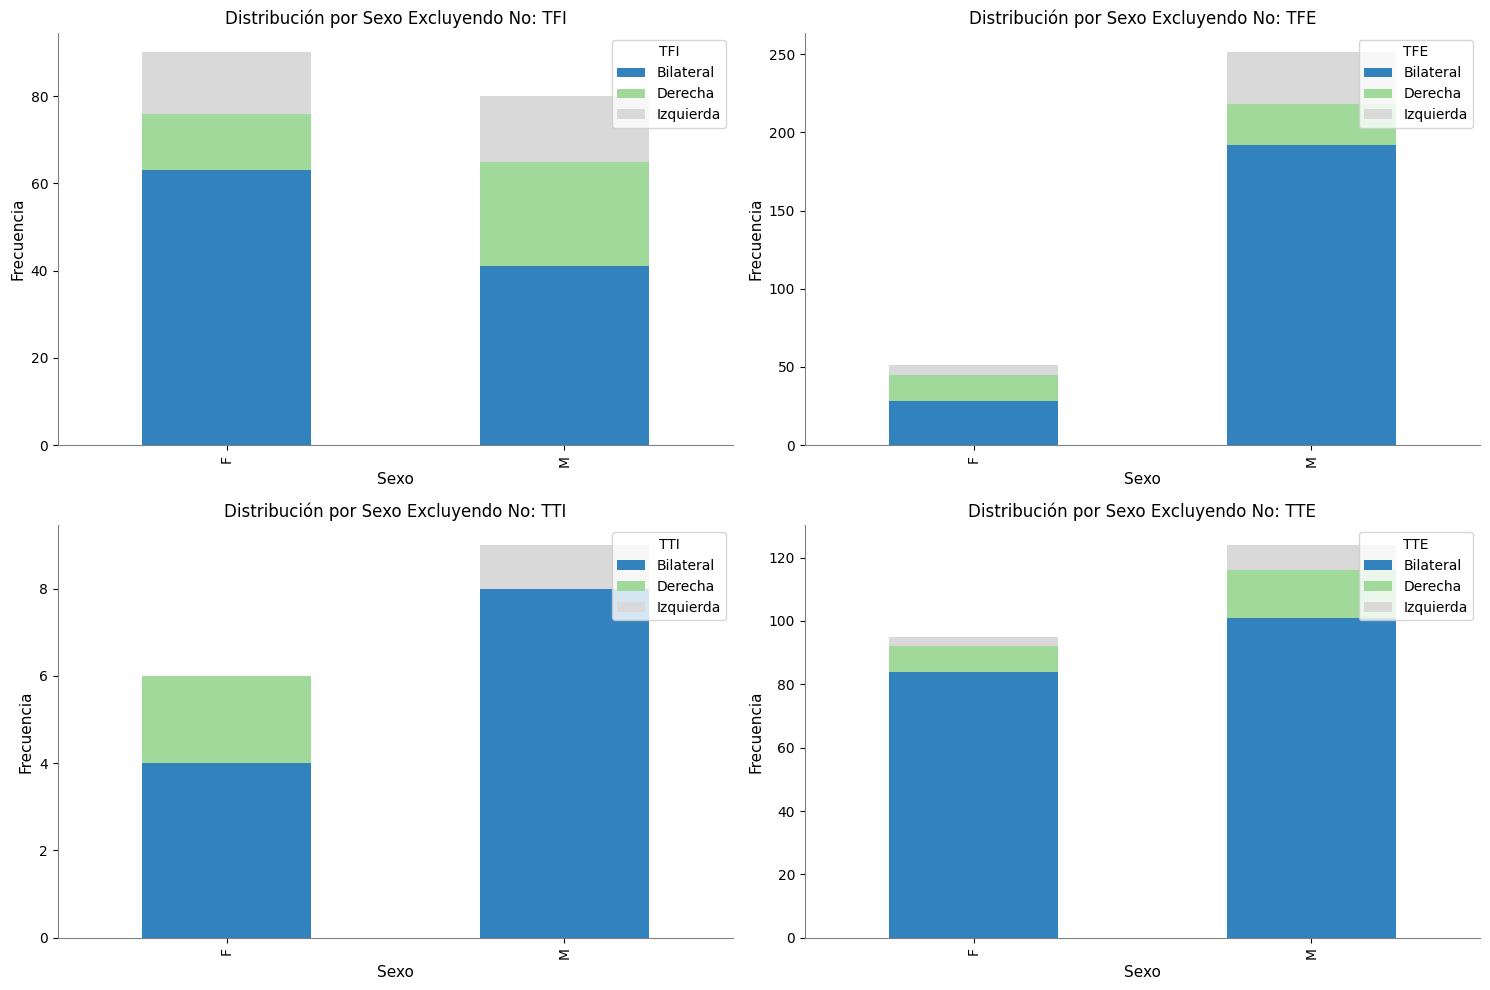

In [127]:
stacked_barplot_excluding_no(
    data=df, 
    columns=['TFI', 'TFE', 'TTI', 'TTE'], 
    hue='Sexo', 
    title='Distribución por Sexo Excluyendo No',
    nrows=2,
    ncols=2,
    figsize=(15, 10)
)

In [128]:
# Calcula el número total de hombres y mujeres en la muestra
total_hombres = df[df['Sexo'] == 'Hombre'].shape[0]
total_mujeres = df[df['Sexo'] == 'Mujer'].shape[0]

# Calcula la proporción de TFI para hombres y mujeres
proporcion_TFI_hombres = (df[(df['Sexo'] == 'Hombre') & (df['TFI'] != 'No')].shape[0] / total_hombres) if total_hombres != 0 else 0
proporcion_TFI_mujeres = (df[(df['Sexo'] == 'Mujer') & (df['TFI'] != 'No')].shape[0] / total_mujeres) if total_mujeres != 0 else 0

# Crea una tabla de contingencia para la prueba de chi-cuadrado
tabla_contingencia = pd.crosstab(df['Sexo'], df['TFI'])
tabla_contingencia = tabla_contingencia[['Izquierda', 'Derecha', 'Bilateral']]

# Realiza la prueba de chi-cuadrado
chi2, p, dof, ex = chi2_contingency(tabla_contingencia, correction=False)

# Verifica si las diferencias son significativas
print("Chi-cuadrado:", chi2)
print("p-valor:", p)

# Si p < 0.05, las diferencias son estadísticamente significativas

Chi-cuadrado: 7.395955429899396
p-valor: 0.02477357507752944


Las gráficas muestran la distribución por sexo de las categorías `TFI`, `TFE`, `TTI` y `TTE`, **excluyendo los casos donde la respuesta es 'No'**. Parece que hay una mayor frecuencia de hallazgos en el grupo masculino en comparación con el femenino para todas las categorías. Además, la categoría 'TTE' muestra una diferencia significativa entre los sexos, con una predominancia en hombres. Las otras categorías también presentan una inclinación hacia el grupo masculino, pero la diferencia es menos pronunciada. Esto podría indicar que, en esta muestra, las condiciones que se están evaluando son más prevalentes o están más frecuentemente documentadas en hombres.

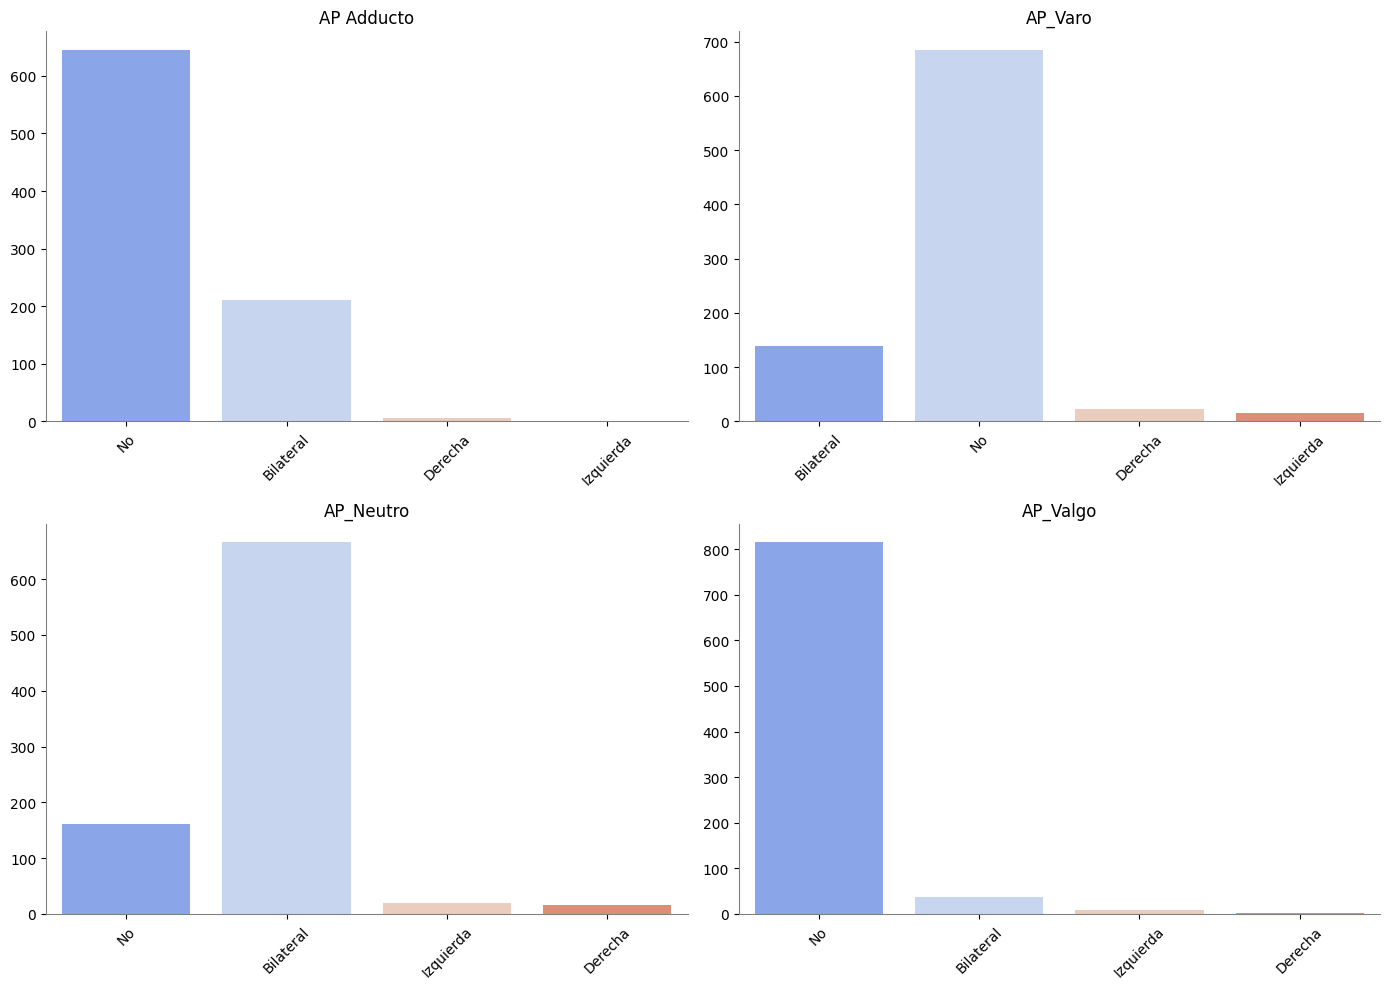

In [129]:
plot_categorical_columns(ib_resport2_df, ['AP Adducto', 'AP_Varo', 'AP_Neutro', 'AP_Valgo'], 2, ylabel='')

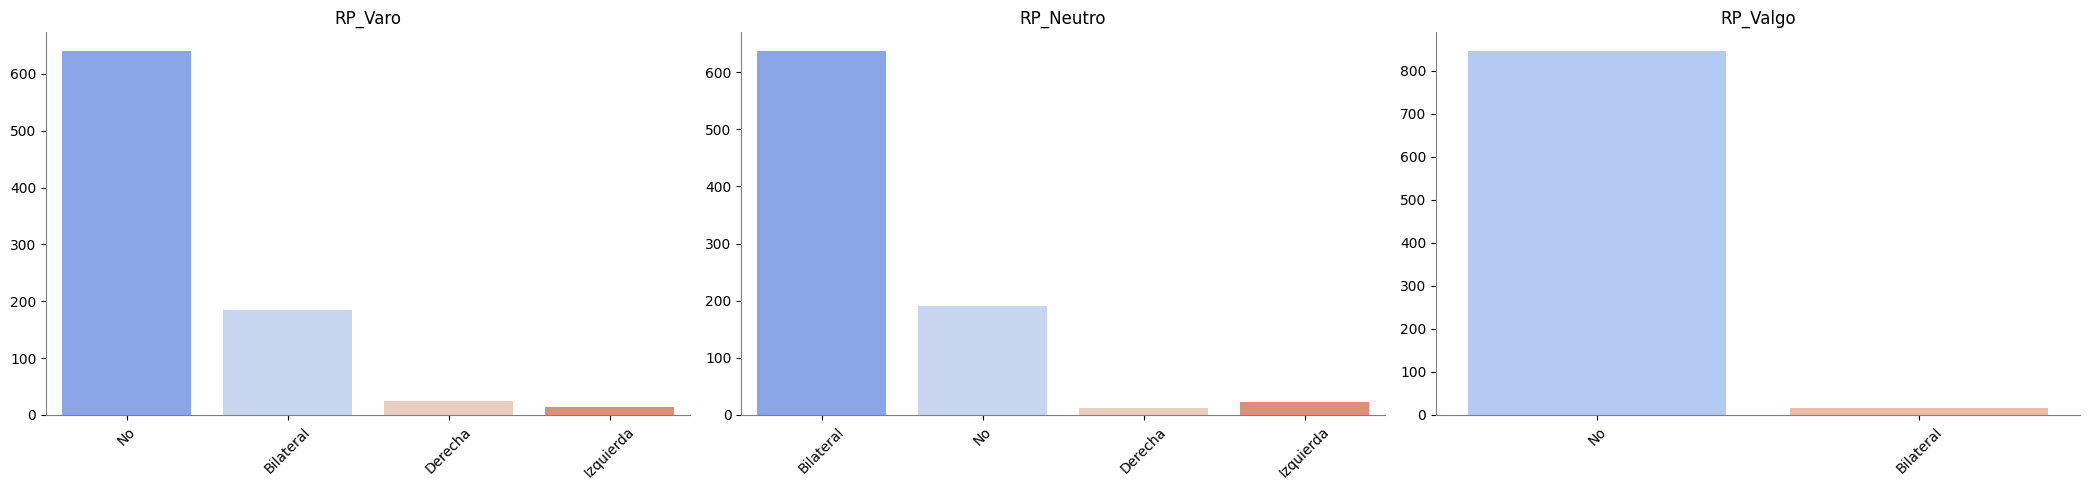

In [130]:
plot_categorical_columns(ib_resport2_df, ['RP_Varo', 'RP_Neutro', 'RP_Valgo'], 3, ylabel='')

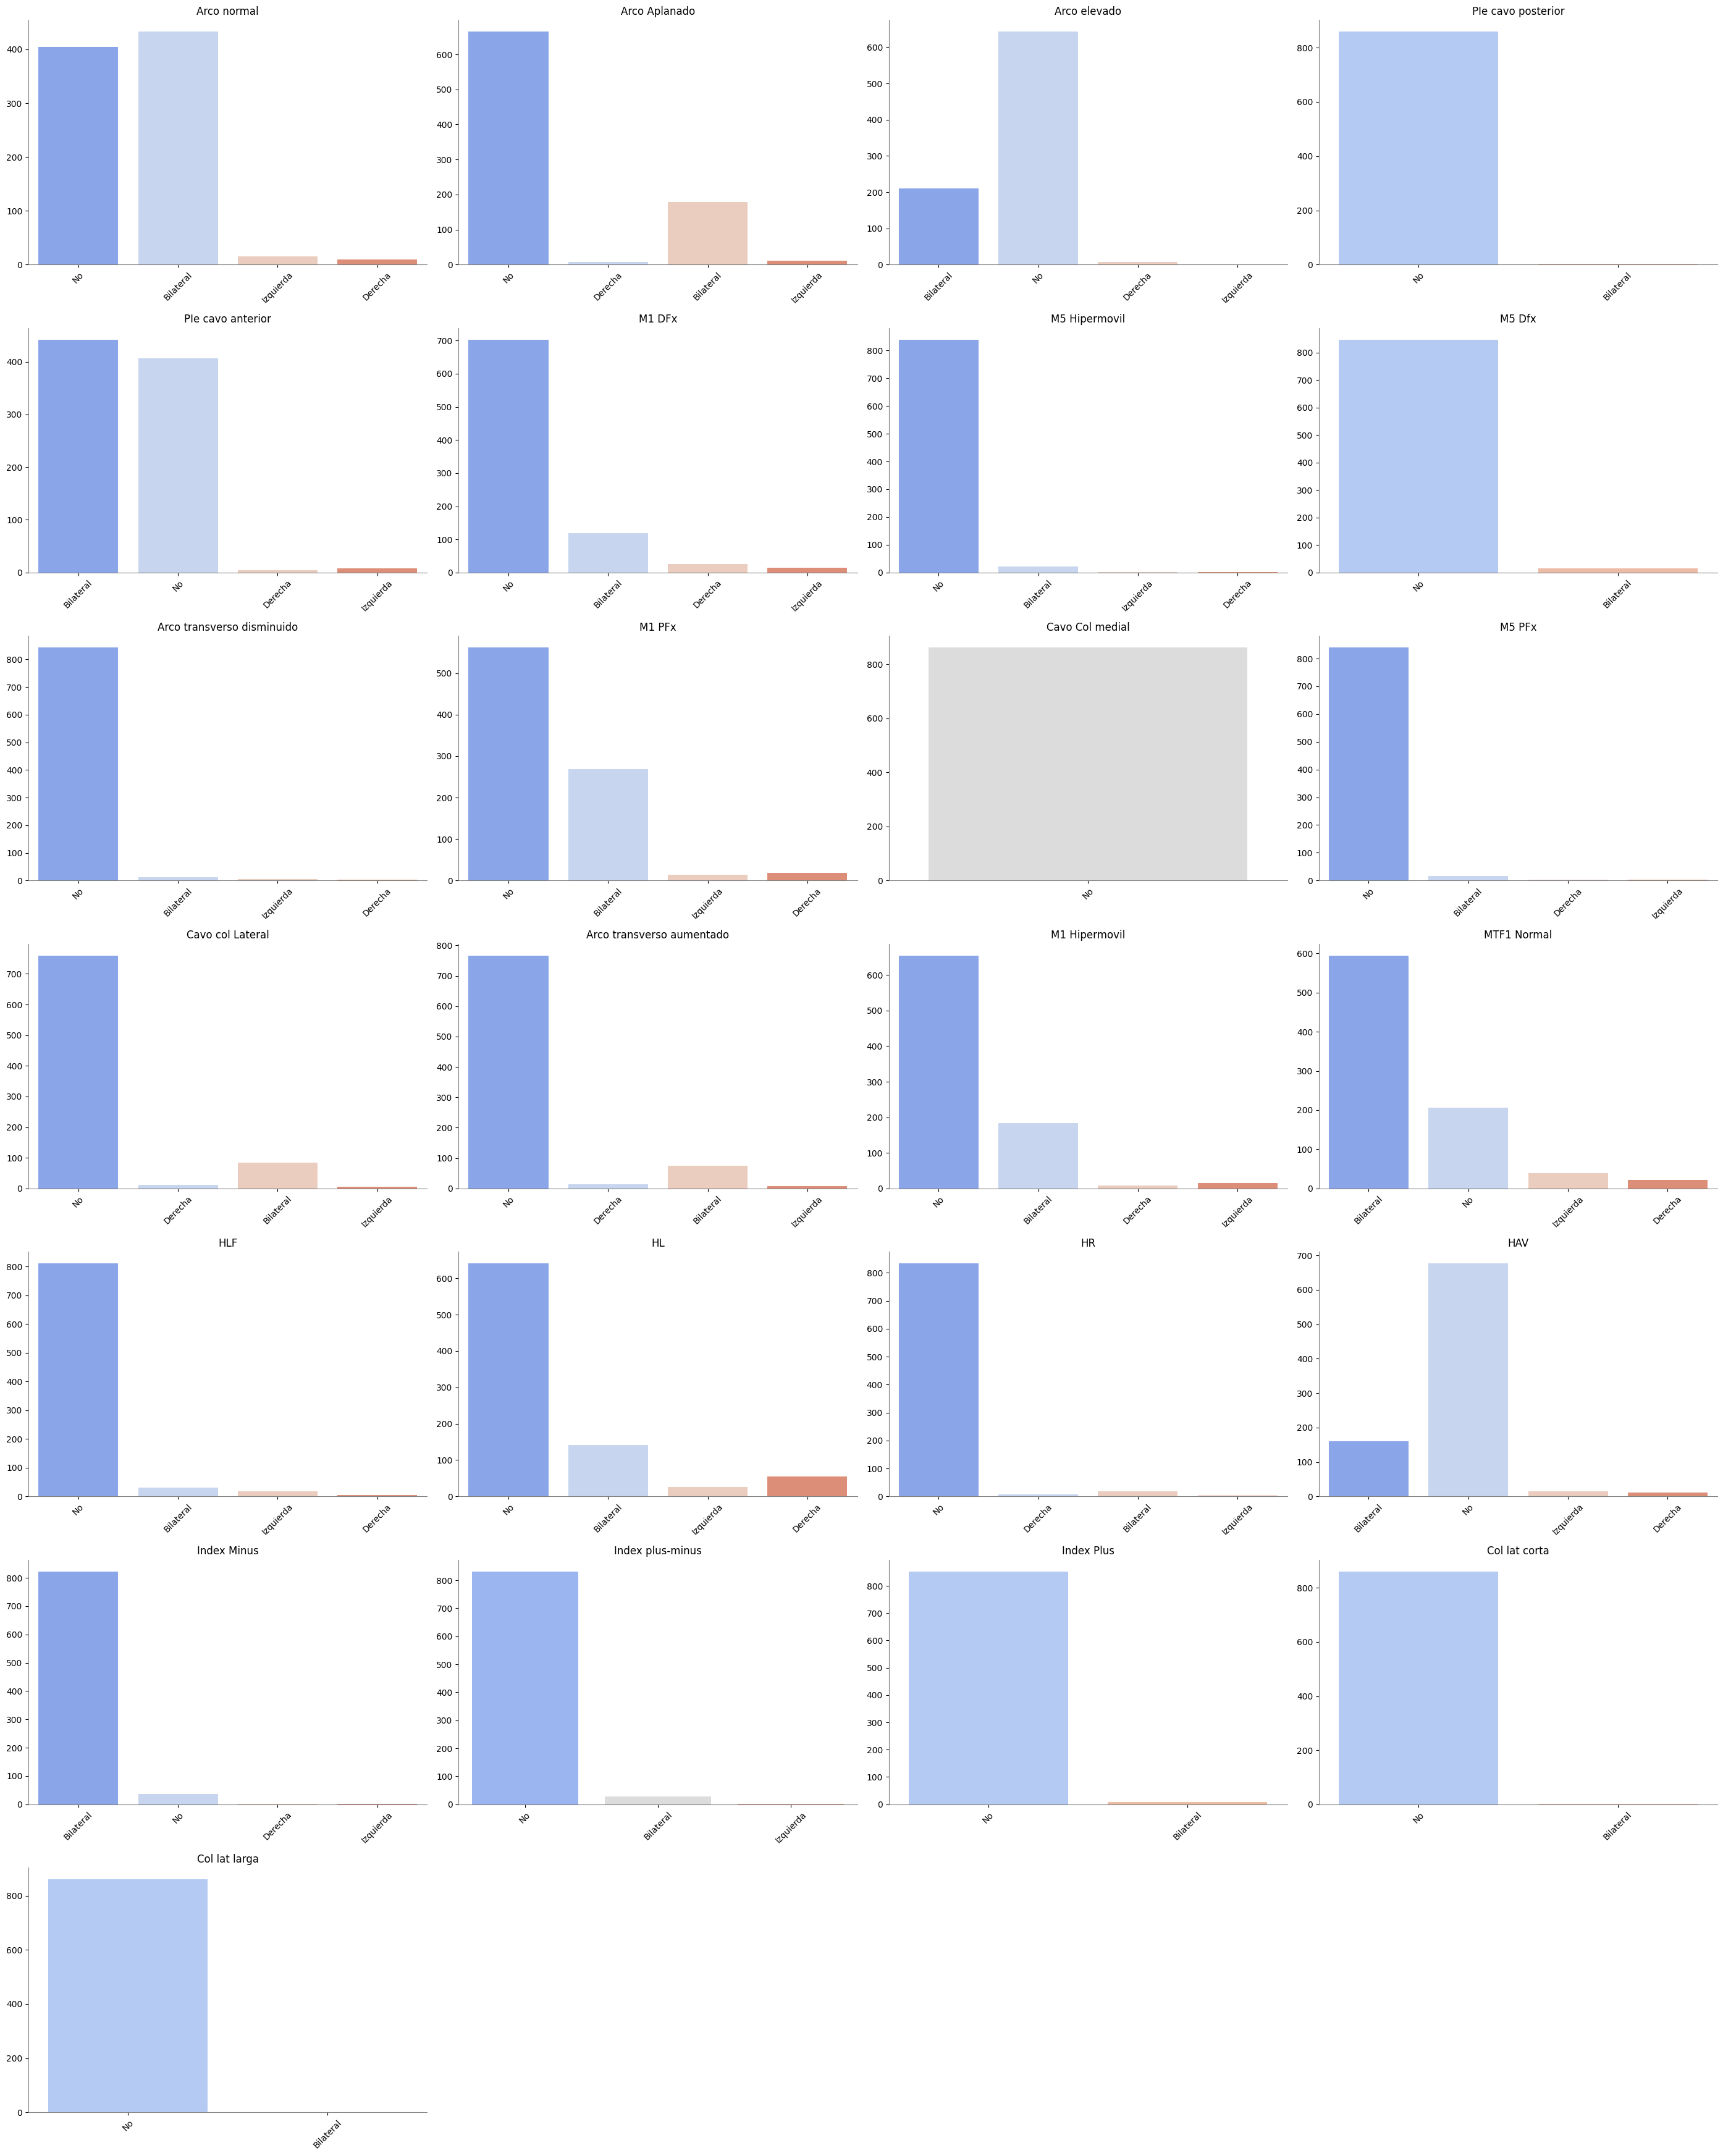

In [131]:
column_names = ['Arco normal', 'Arco Aplanado', 'Arco elevado', 'PIe cavo posterior', 'PIe cavo anterior', 'M1 DFx', 'M5 Hipermovil', 'M5 Dfx', 'Arco transverso disminuido', 'M1 PFx', 'Cavo Col medial', 'M5 PFx', 'Cavo col Lateral', 'Arco transverso aumentado', 'M1 Hipermovil', 'MTF1 Normal', 'HLF', 'HL', 'HR', 'HAV', 'Index Minus', 'Index plus-minus', 'Index Plus', 'Col lat corta', 'Col lat larga']
plot_categorical_columns(ib_resport2_df, column_names, 4, ylabel='')

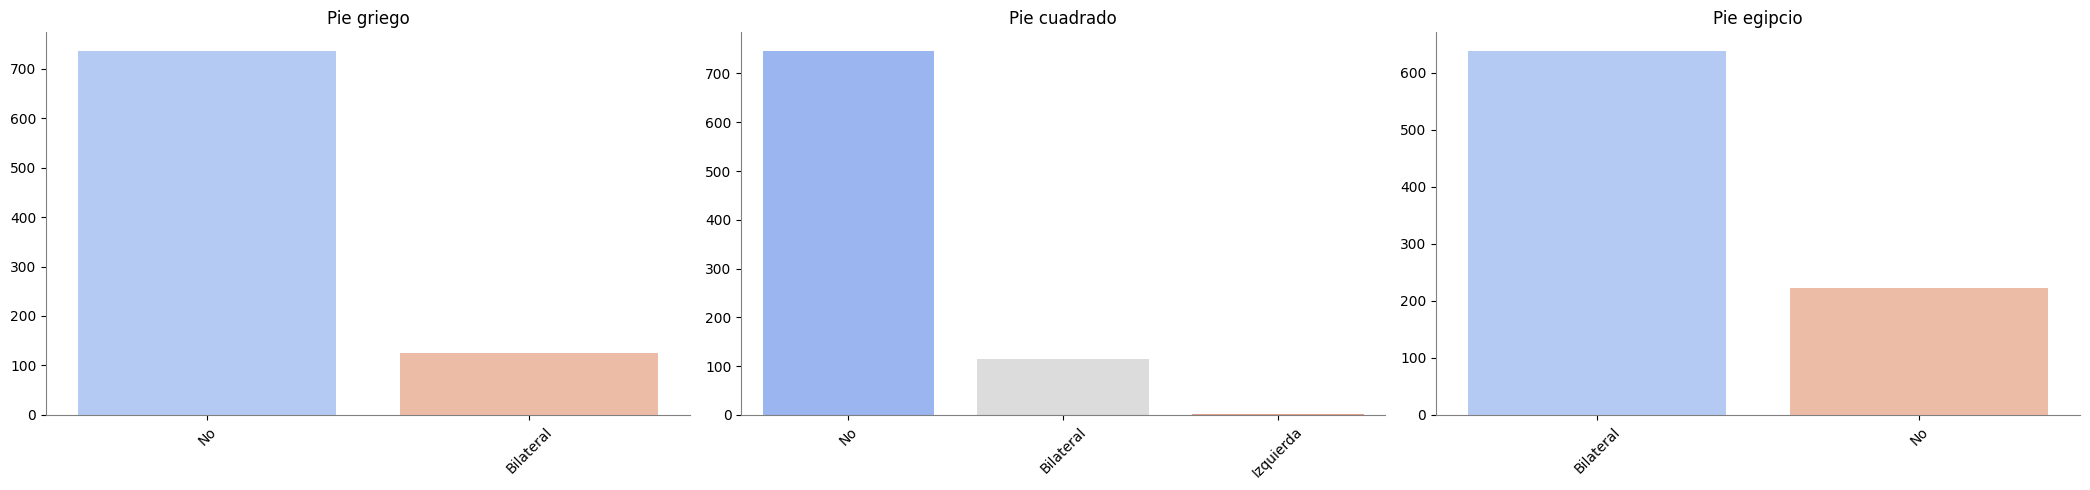

In [132]:
plot_categorical_columns(ib_resport2_df, ['Pie griego', 'Pie cuadrado', 'Pie egipcio'], 3, ylabel='')

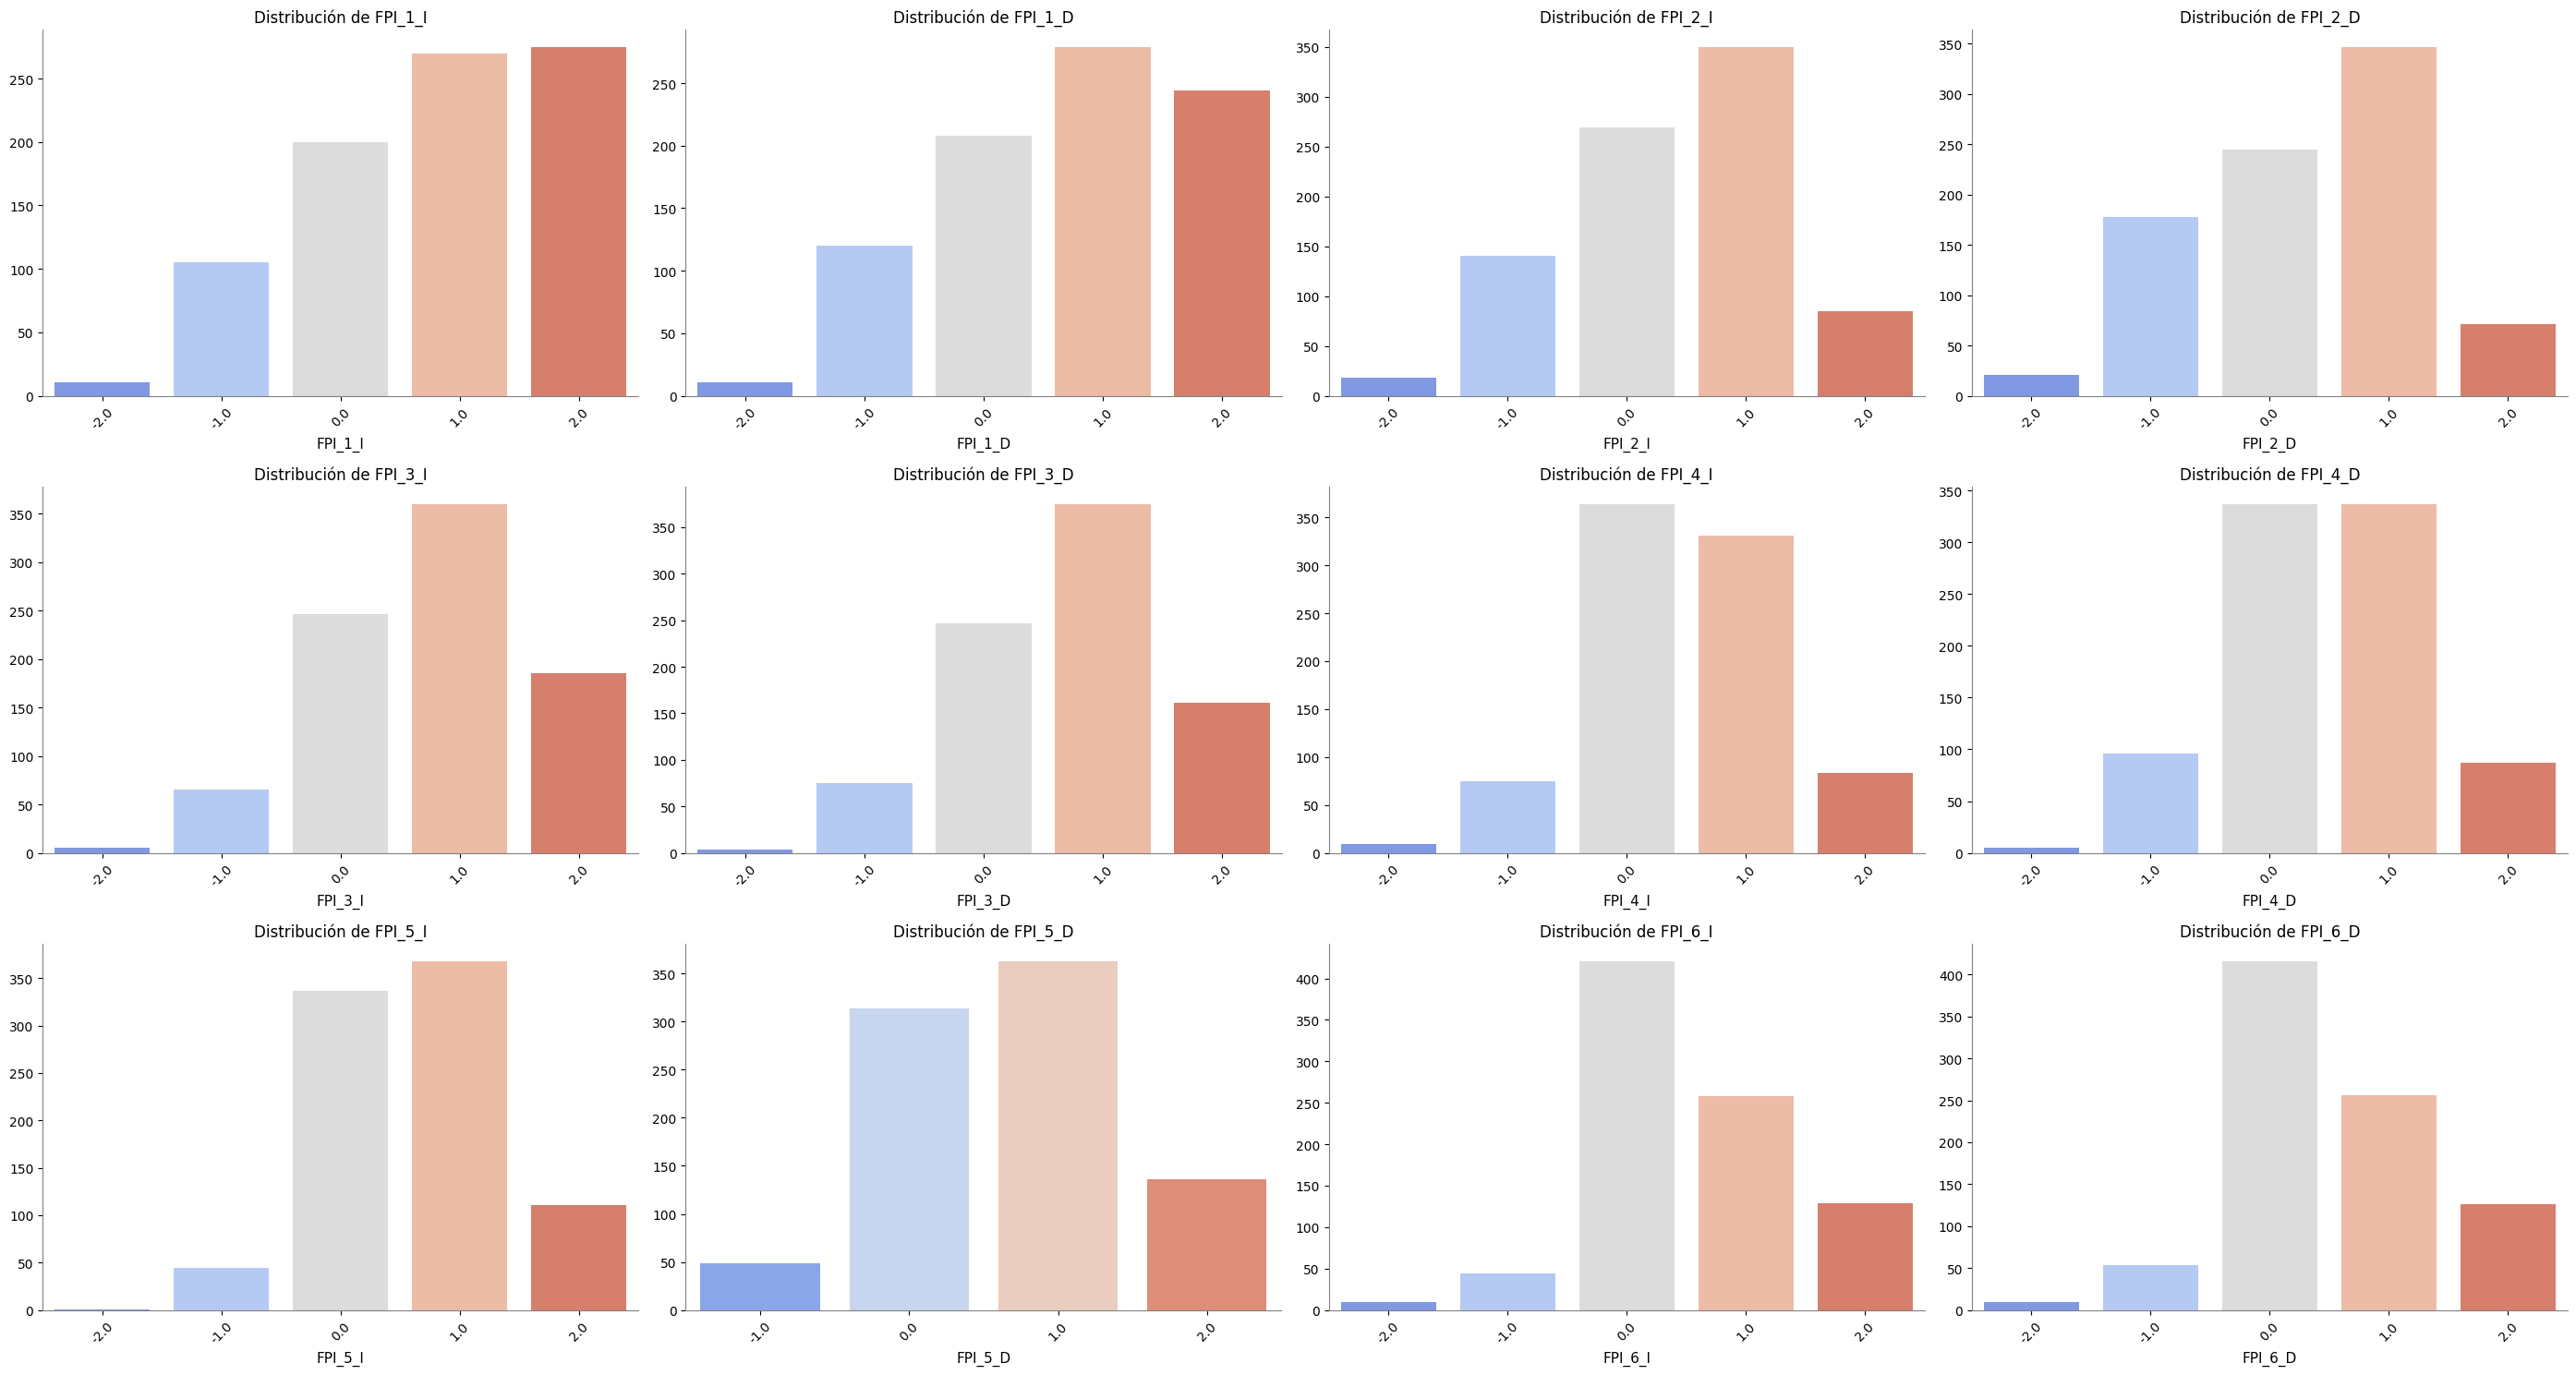

In [133]:
column_names = ['FPI_1_I', 'FPI_1_D', 'FPI_2_I', 'FPI_2_D', 'FPI_3_I', 'FPI_3_D', 'FPI_4_I', 'FPI_4_D', 'FPI_5_I', 'FPI_5_D', 'FPI_6_I', 'FPI_6_D']
plot_numerical_columns(ib_resport2_df, column_names, 4, ylabel='')

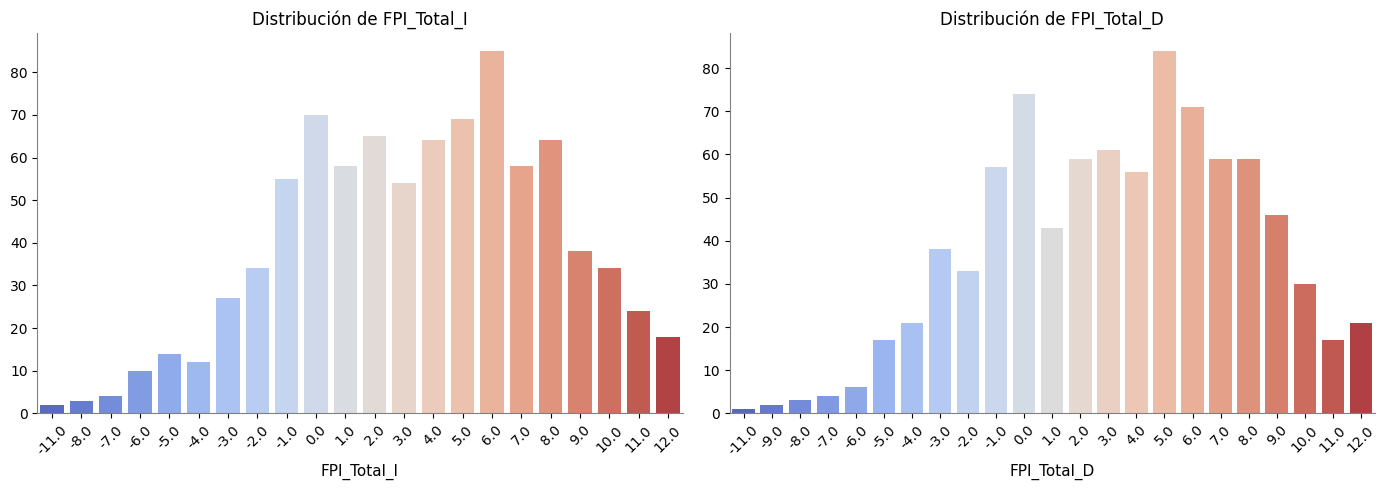

In [134]:
column_names = ['FPI_Total_I', 'FPI_Total_D']        
plot_numerical_columns(ib_resport2_df, column_names, 2, ylabel='')

In [135]:
df[['FPI_1_I', 'FPI_1_D', 'FPI_2_I', 'FPI_2_D',
    'FPI_3_I', 'FPI_3_D', 'FPI_4_I', 'FPI_4_D',
    'FPI_5_I', 'FPI_5_D', 'FPI_6_I', 'FPI_6_D',
    'FPI_Total_I', 'FPI_Total_D']].describe()

0       FPI_1_I  FPI_1_D  FPI_2_I  FPI_2_D  FPI_3_I  FPI_3_D  FPI_4_I  \
count       861      862      862      862      861      862      862   
unique        5        5        5        5        5        5        5   
top           2        1        1        1        1        1        0   
freq        275      279      350      347      360      375      364   

0       FPI_4_D  FPI_5_I  FPI_5_D  FPI_6_I  FPI_6_D  FPI_Total_I  FPI_Total_D  
count       862      861      862      862      861          862          862  
unique        5        5        4        5        5           22           23  
top           1        1        1        0        0            6            5  
freq        337      368      363      421      416           85           84

Análisis basado en las frecuencias de cada ítem del FPI:

- `FPI_1` (Talus): Los valores oscilan entre -2 y 2, donde los números negativos indican una posición supinada y los números positivos una pronada. La mayoría de las frecuencias caen en el rango de 0 a 2, lo que sugiere una tendencia hacia una postura neutral o ligeramente pronada en ambos pies, con una proporción menor de supinación.
- `FPI_2` (Curvatura lateral del arco): Similar a FPI_1, hay una tendencia a la postura neutral o pronada, con valores que oscilan principalmente entre 0 y 1. Esto indica una curvatura lateral del arco desde normal hasta pronada, con menos individuos mostrando supinación.
- `FPI_3` (Calcáneo): La mayoría de las personas tienden a tener una posición del calcáneo neutra o pronada, con una presencia significativa de postura pronada.
- `FPI_4` (Prominencia del talón): La mayoría de las personas tienen una prominencia del talón neutra, seguida de una postura pronada.
- `FPI_5` (Altura del arco y región del tarso): La altura del arco y la región del tarso también tienden a mostrar una postura más neutral o pronada.
- `FPI_6` (Alineación del antepié): La alineación del antepié generalmente es neutra, con menos casos de pronación y supinación.
- `FPI_Total`: Al sumar los componentes del FPI para el pie izquierdo y derecho, la mayoría de los individuos tienen un puntaje total que sugiere una **postura del pie desde neutral hasta moderadamente pronada**. Muy pocos individuos presentan posturas extremadamente pronadas o supinadas.

Estas observaciones sugieren que, en esta muestra, **la postura del pie tiende hacia la neutralidad con una ligera inclinación hacia la pronación en ambos pies**. Sería interesante correlacionar estos hallazgos con otras variables como la incidencia de lesiones, tipo de actividad física o deportiva, y la necesidad de soporte o corrección ortopédica.

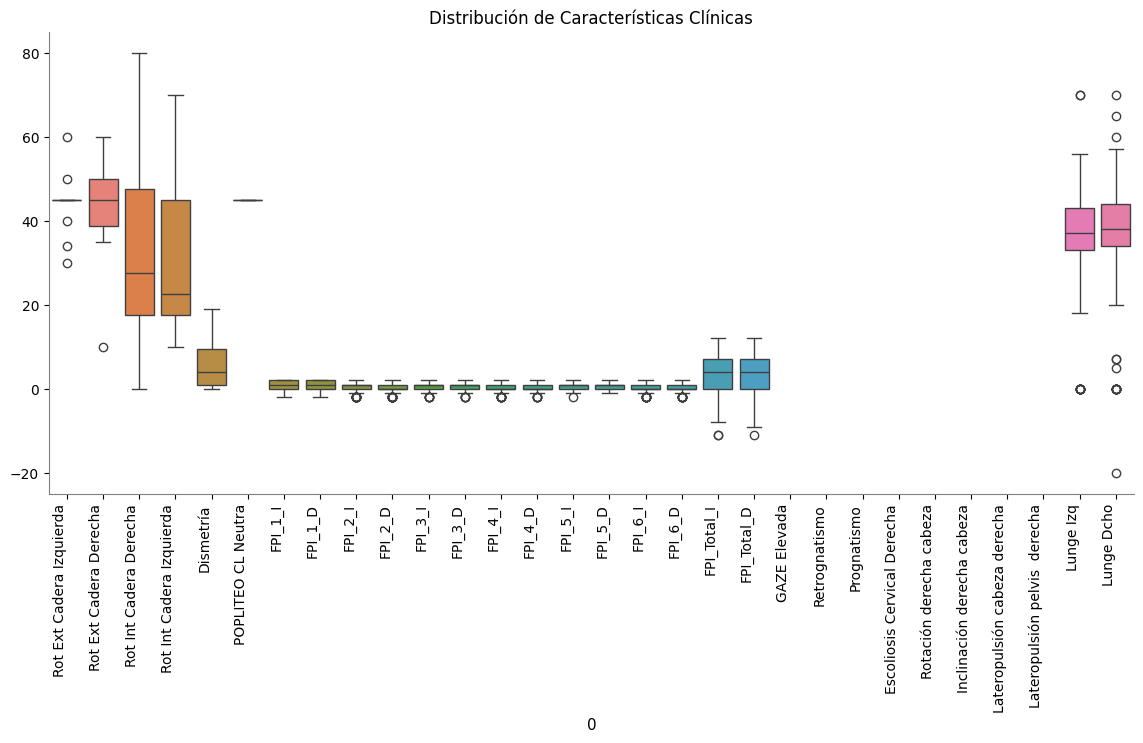

In [136]:
plot_boxplot(ib_resport2_df, title="Distribución de Características Clínicas")

### Matriz de correlación

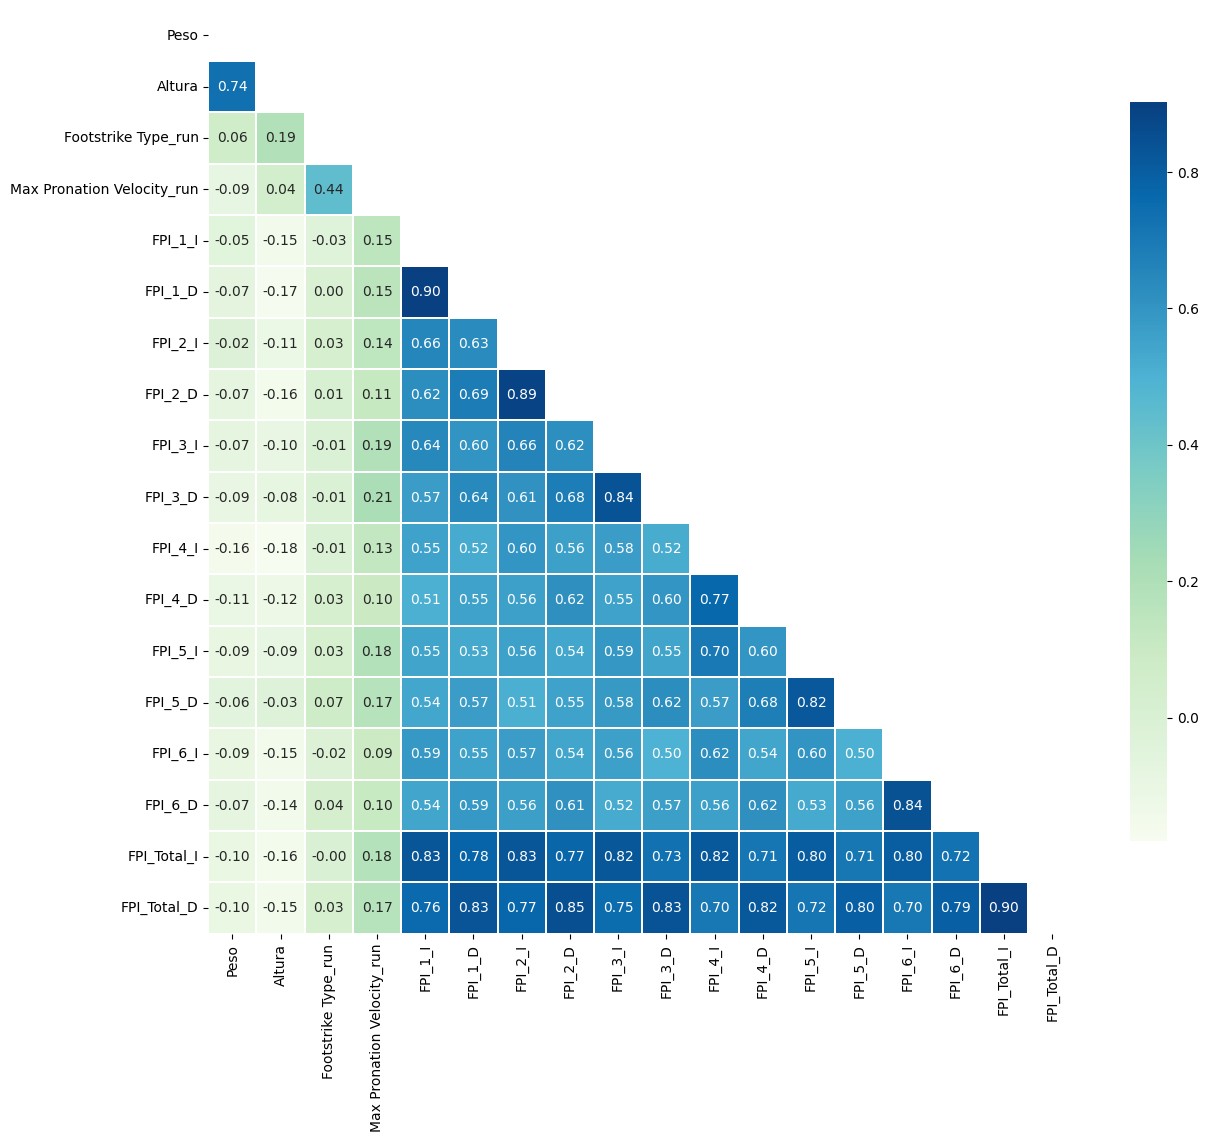

In [137]:
corr_matrix = df[['Peso', 'Altura', 'Footstrike Type_run', 'Max Pronation Velocity_run', 'FPI_1_I', 'FPI_1_D', 'FPI_2_I', 'FPI_2_D', 'FPI_3_I', 'FPI_3_D', 'FPI_4_I', 'FPI_4_D', 'FPI_5_I', 'FPI_5_D', 'FPI_6_I', 'FPI_6_D', 'FPI_Total_I', 'FPI_Total_D']].corr()
plot_heatmap(corr_matrix=corr_matrix, figsize=(14, 12), cmap='GnBu', title='', annot=True)

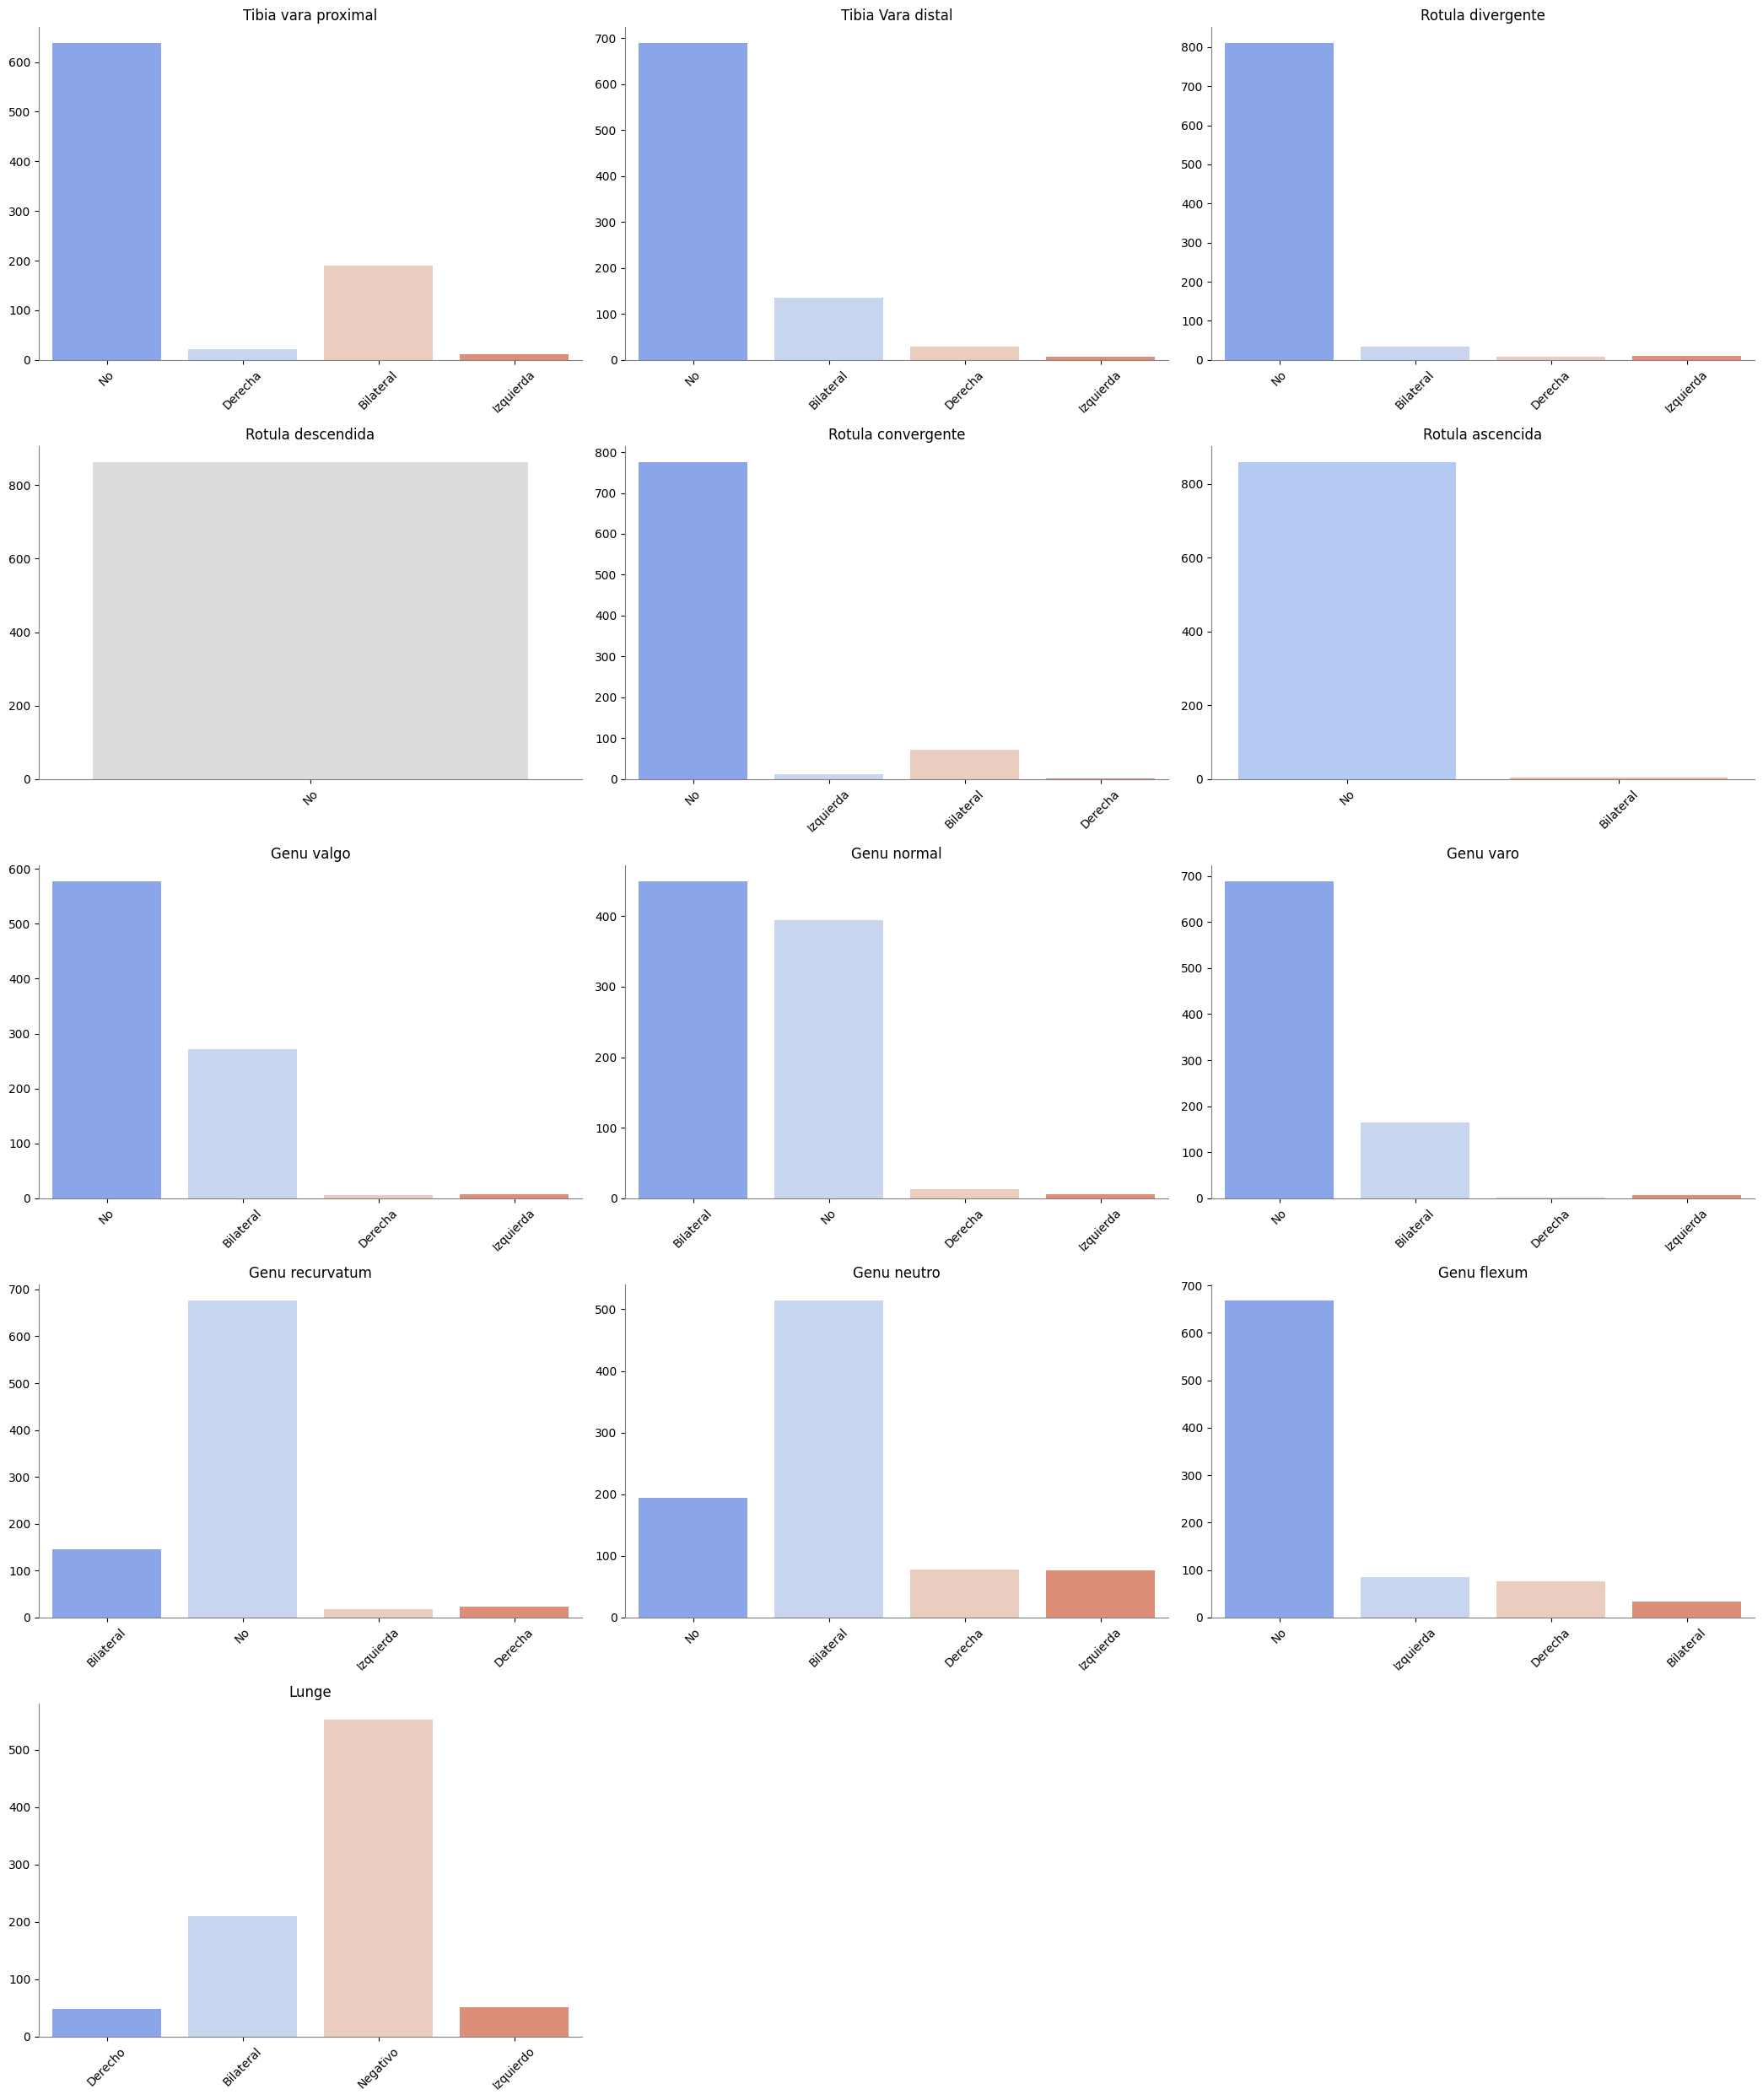

In [138]:
column_names = ['Tibia vara proximal', 'Tibia Vara distal', 'Rotula divergente', 'Rotula descendida', 'Rotula convergente', 'Rotula ascencida', 'Genu valgo', 'Genu normal', 'Genu varo', 'Genu recurvatum', 'Genu neutro', 'Genu flexum', 'Lunge']
plot_categorical_columns(ib_resport2_df, column_names, 3, ylabel='')

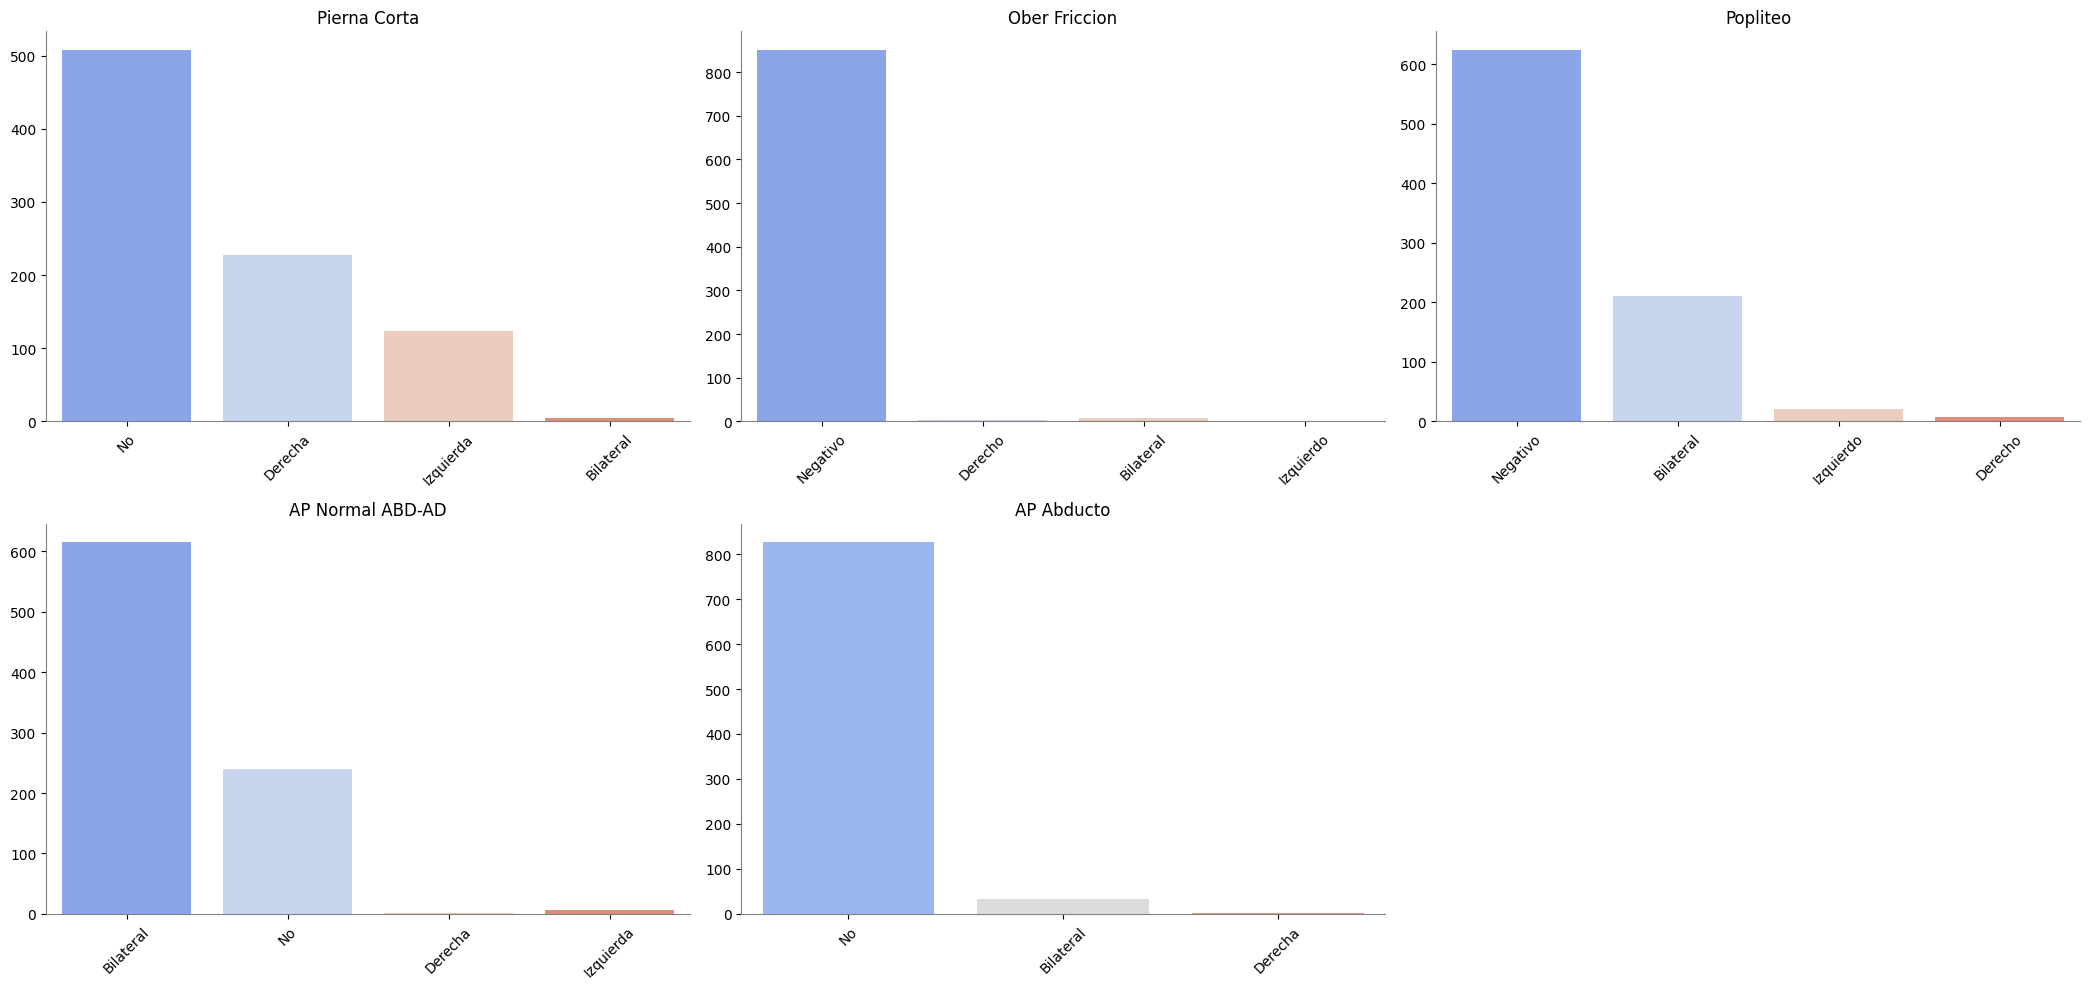

In [139]:
column_names = ['Pierna Corta', 'Ober Friccion', 'Popliteo', 'AP Normal ABD-AD', 'AP Abducto']
plot_categorical_columns(ib_resport2_df, column_names, 3, ylabel='')

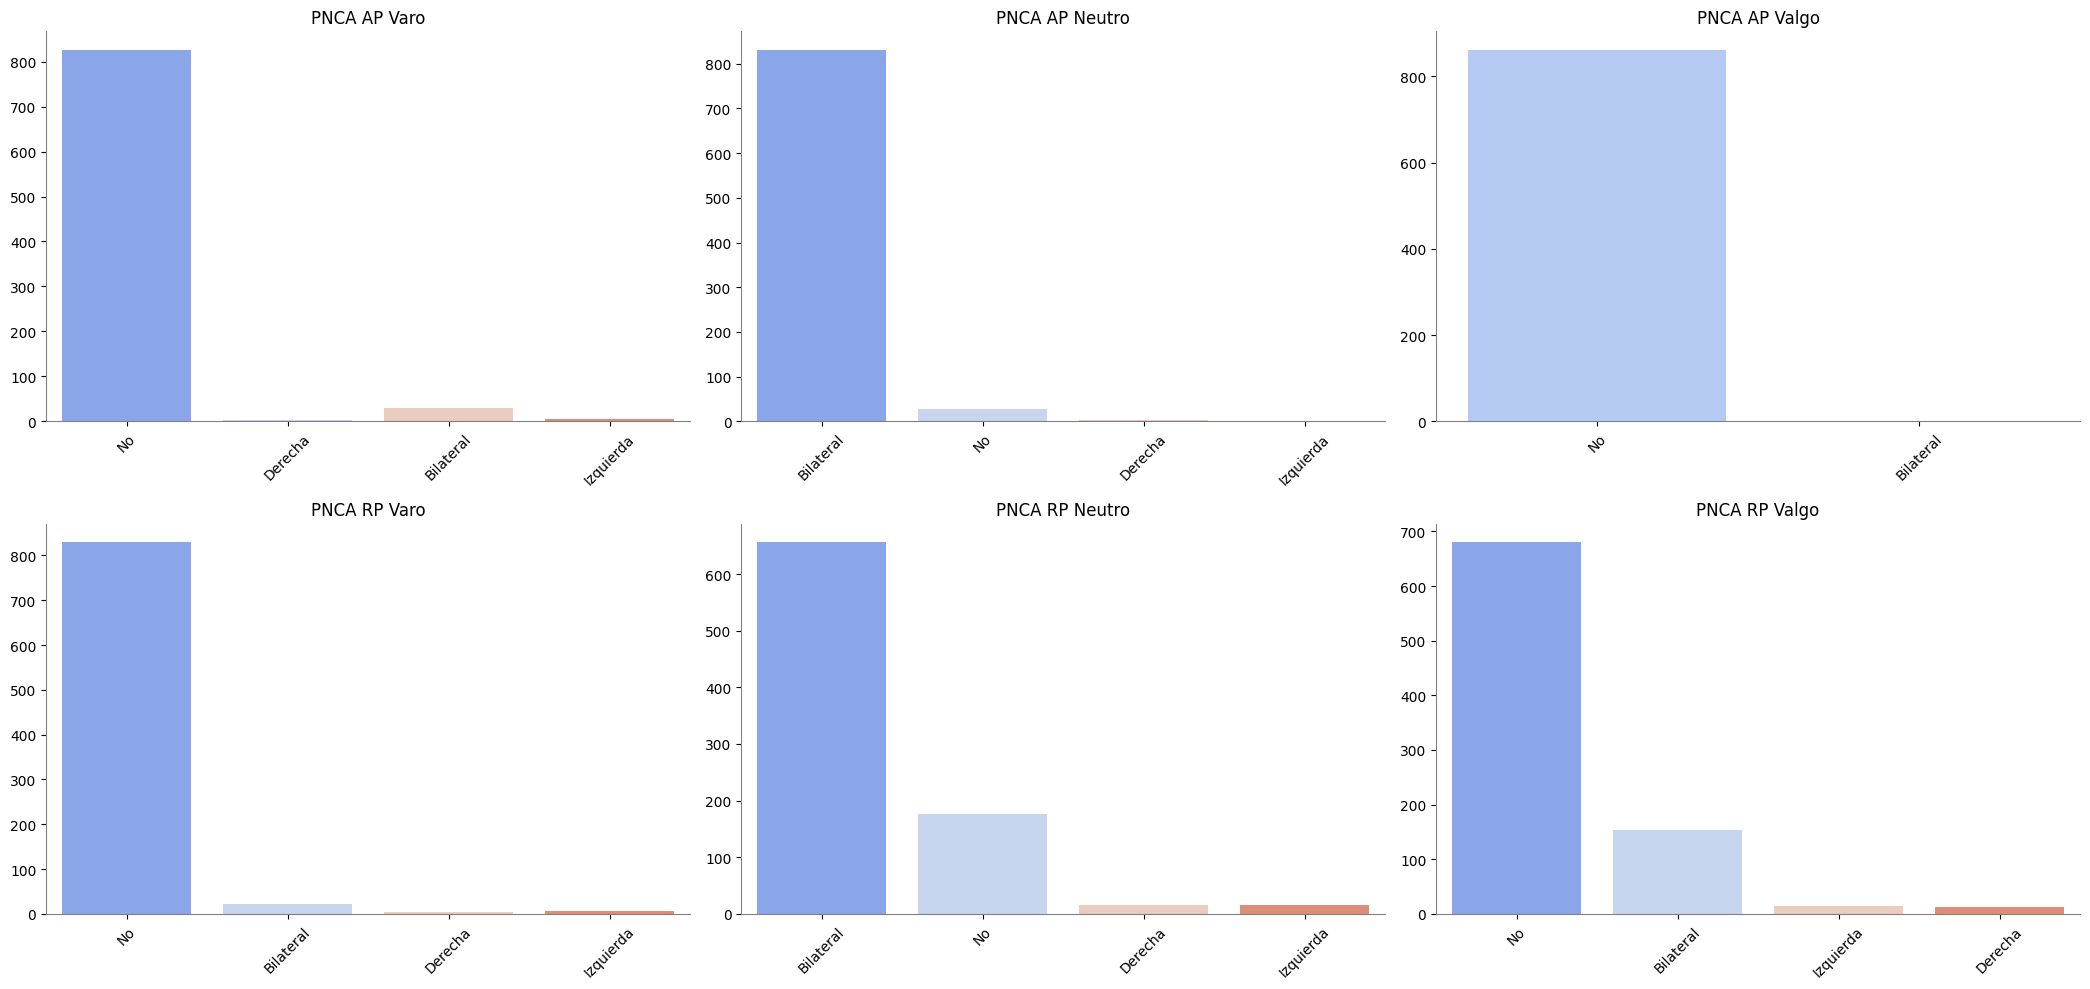

In [140]:
column_names = ['PNCA AP Varo', 'PNCA AP Neutro', 'PNCA AP Valgo', 'PNCA RP Varo', 'PNCA RP Neutro', 'PNCA RP Valgo']
plot_categorical_columns(ib_resport2_df, column_names, 3, ylabel='')

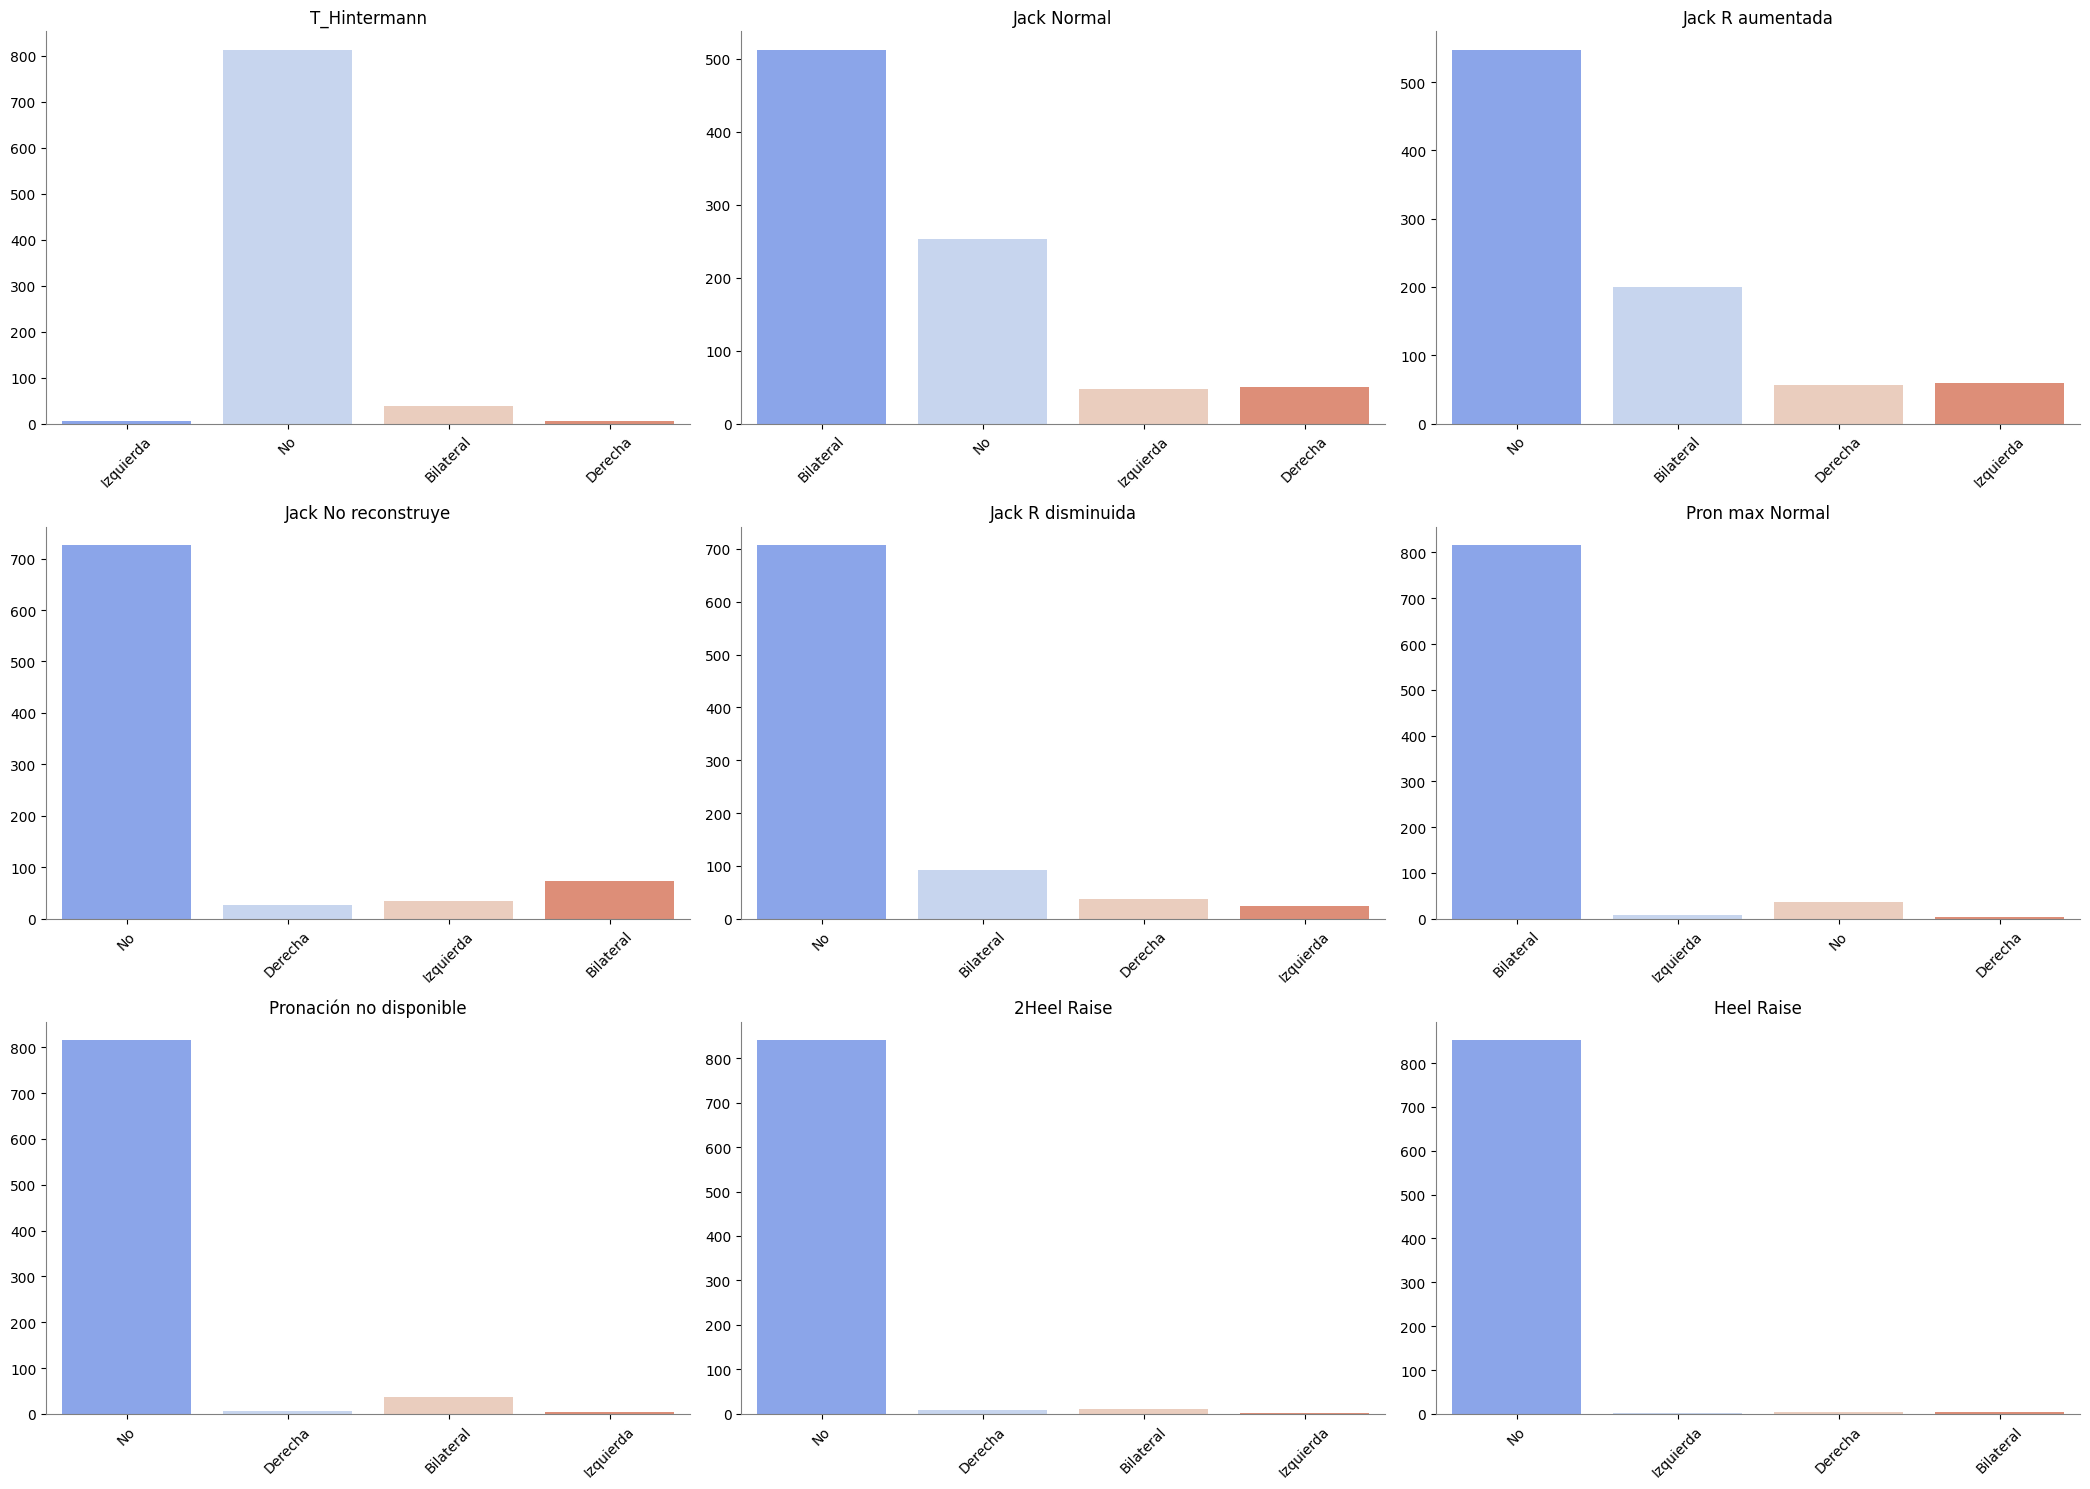

In [141]:
column_names = ['T_Hintermann', 'Jack Normal', 'Jack R aumentada', 'Jack No reconstruye', 'Jack R disminuida', 'Pron max Normal', 'Pronación no disponible', '2Heel Raise', 'Heel Raise']
plot_categorical_columns(ib_resport2_df, column_names, 3, ylabel='')